In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

df = pd.read_csv('polls.csv')

# Trump & Biden only
candidates = df.loc[:,'candidate_name'].unique()[0:2]
df = df[df['candidate_name'].isin(candidates)]

In [2]:
date_cols = ['start_date', 'end_date', 'election_date','created_at',]
df.loc[:,date_cols] = df.loc[:,date_cols].apply(pd.to_datetime)

In [3]:
df['diff'] = df.groupby('question_id')['pct'].diff(-1)

In [4]:
# separate out national polls
national_polls = df[df['state'].isnull()]
national_pollsters = national_polls['pollster'].unique()

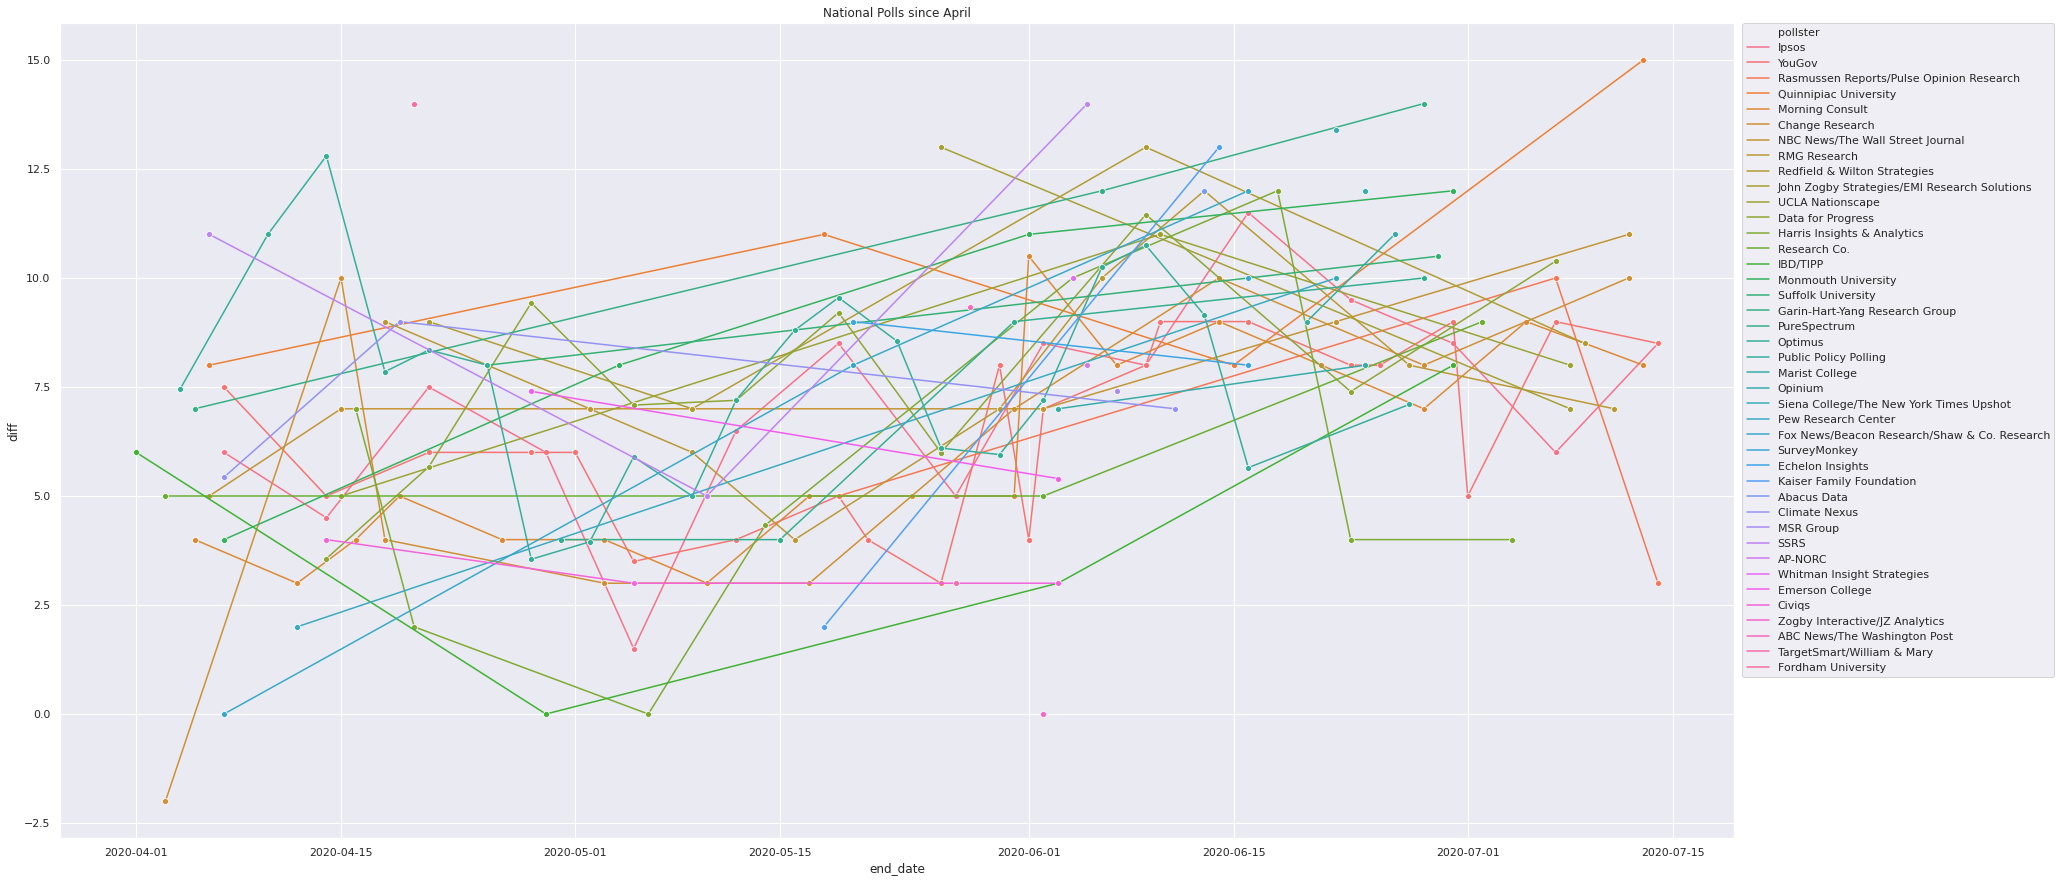

In [5]:
# All national polls since april
plt.figure(figsize=(30,15))
sns.set()
plot = sns.lineplot(x='end_date', y='diff', hue='pollster', ci=None, marker='o', data=national_polls[national_polls['end_date'] >= '4/1/2020']).set_title("National Polls since April")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
fig = plot.get_figure()
fig.savefig('src/images/national/since_april.png')

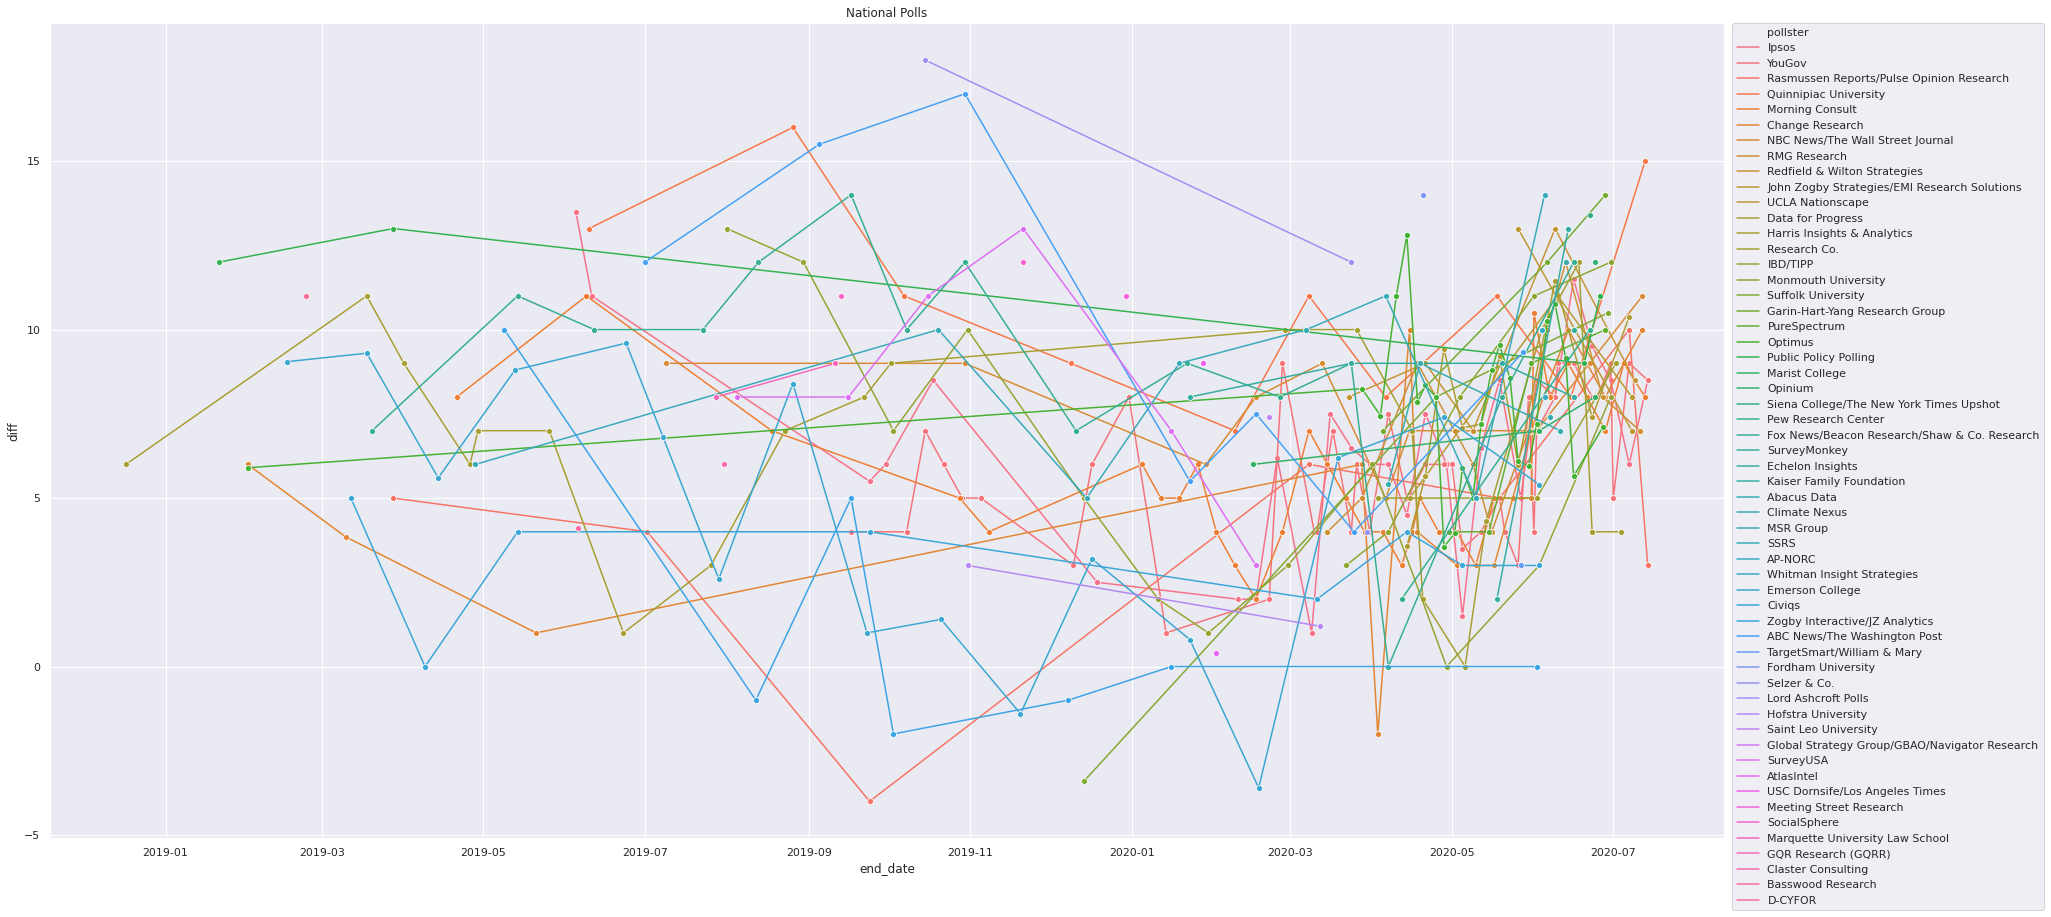

In [6]:
# All national polls
plt.figure(figsize=(30,15))
sns.set()
plot = sns.lineplot(x='end_date', y='diff', hue='pollster', ci=None, marker='o', data=national_polls).set_title("National Polls")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
fig = plot.get_figure()
fig.savefig('src/images/national/all.png')

In [7]:
pollsters = national_polls.pollster.unique()

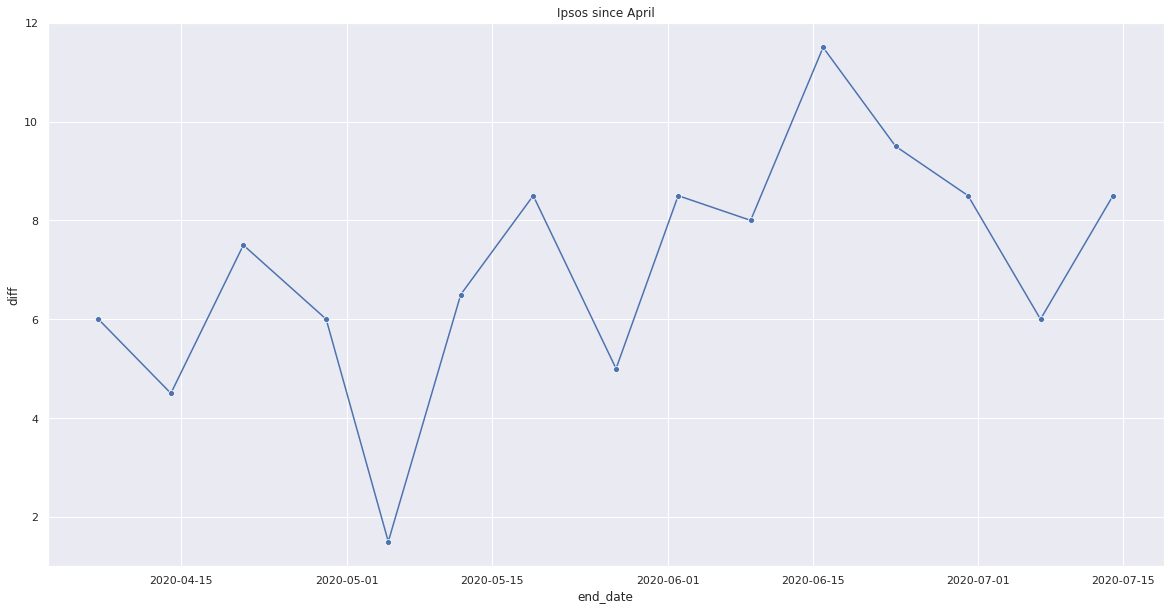

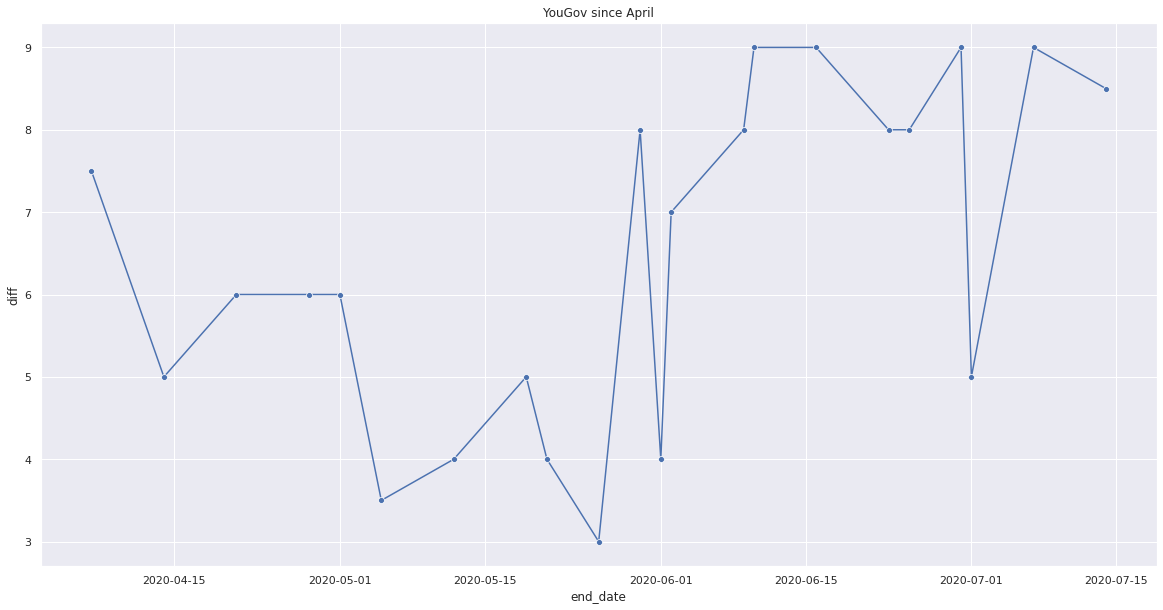

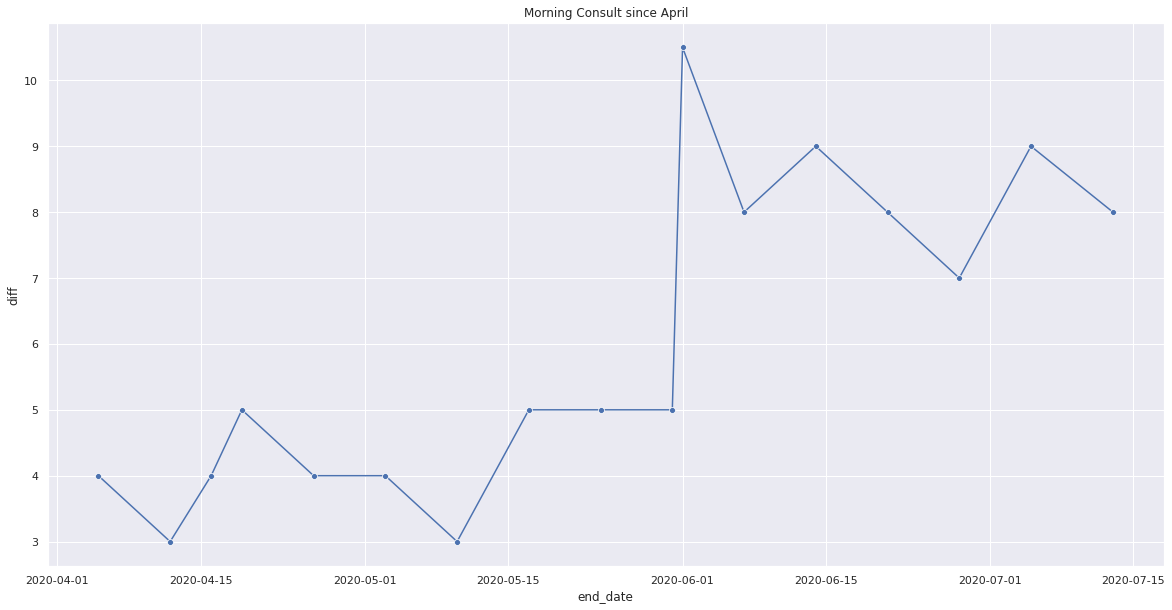

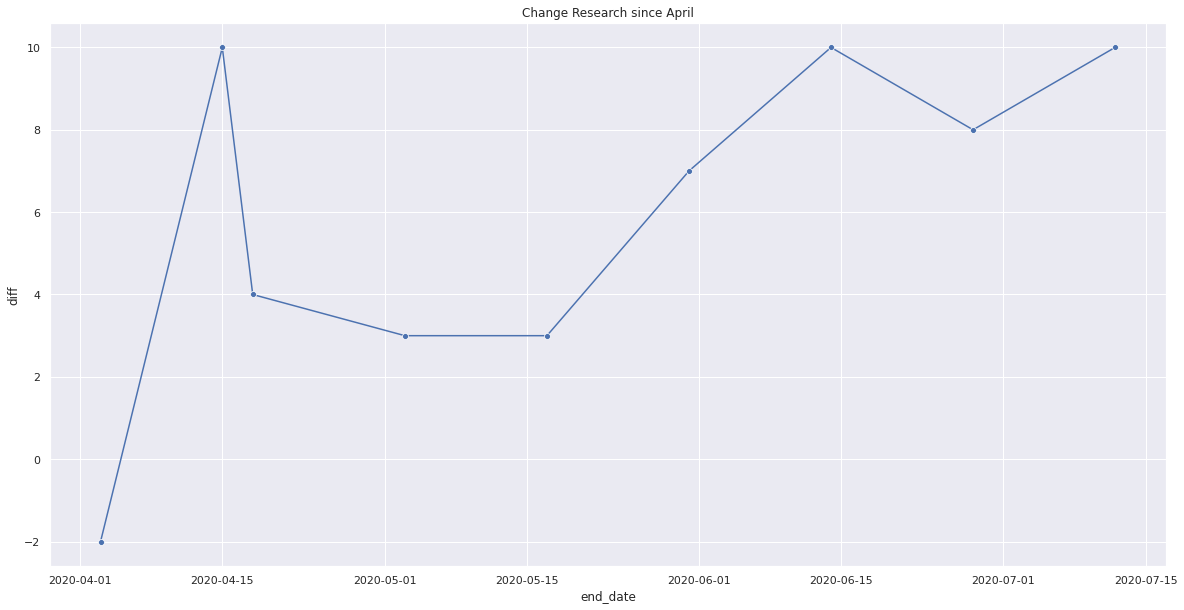

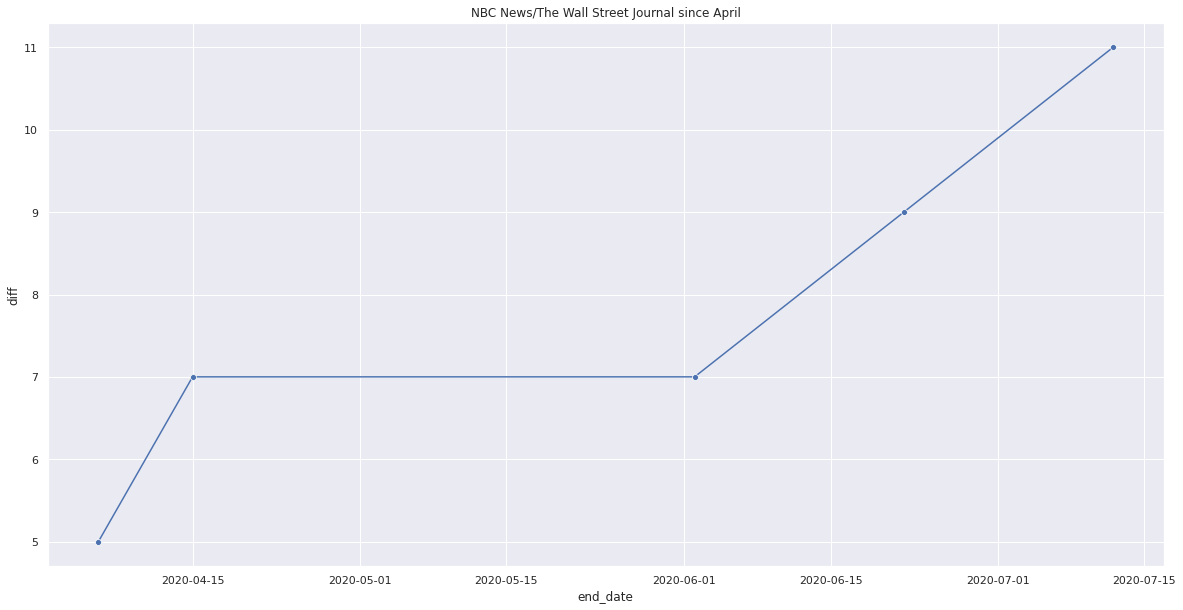

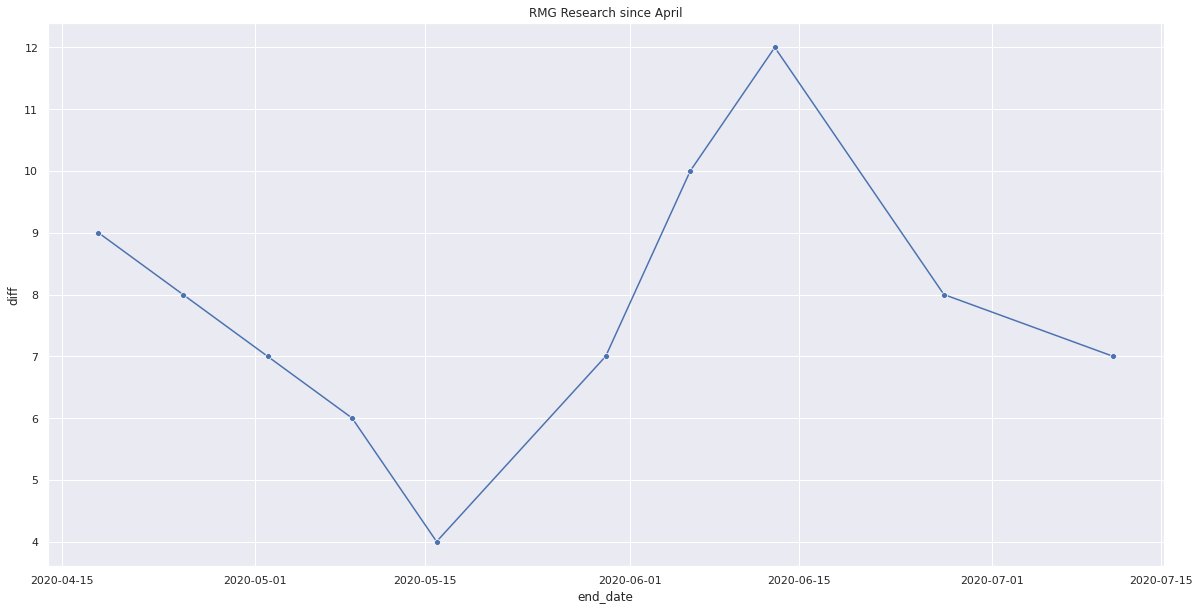

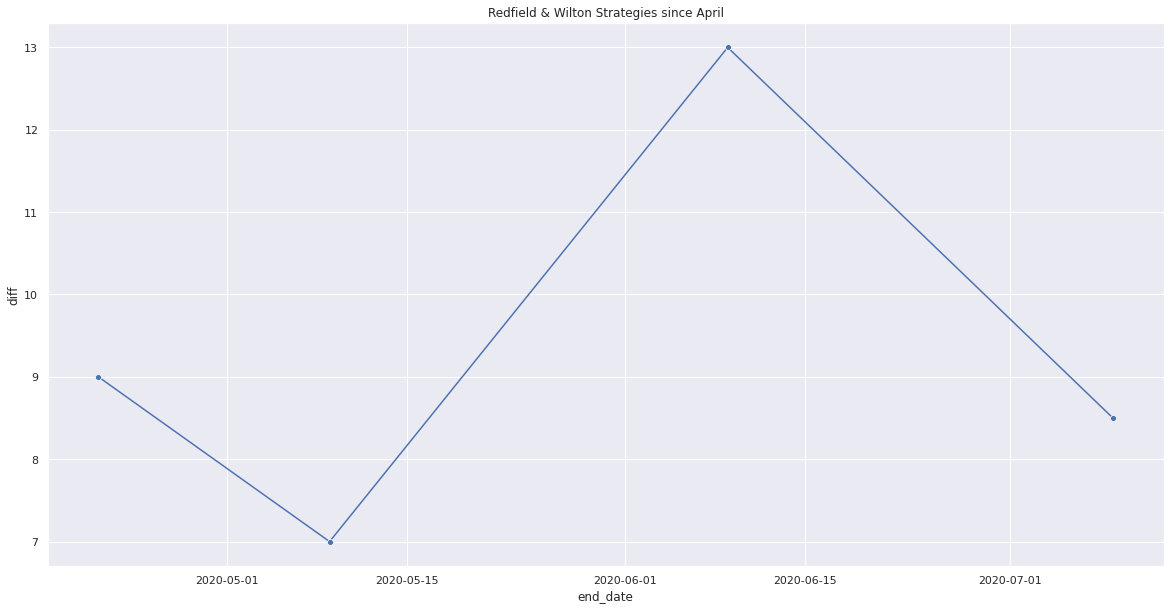

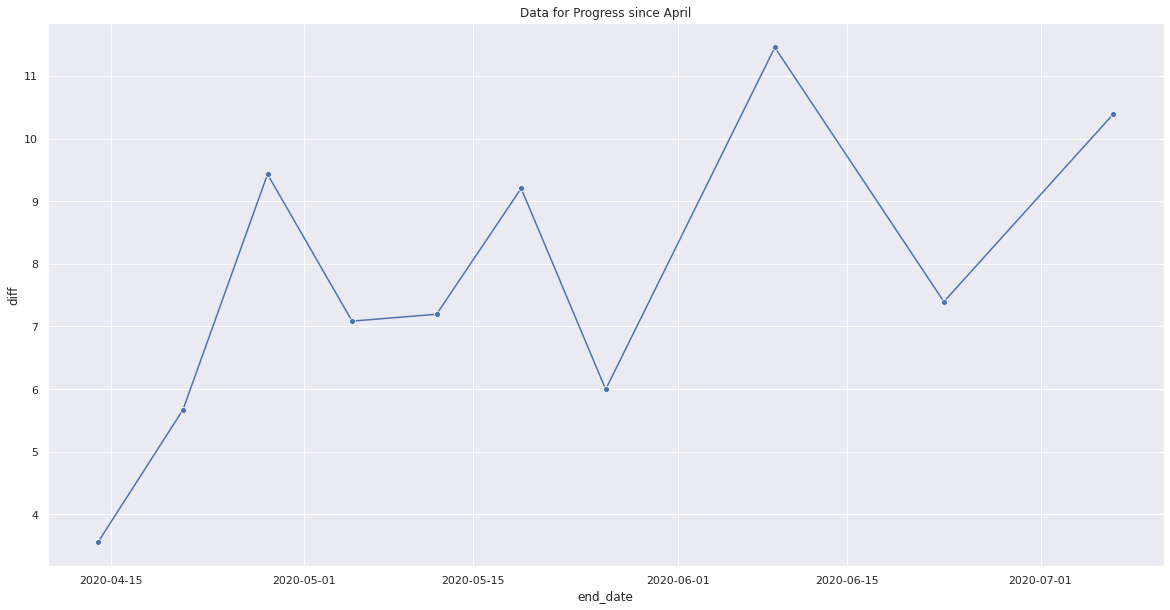

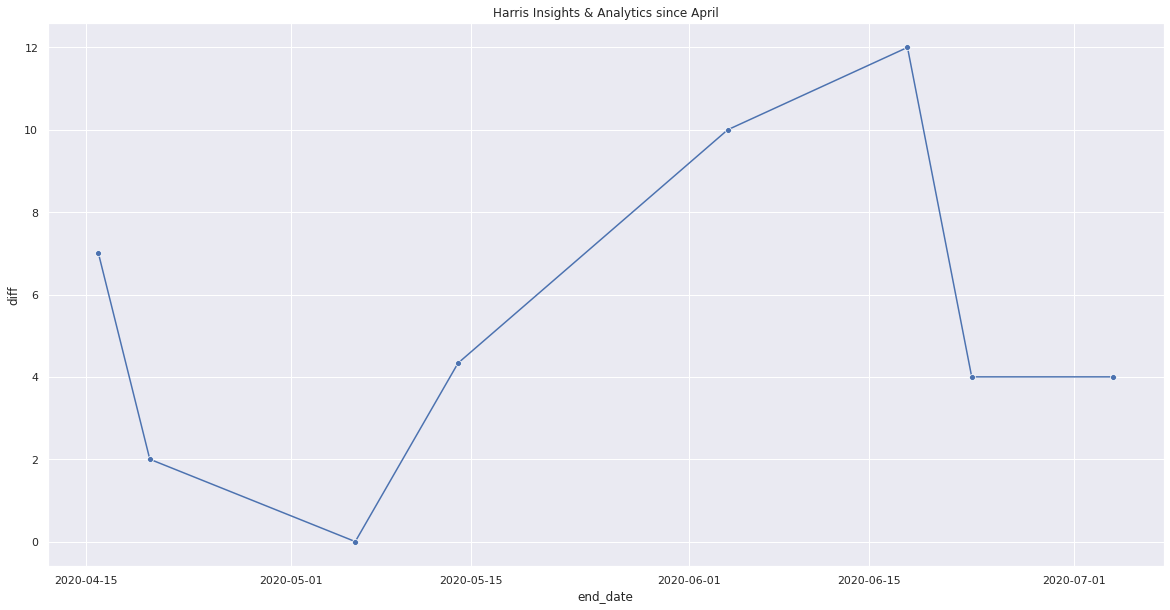

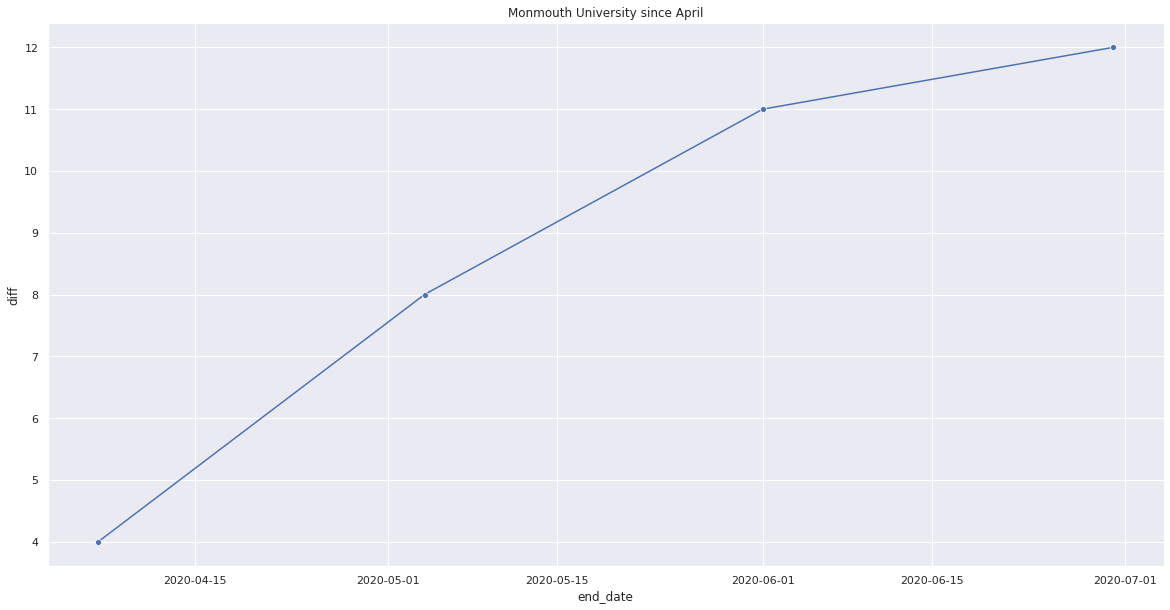

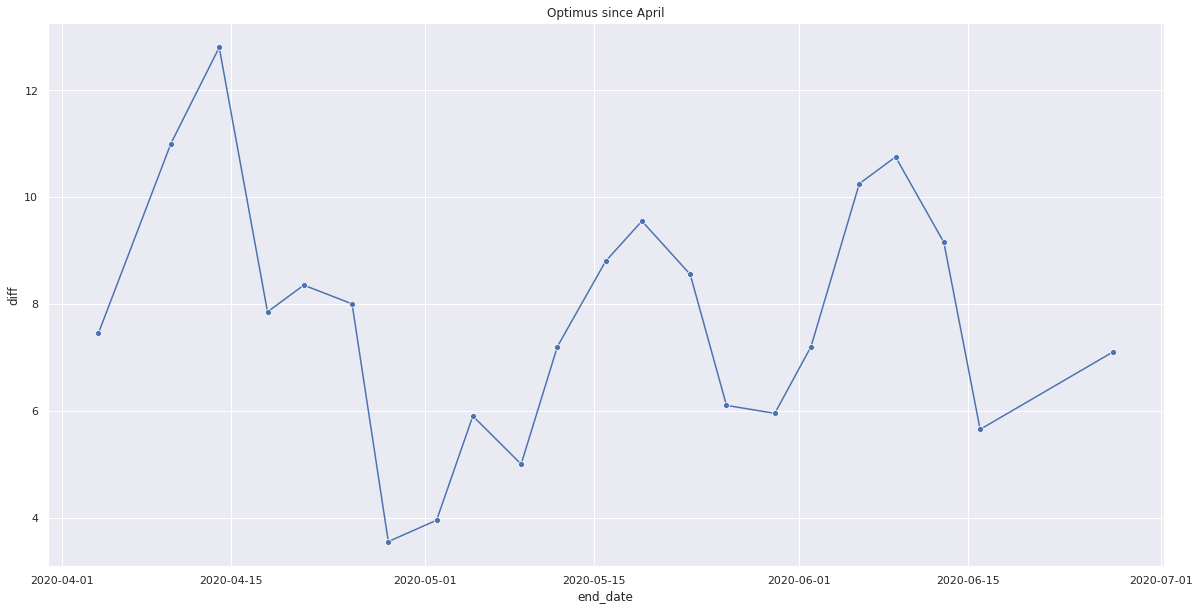

In [8]:
pollster_data = {}
for i, pollster in enumerate(pollsters):
    pollster_polls = national_polls[(national_polls['pollster'] == pollster) & (national_polls['end_date'] >= '4/1/2020') & national_polls['diff'].notnull()]
    if pollster_polls.shape[0] >= 5:
        plt.figure(i, figsize=(20,10))
        plot = sns.lineplot(x='end_date', y='diff', data=pollster_polls, marker='o', ci=None).set_title(pollster + ' since April')
        fig = plot.get_figure()
        filename = pollster.replace('/','').replace('&','and').replace('.','').replace(' ','_').lower()
        pollster_data[filename] = pollster
        fig.savefig(f'src/images/national/pollster/{filename}.png')
with open('src/images/national/pollster/pollsters.json', 'wt') as fout:
    json.dump(pollster_data, fout)

In [9]:
statepolls = df[df['state'].notna()]

In [10]:
states = statepolls.state.unique()

<ipython-input-11-e2890a232ff6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsize=(30,20))


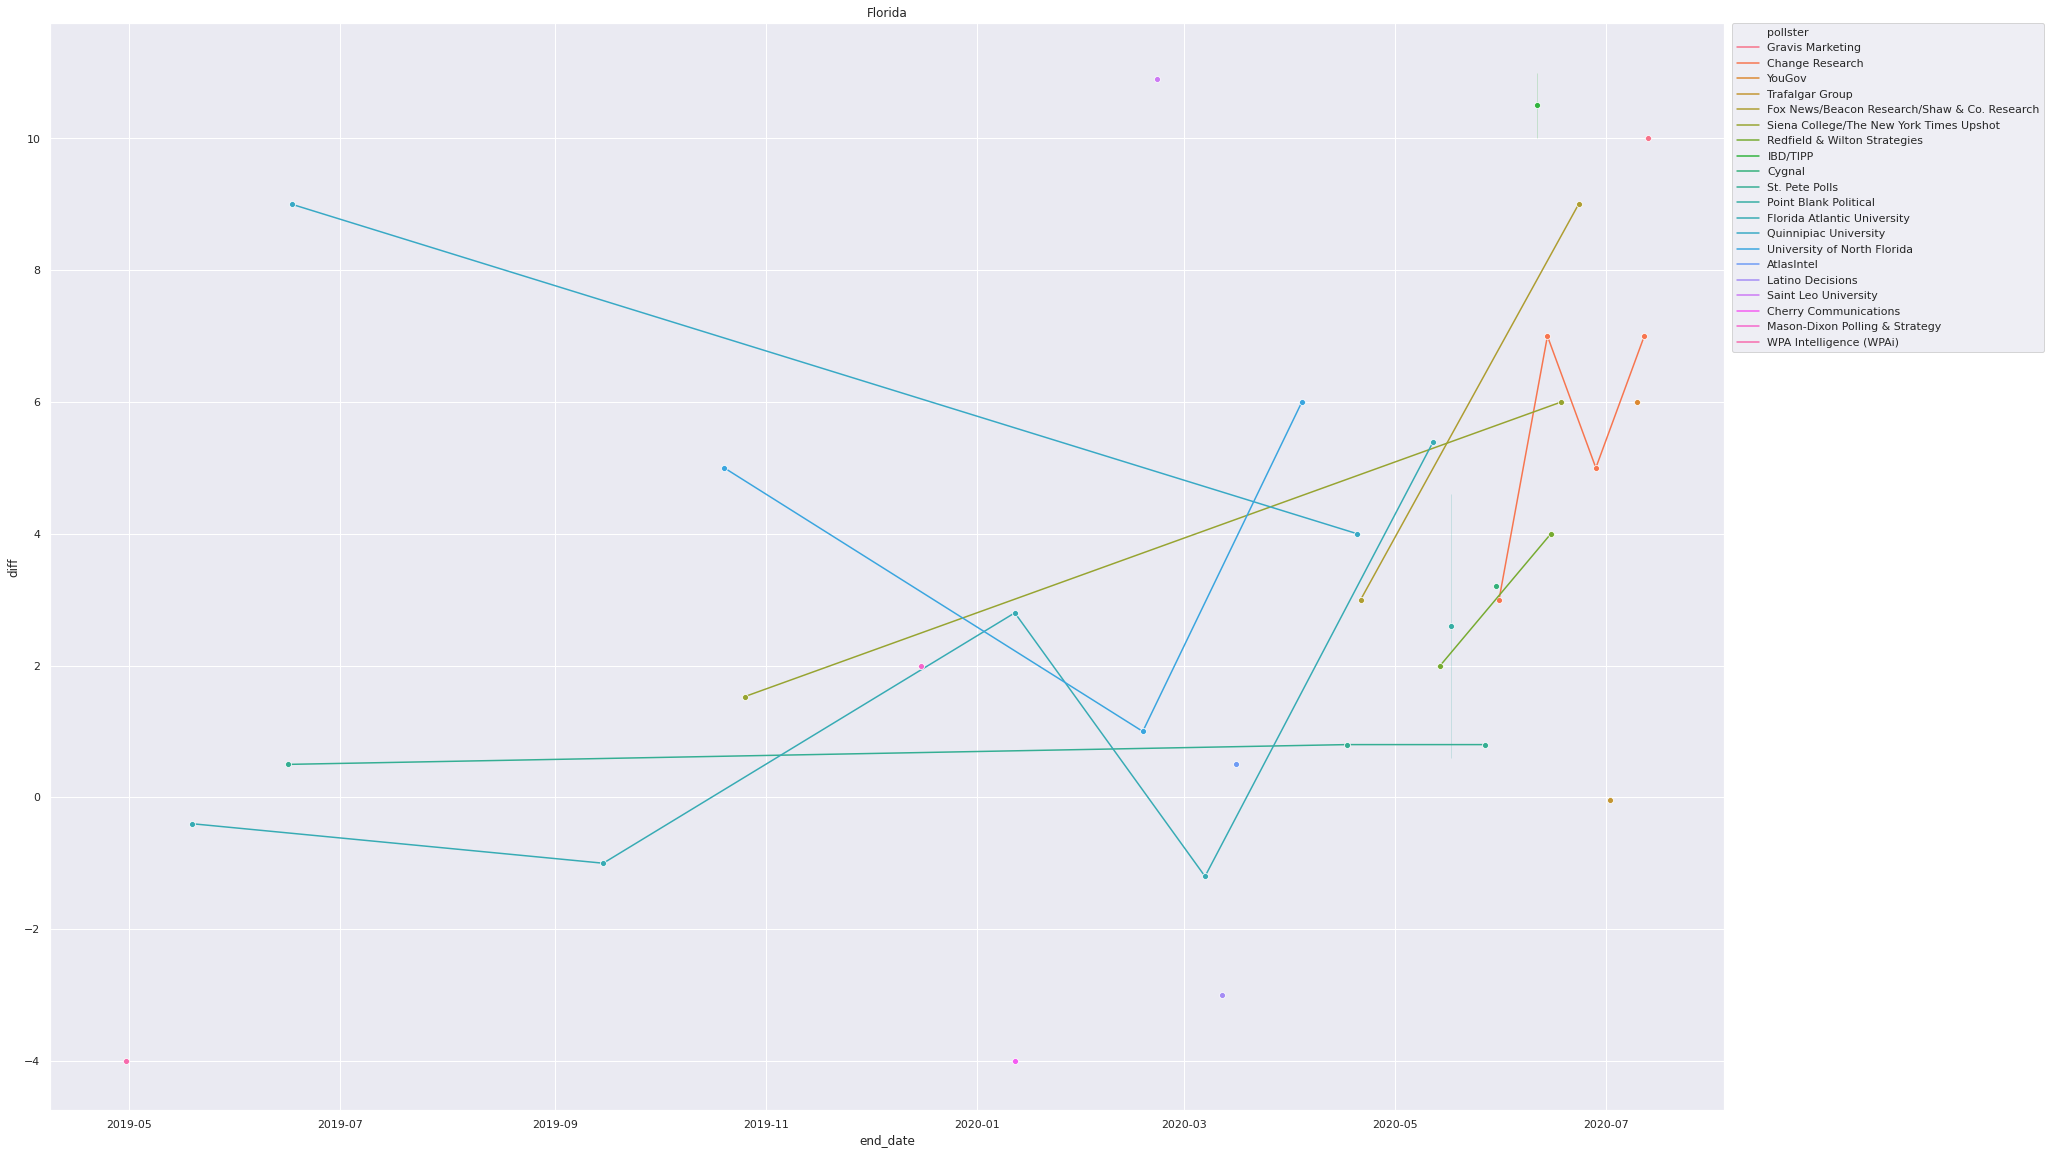

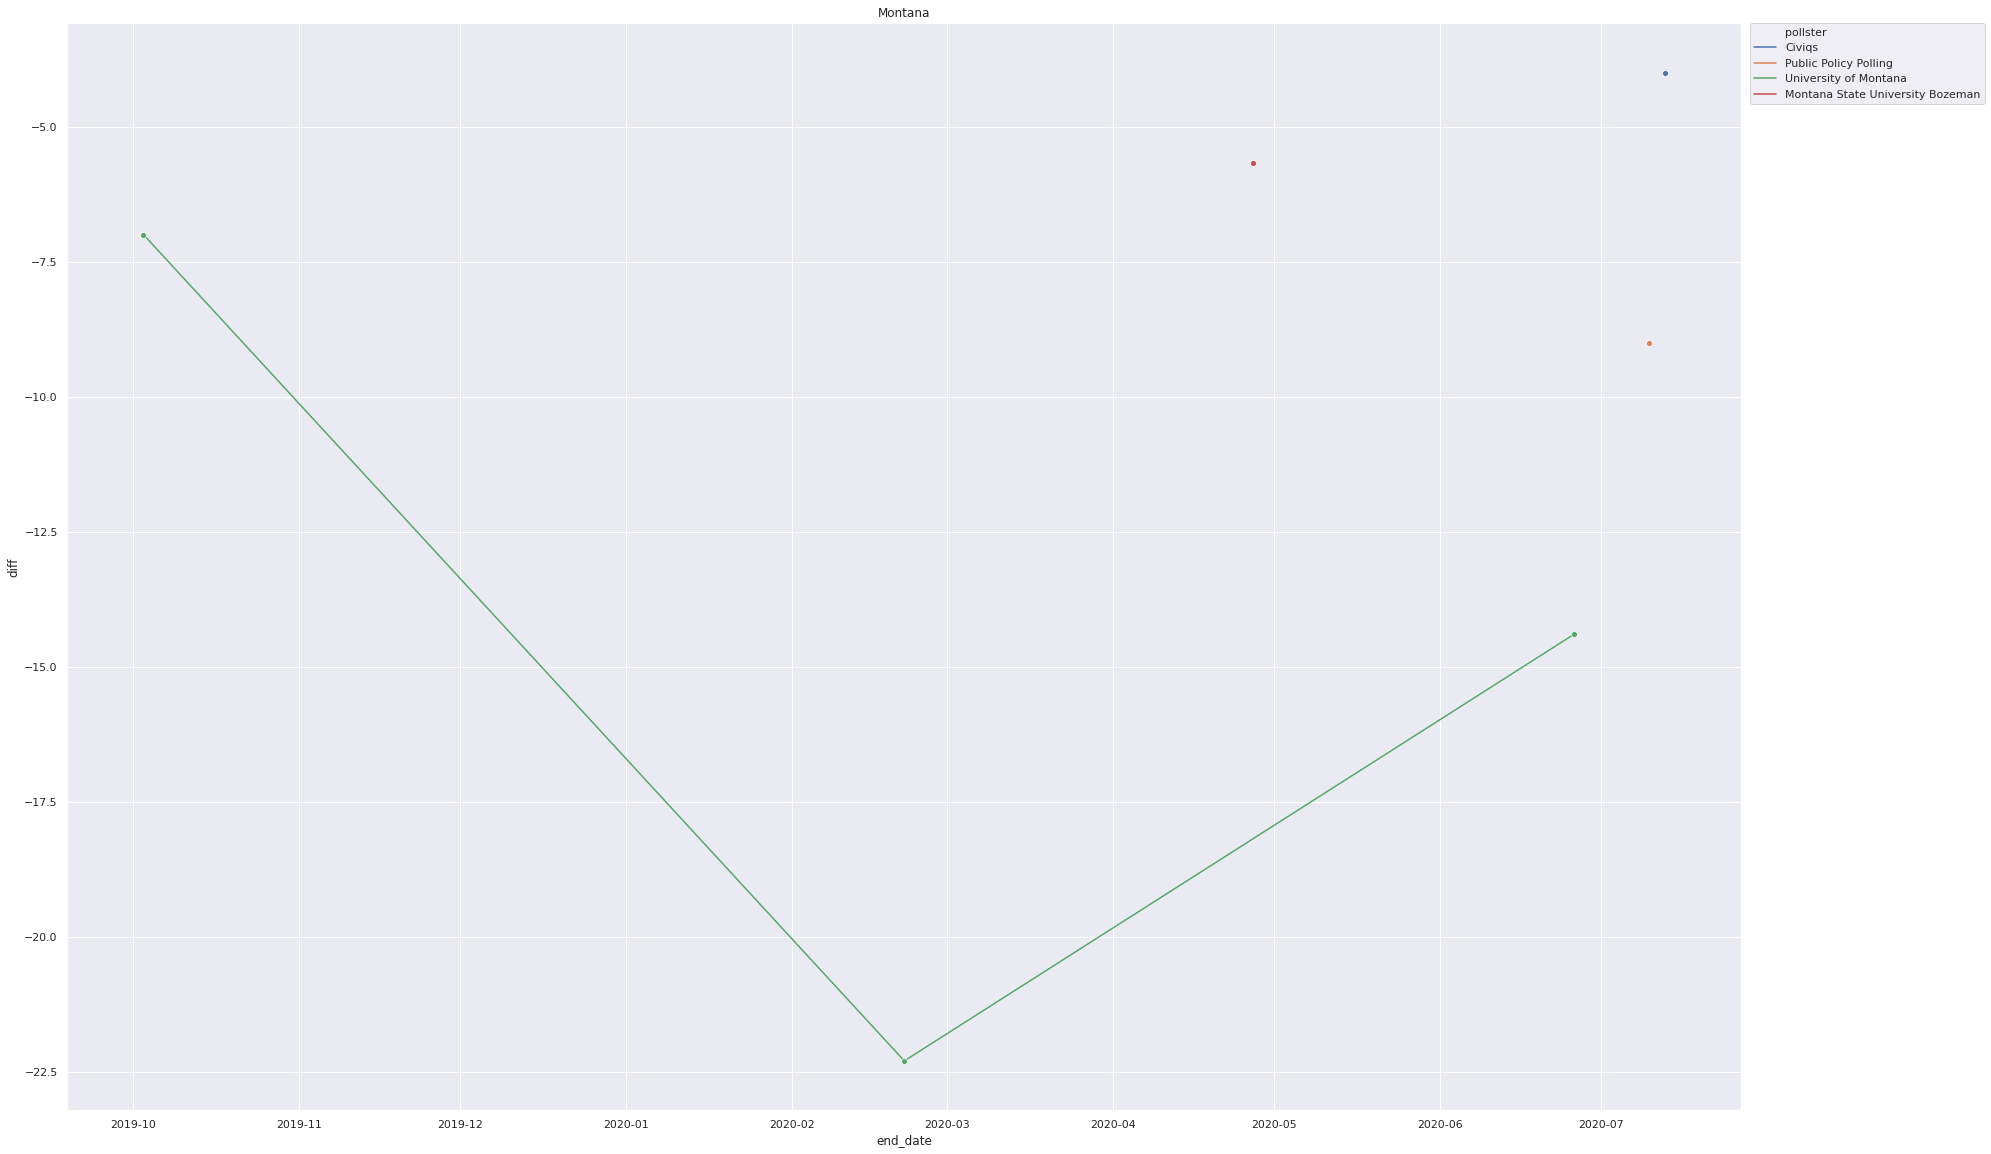

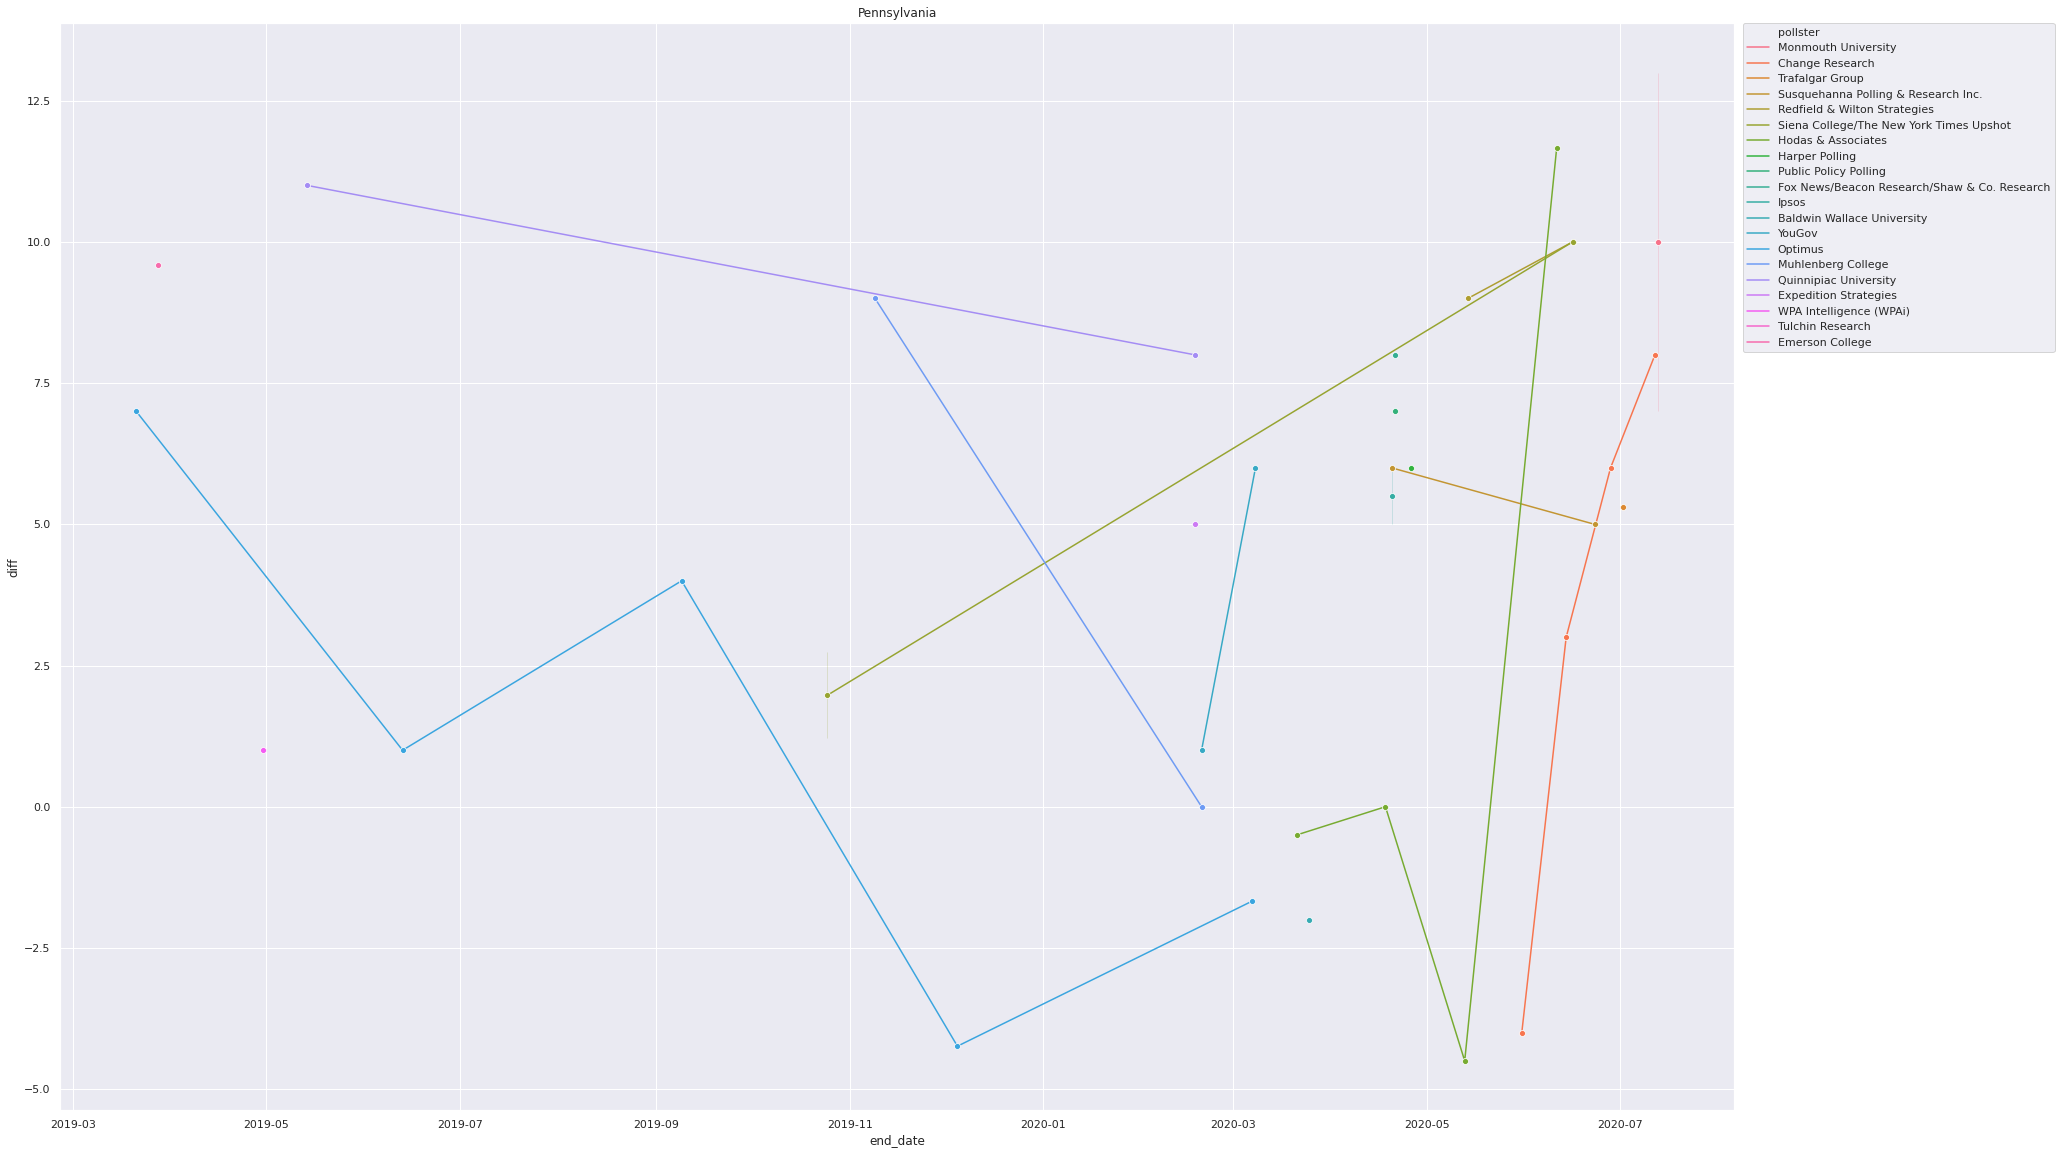

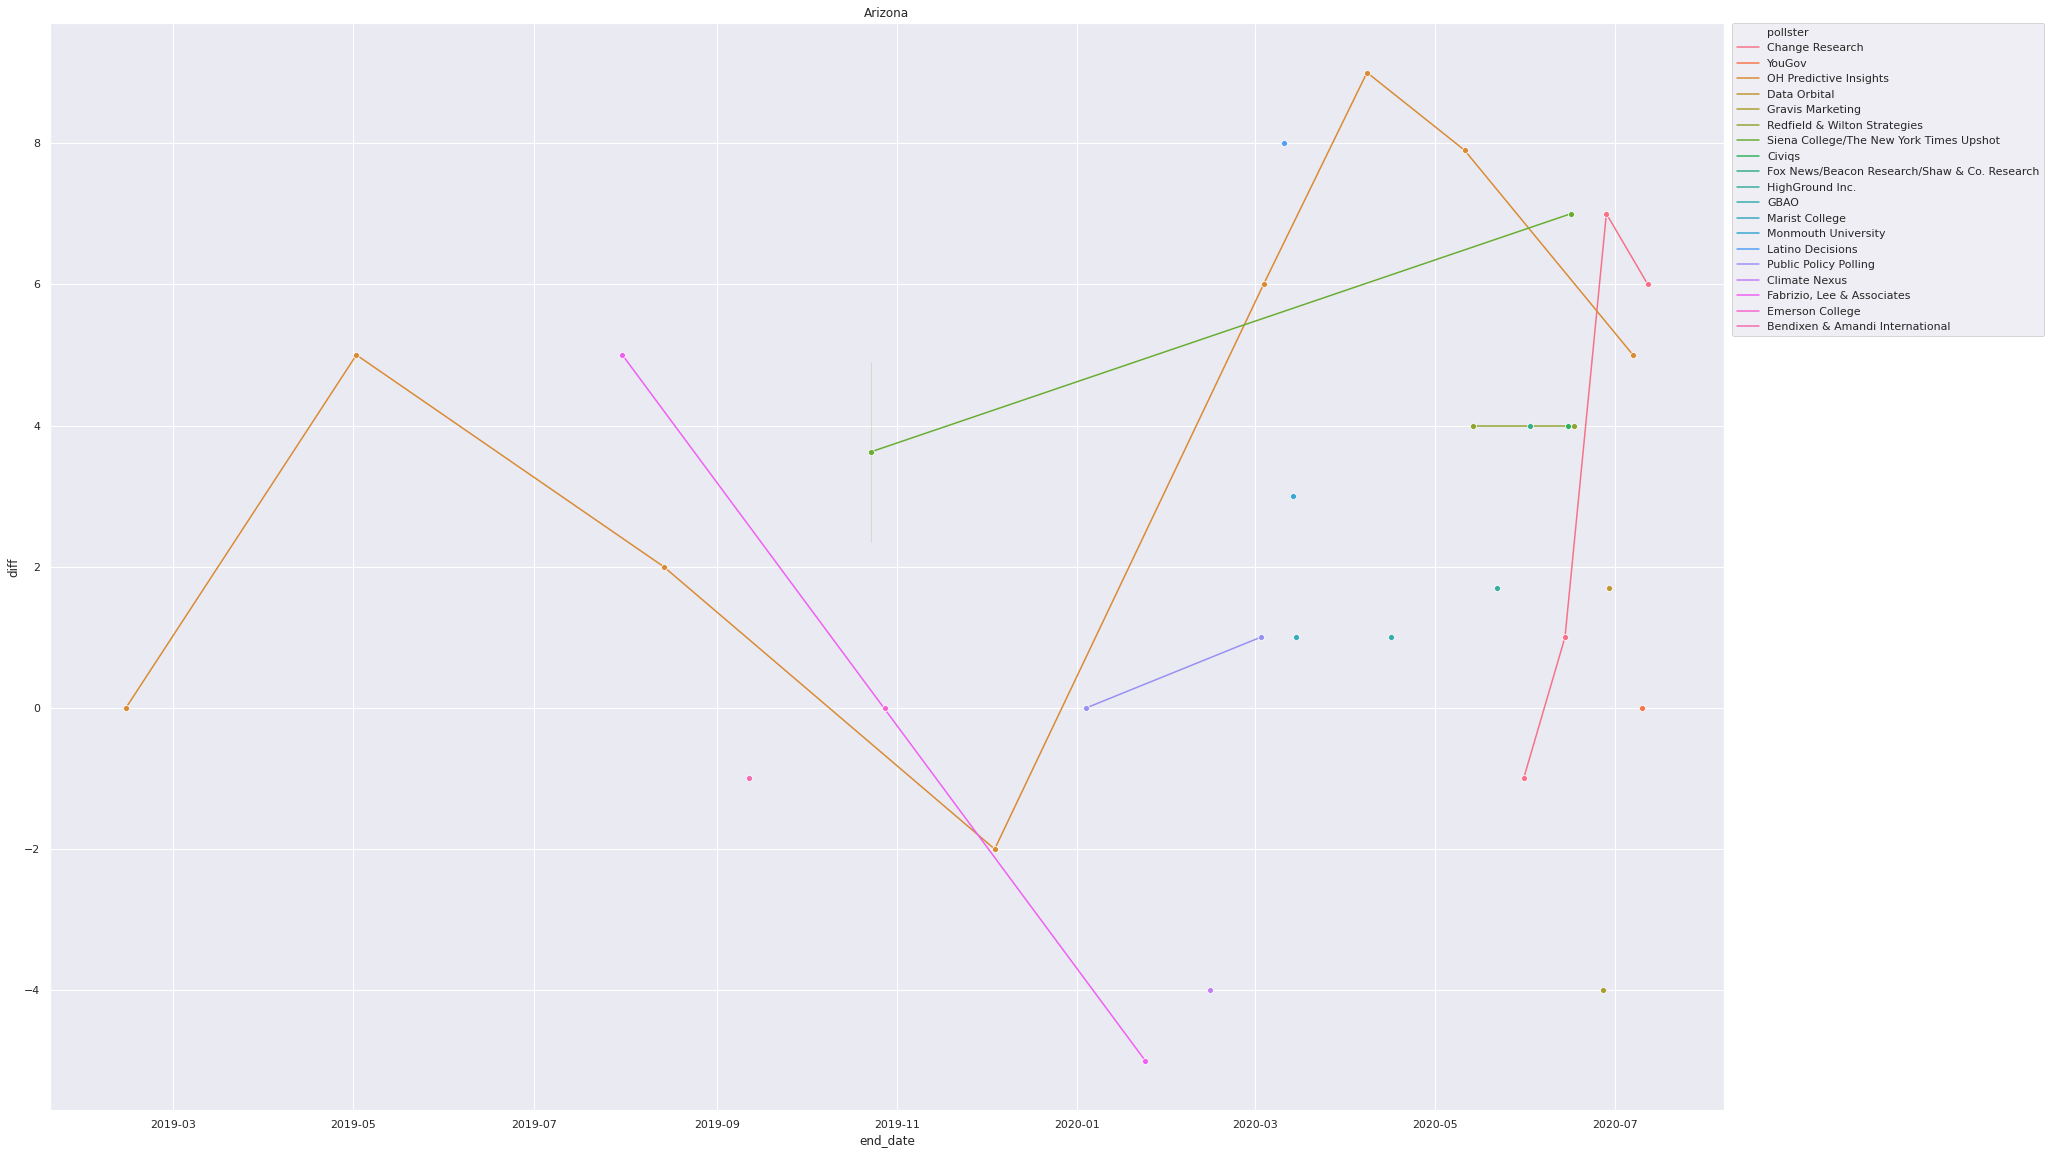

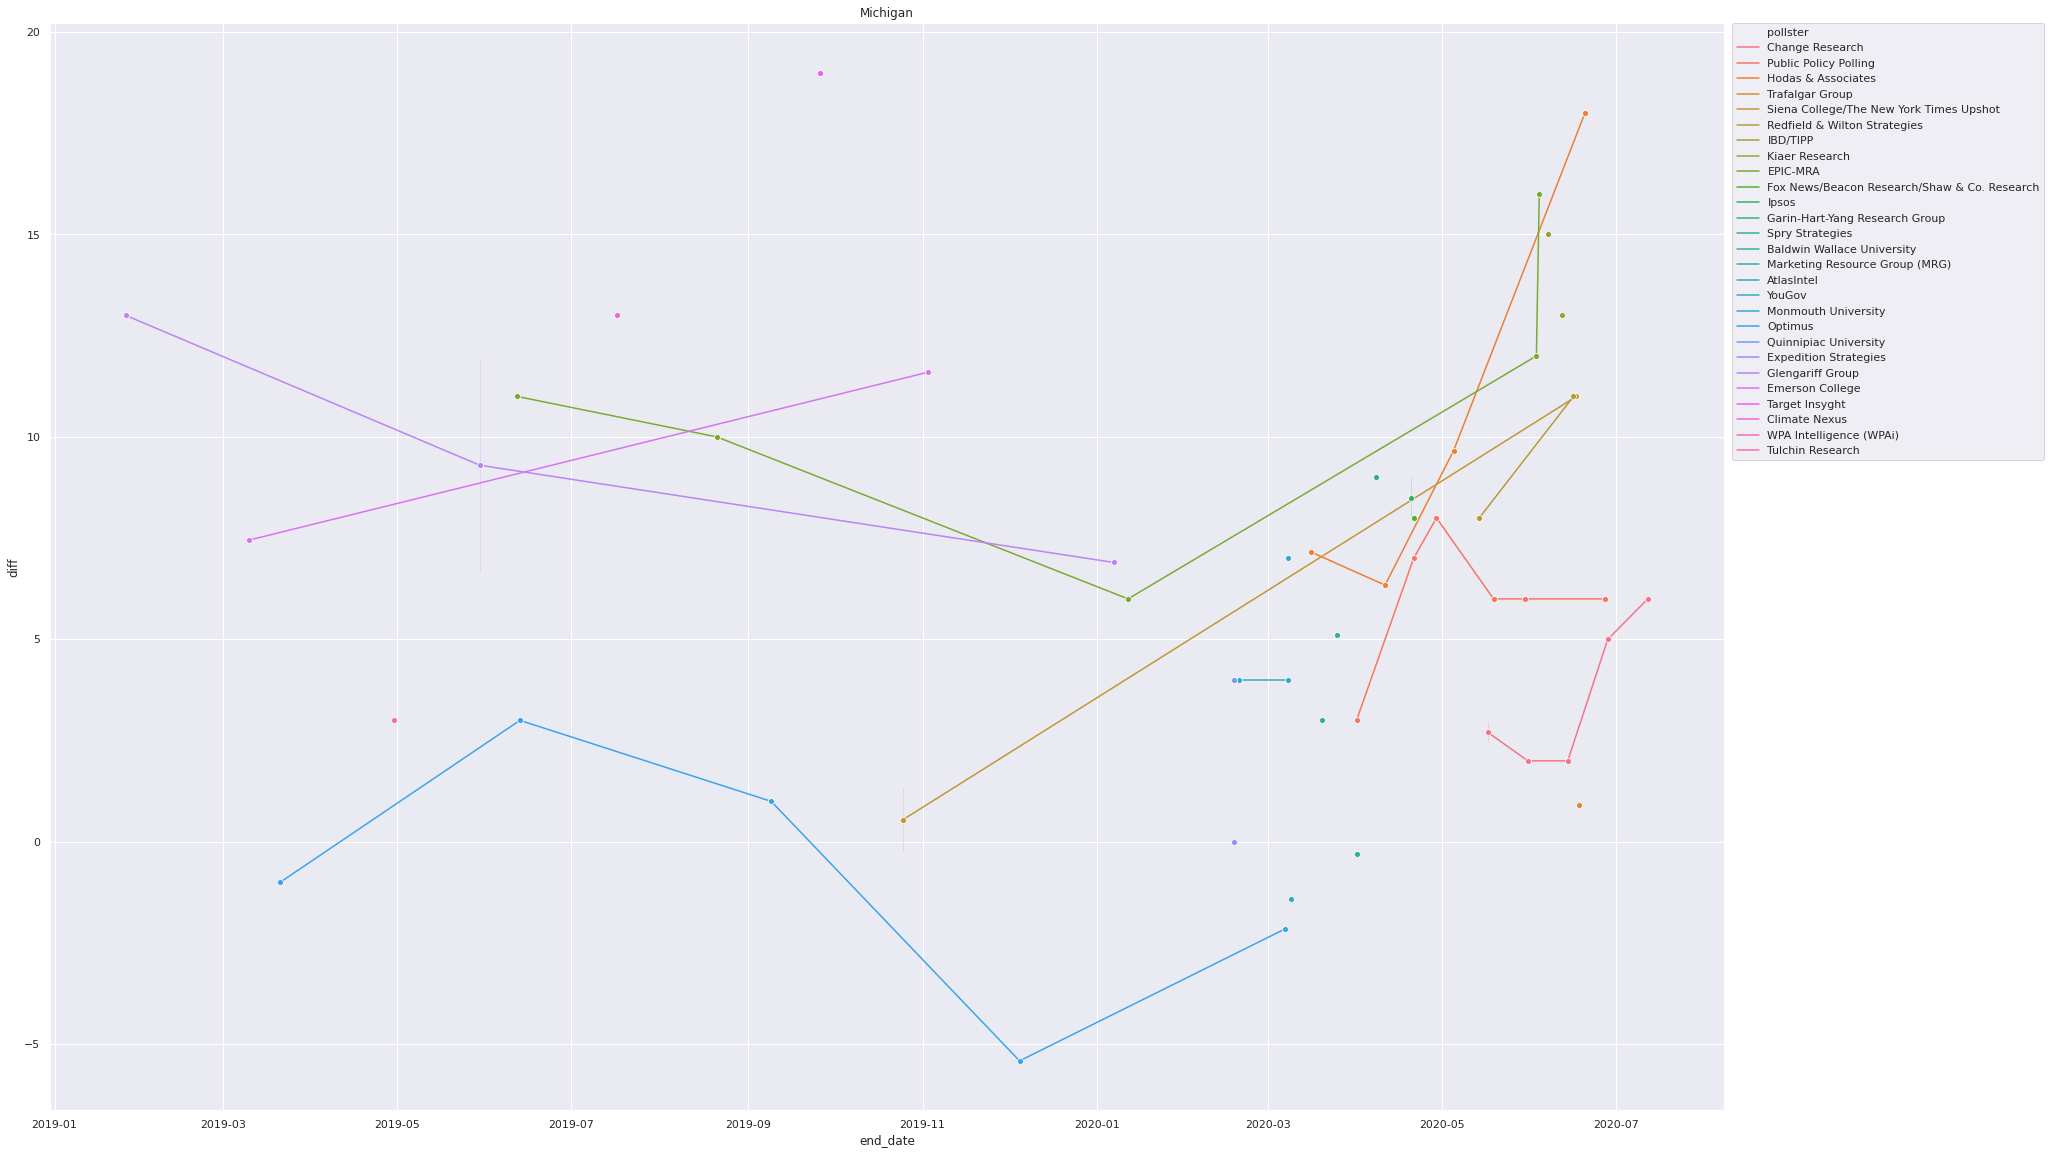

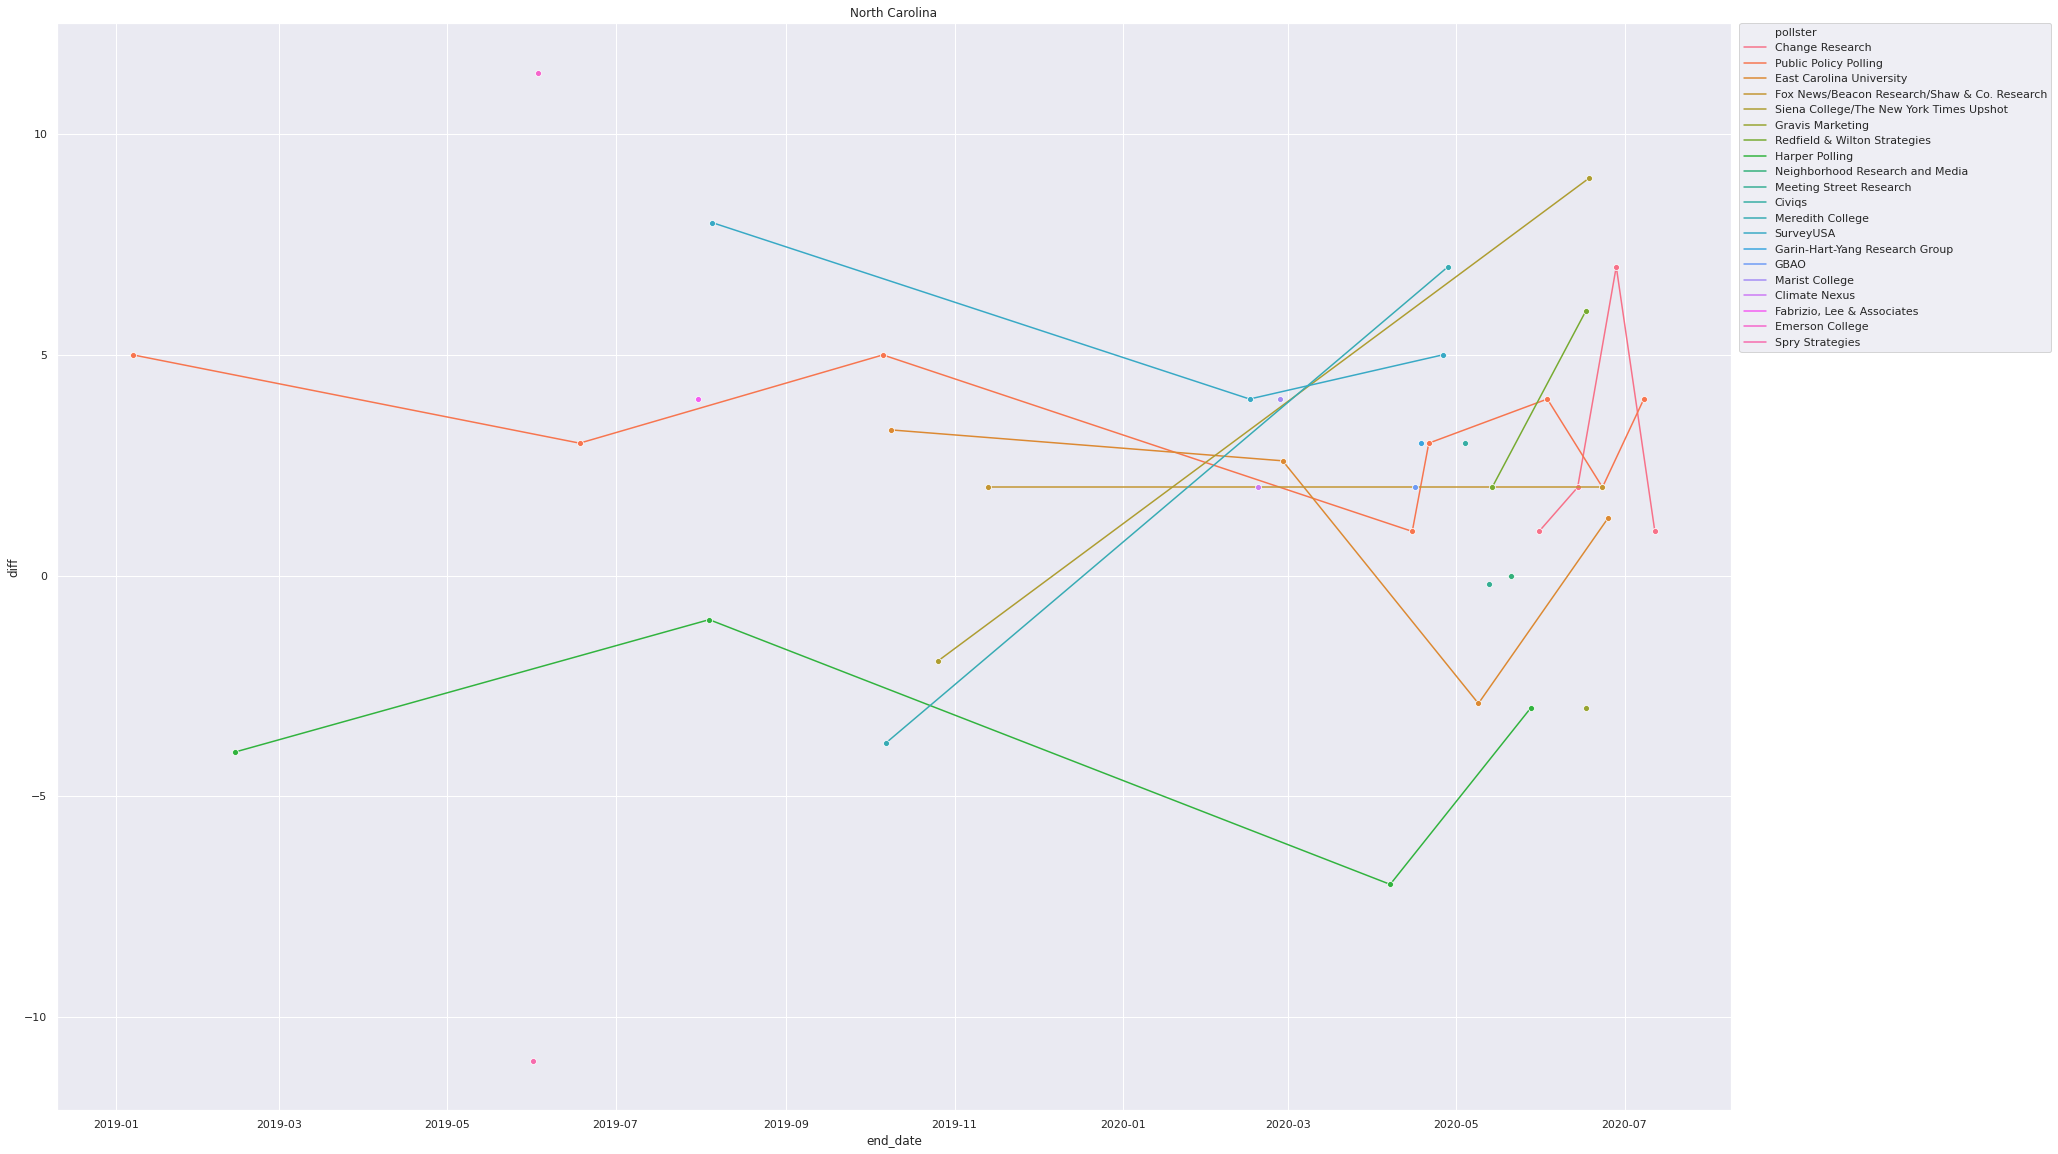

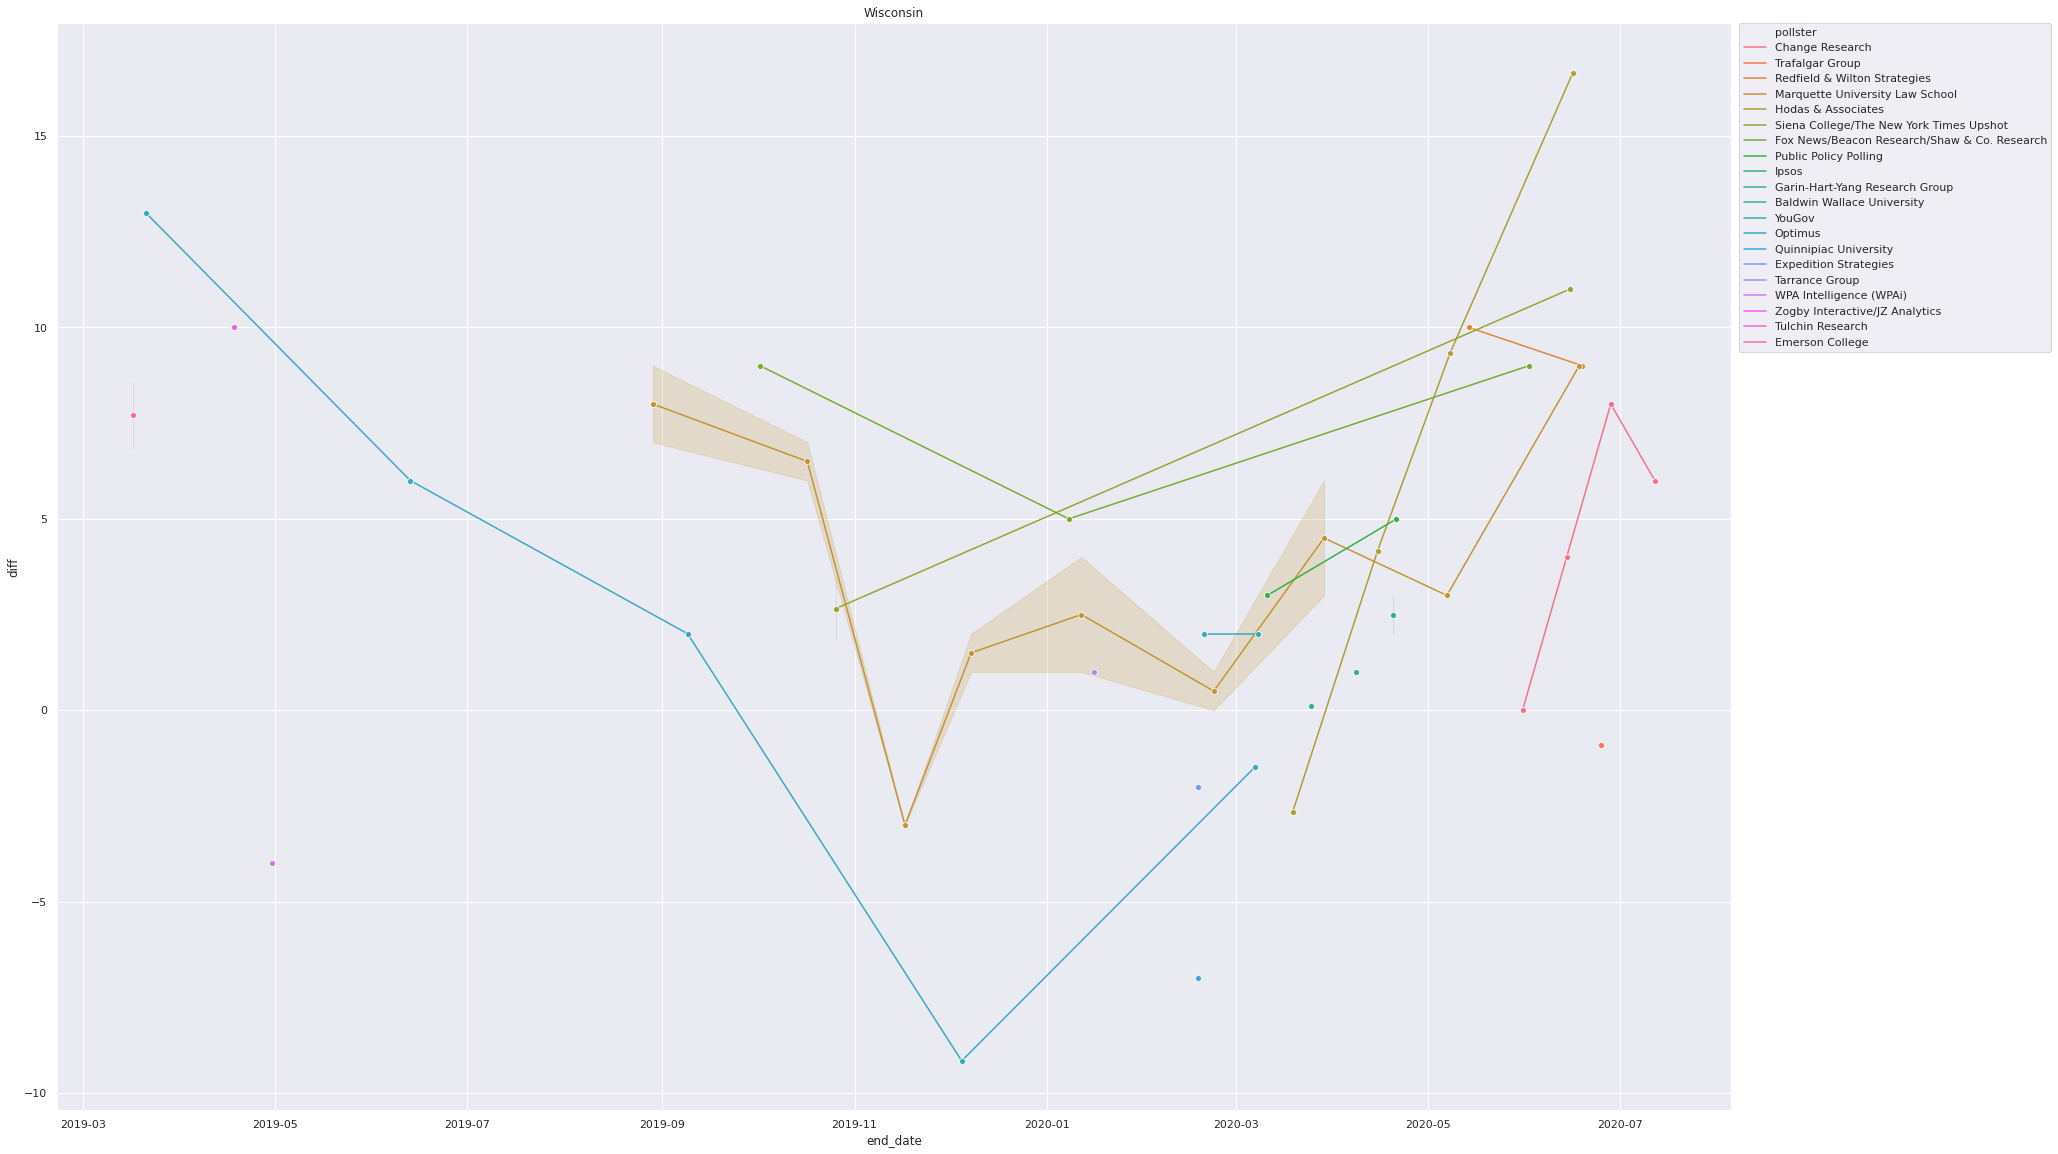

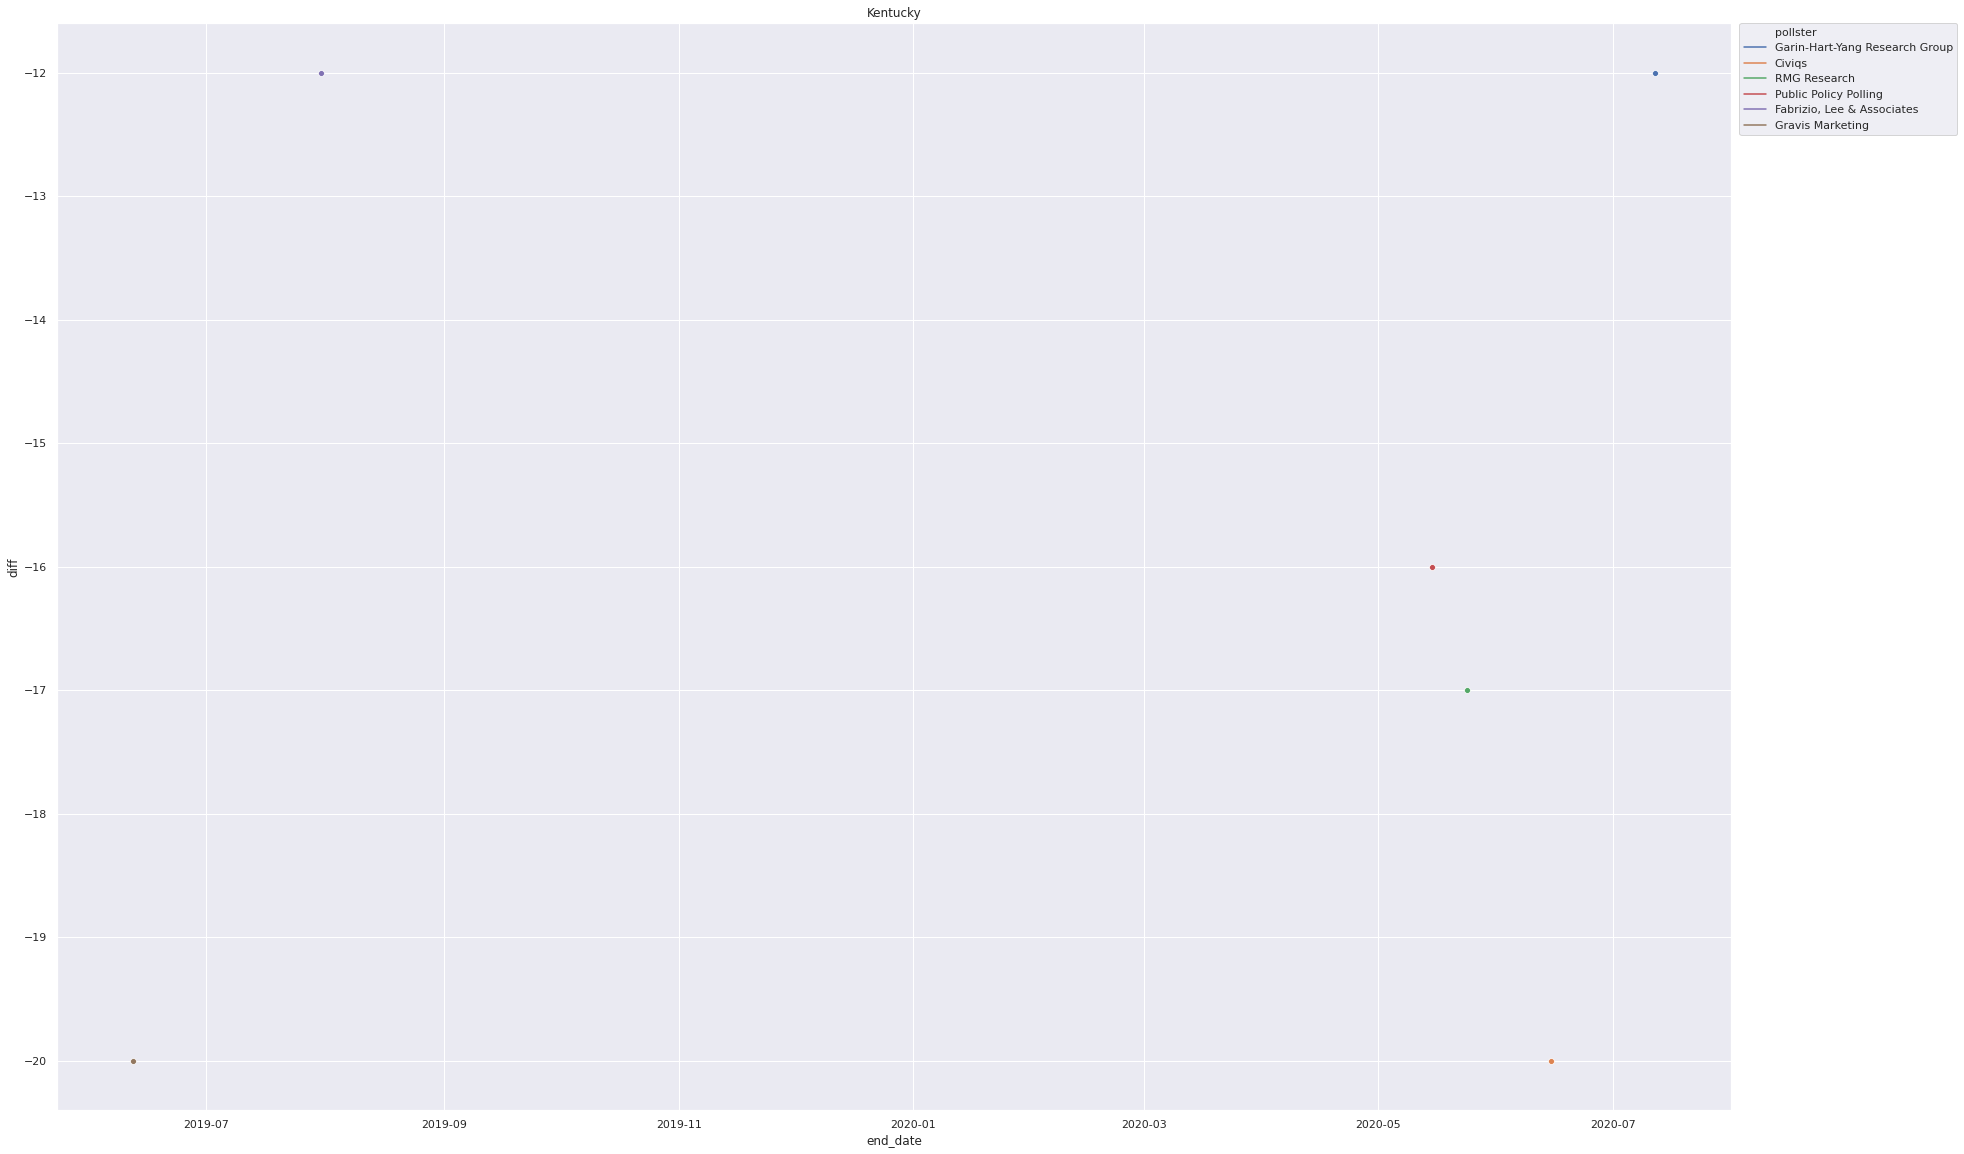

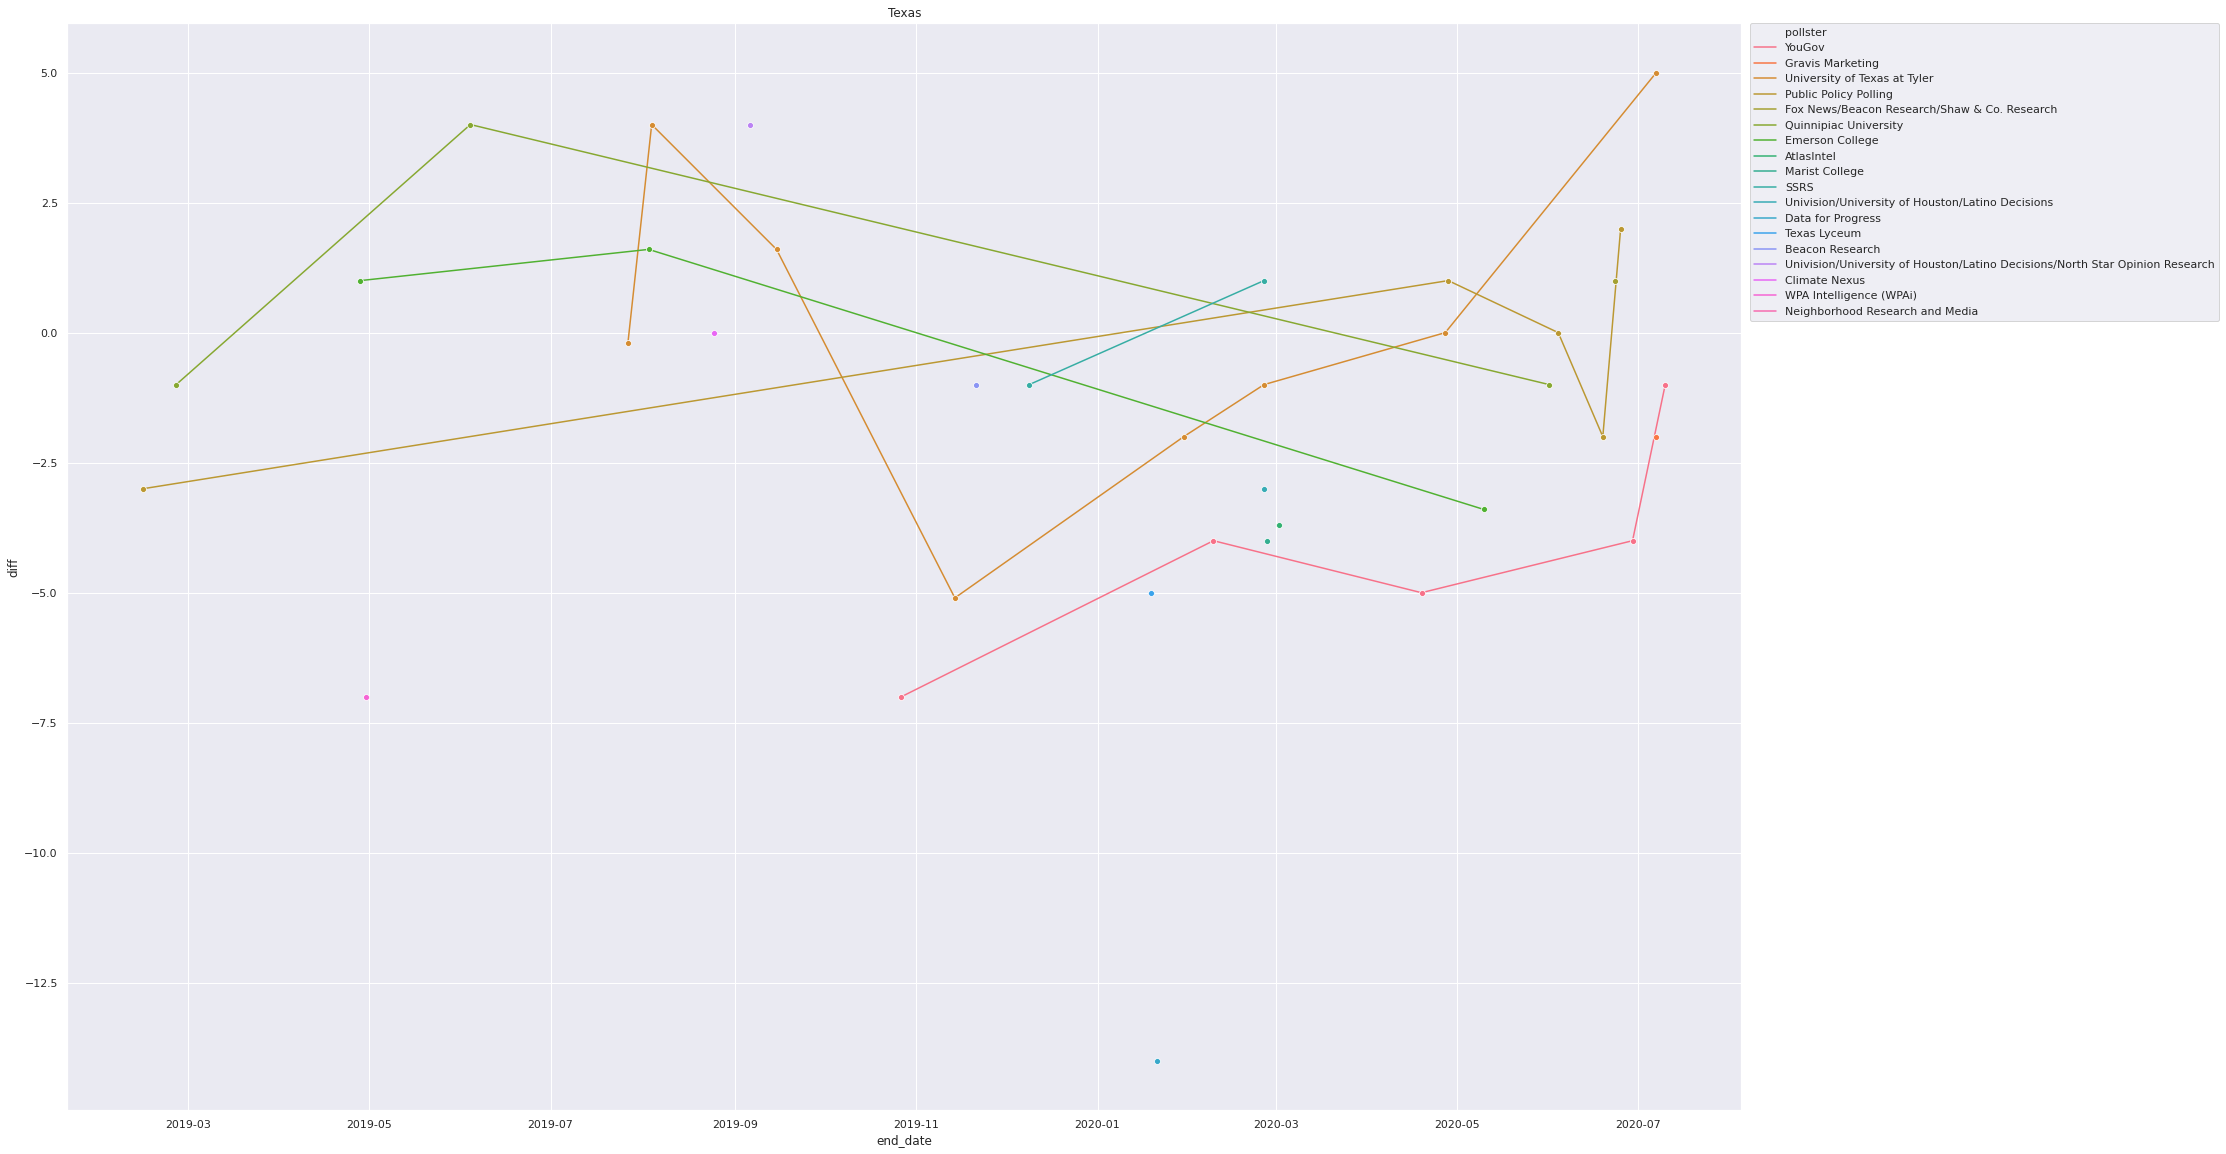

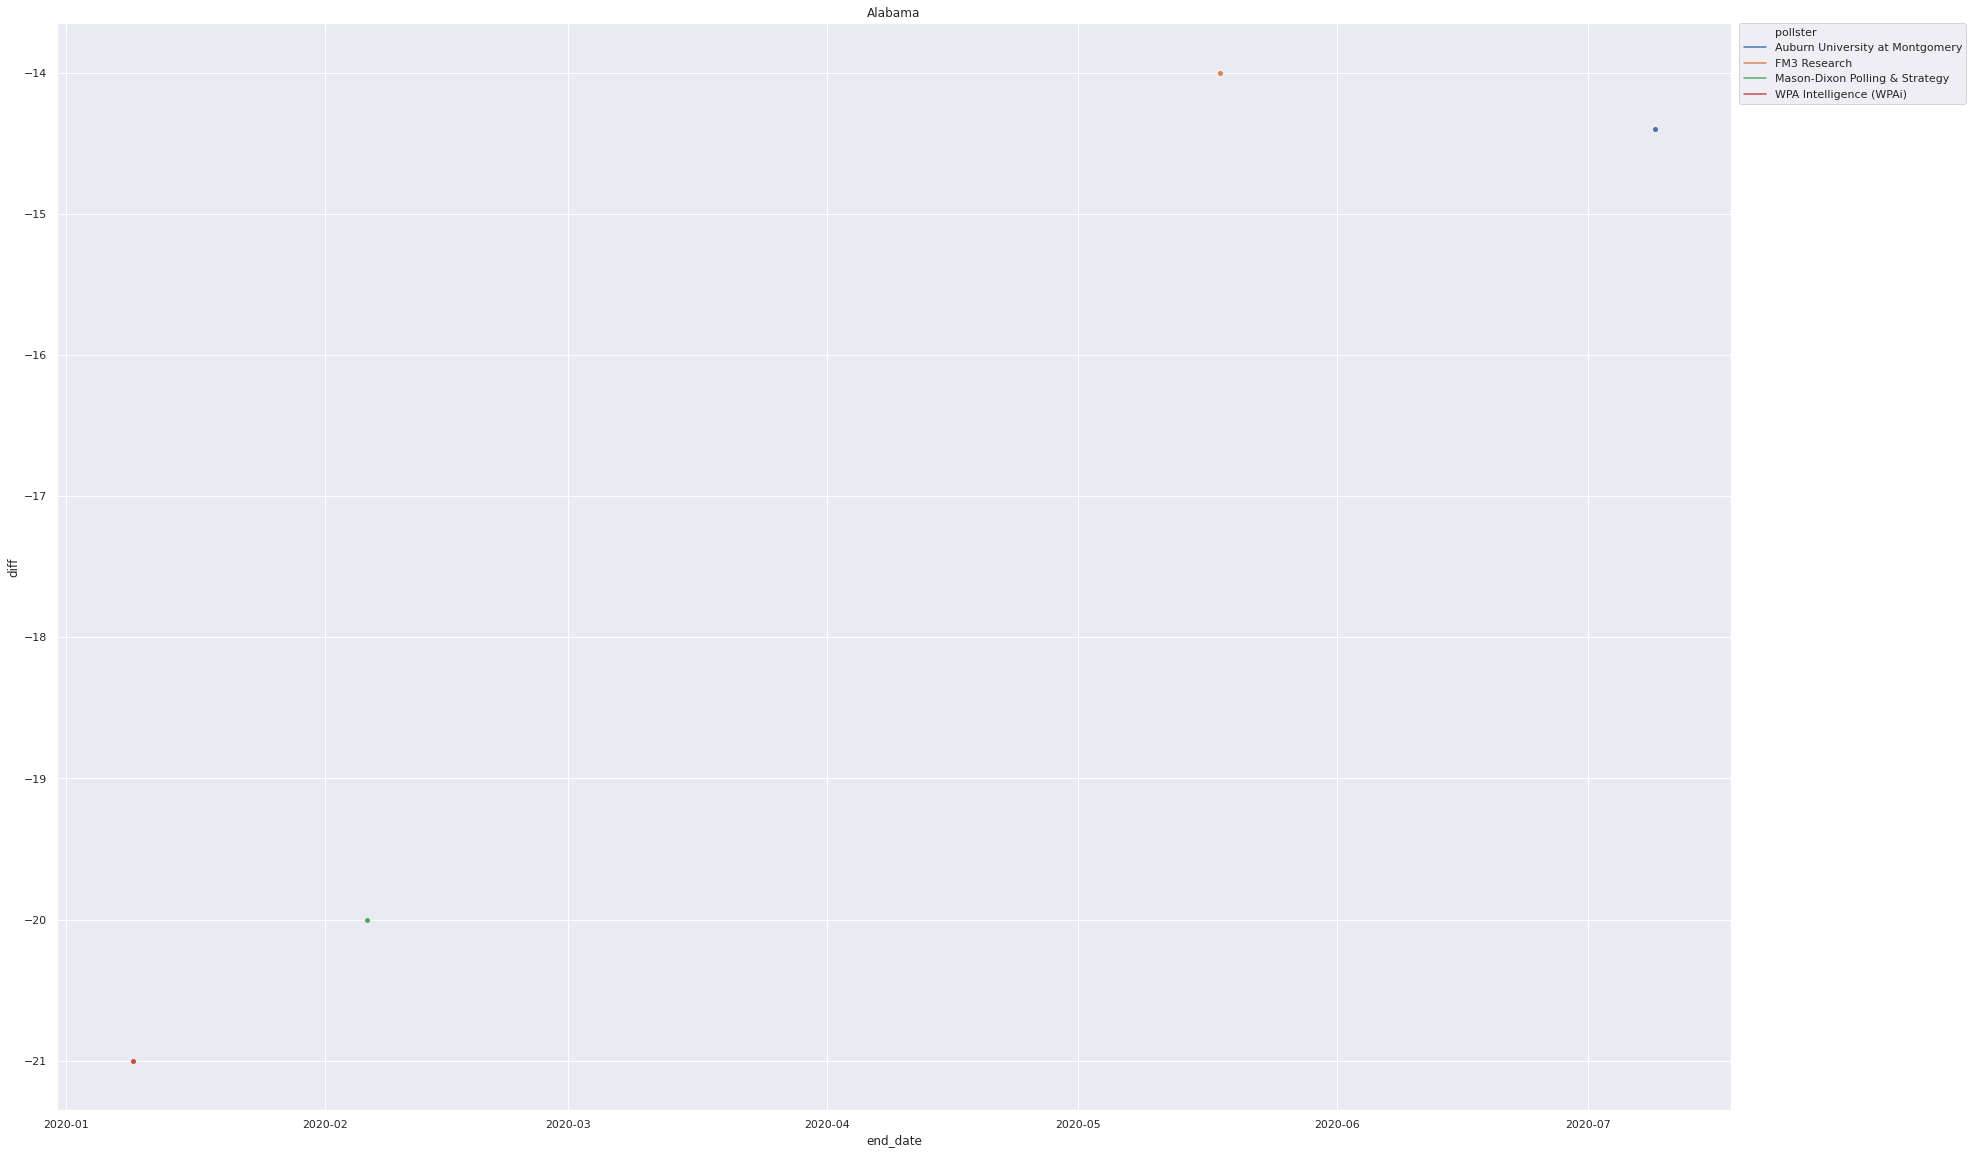

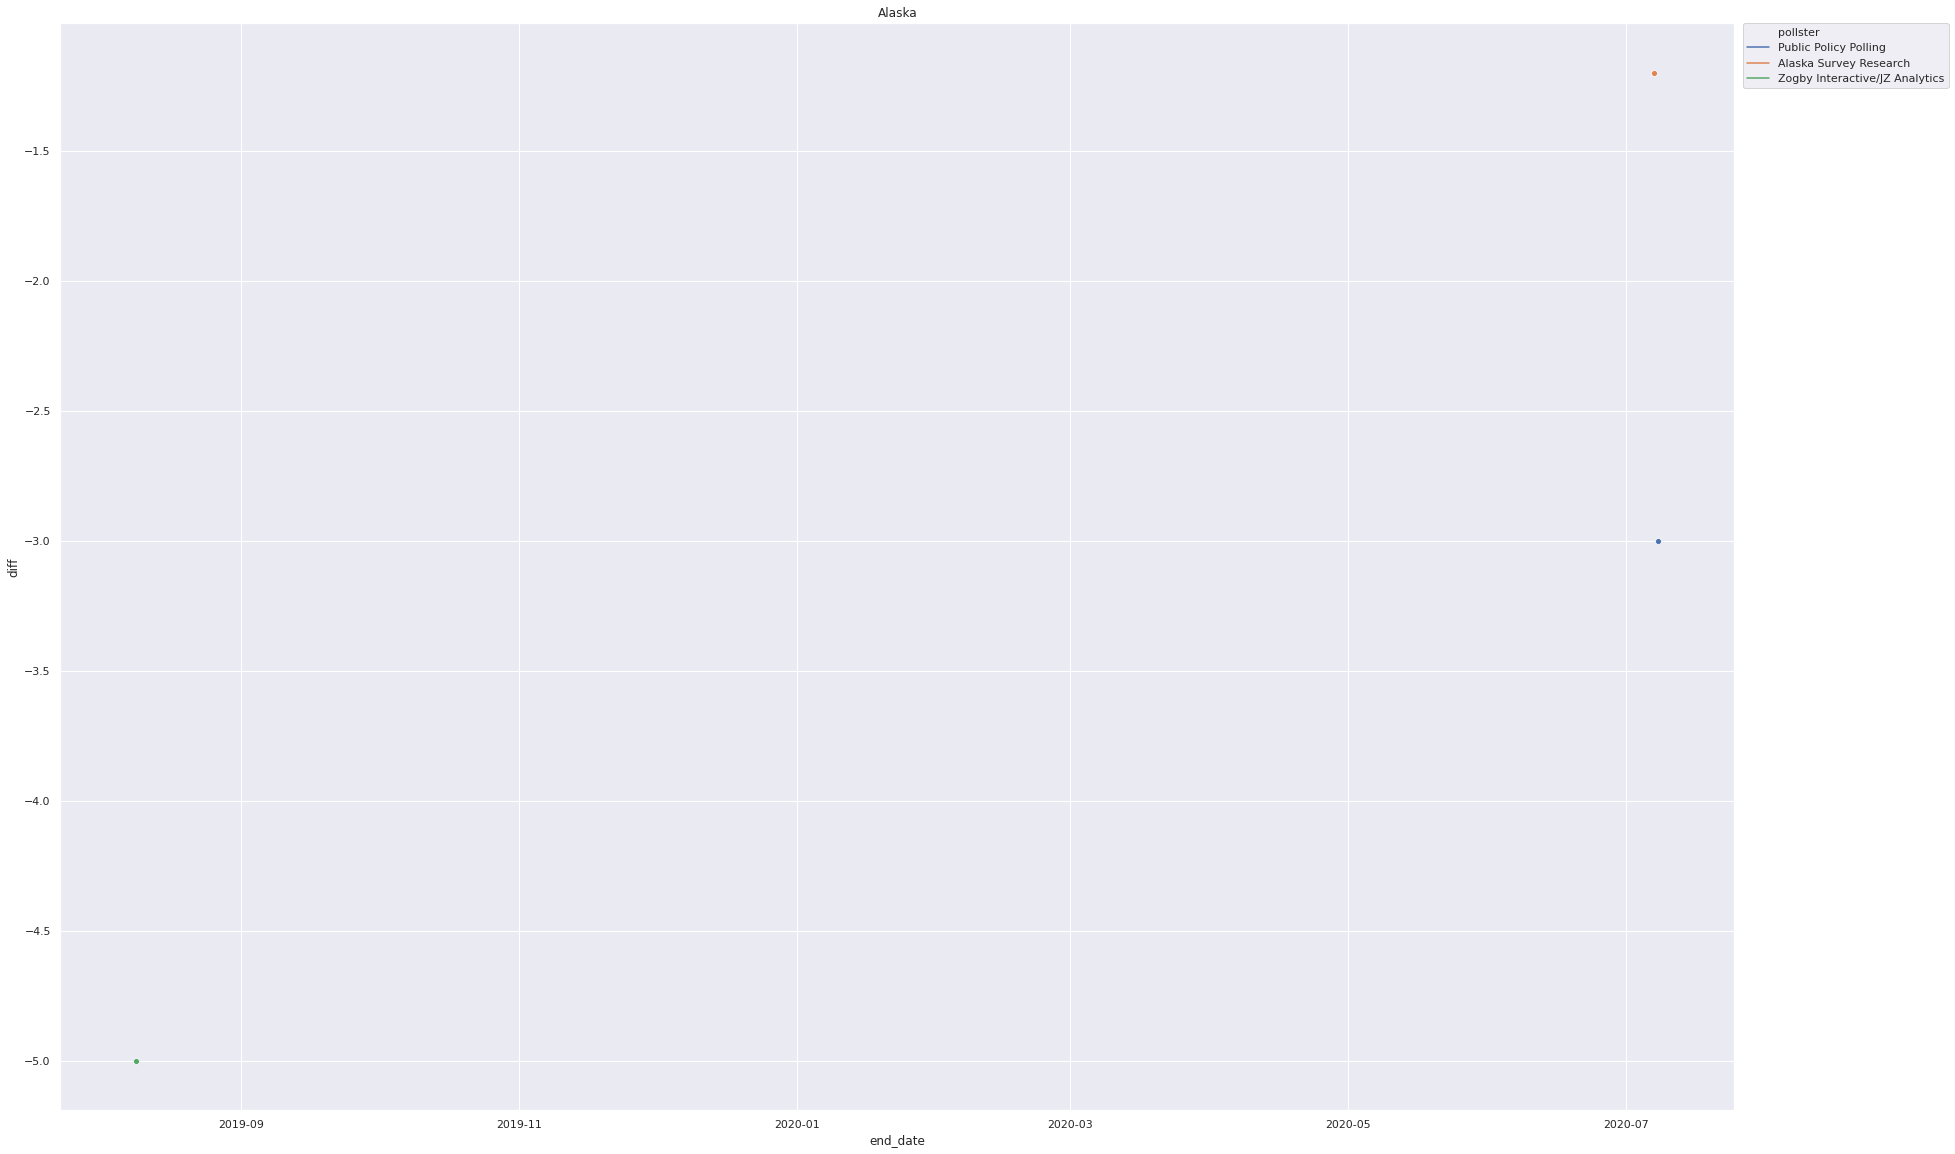

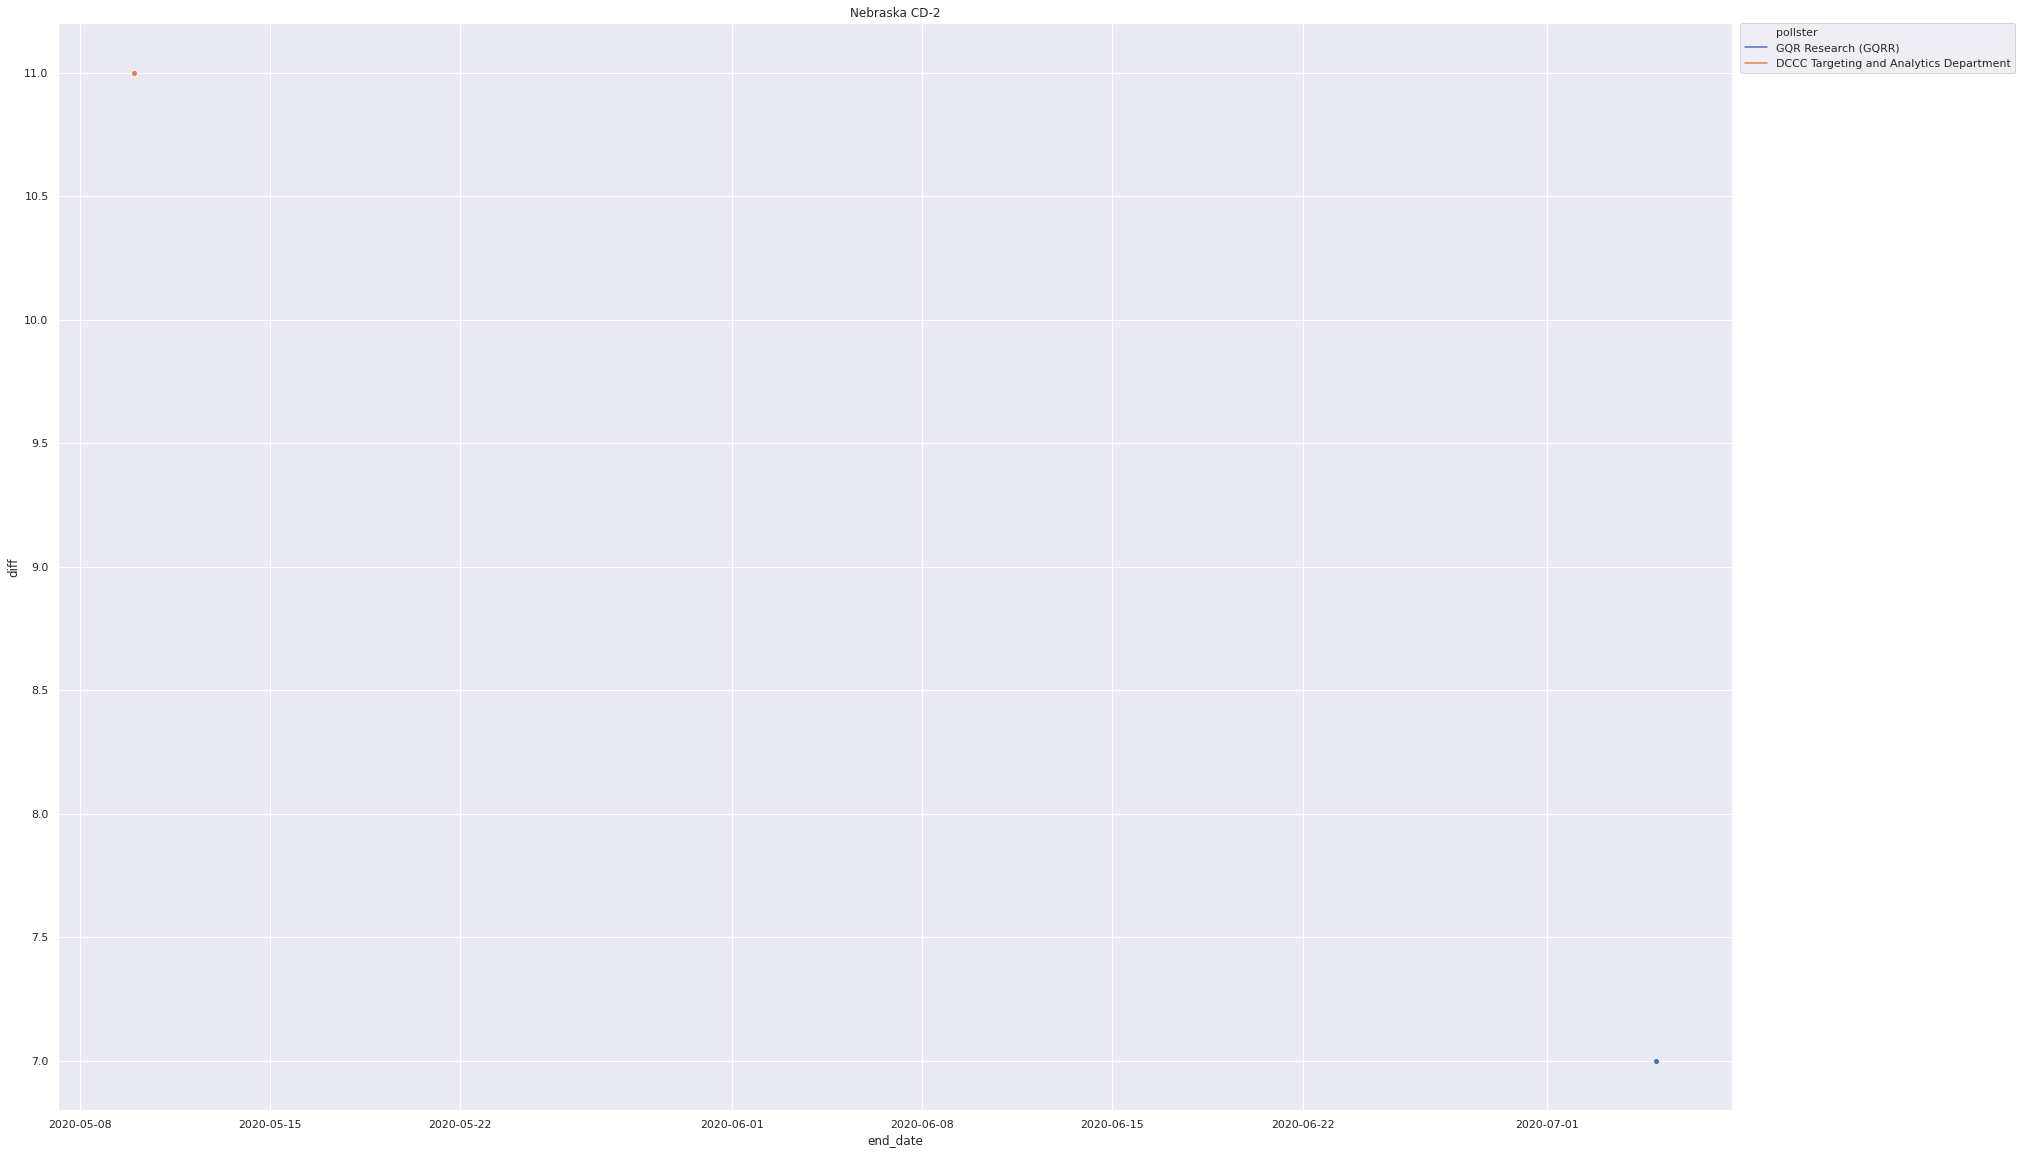

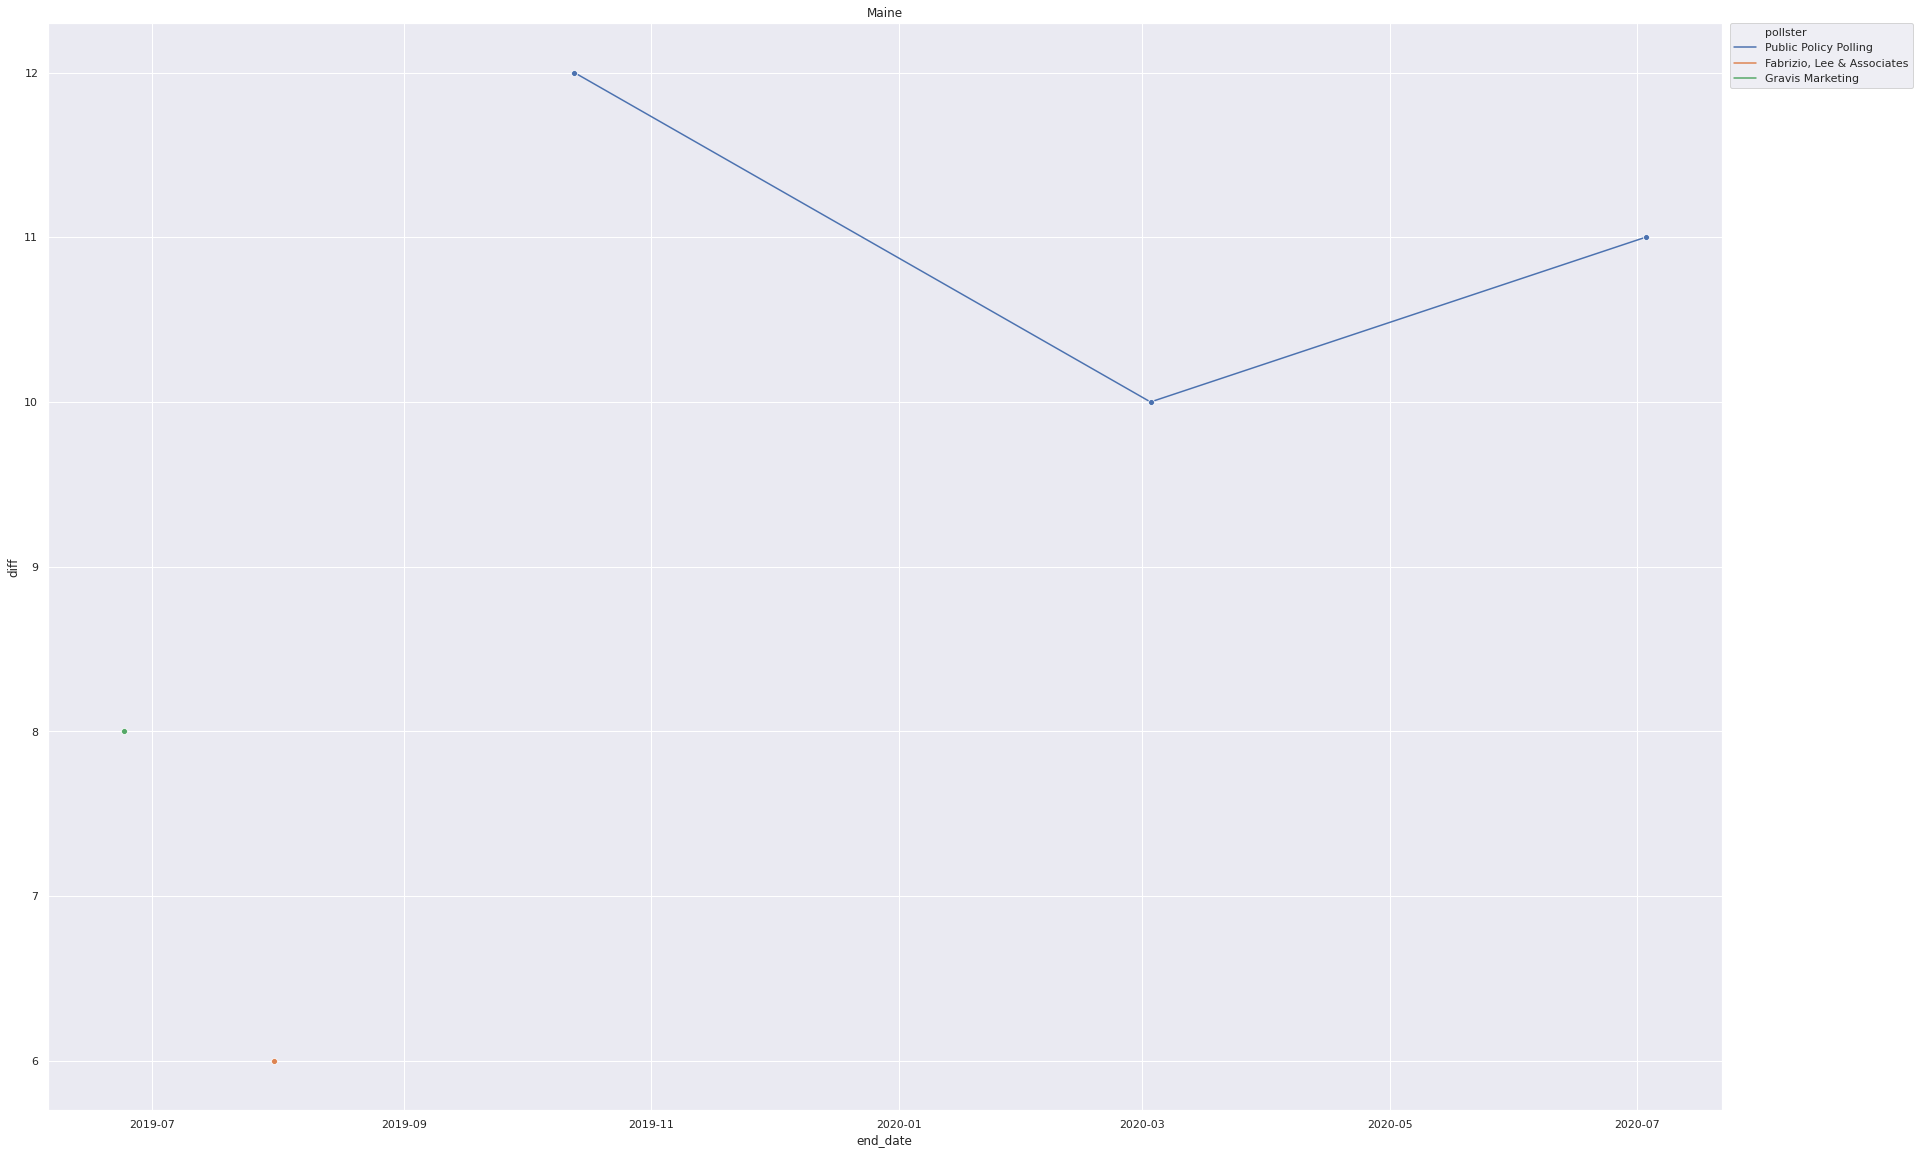

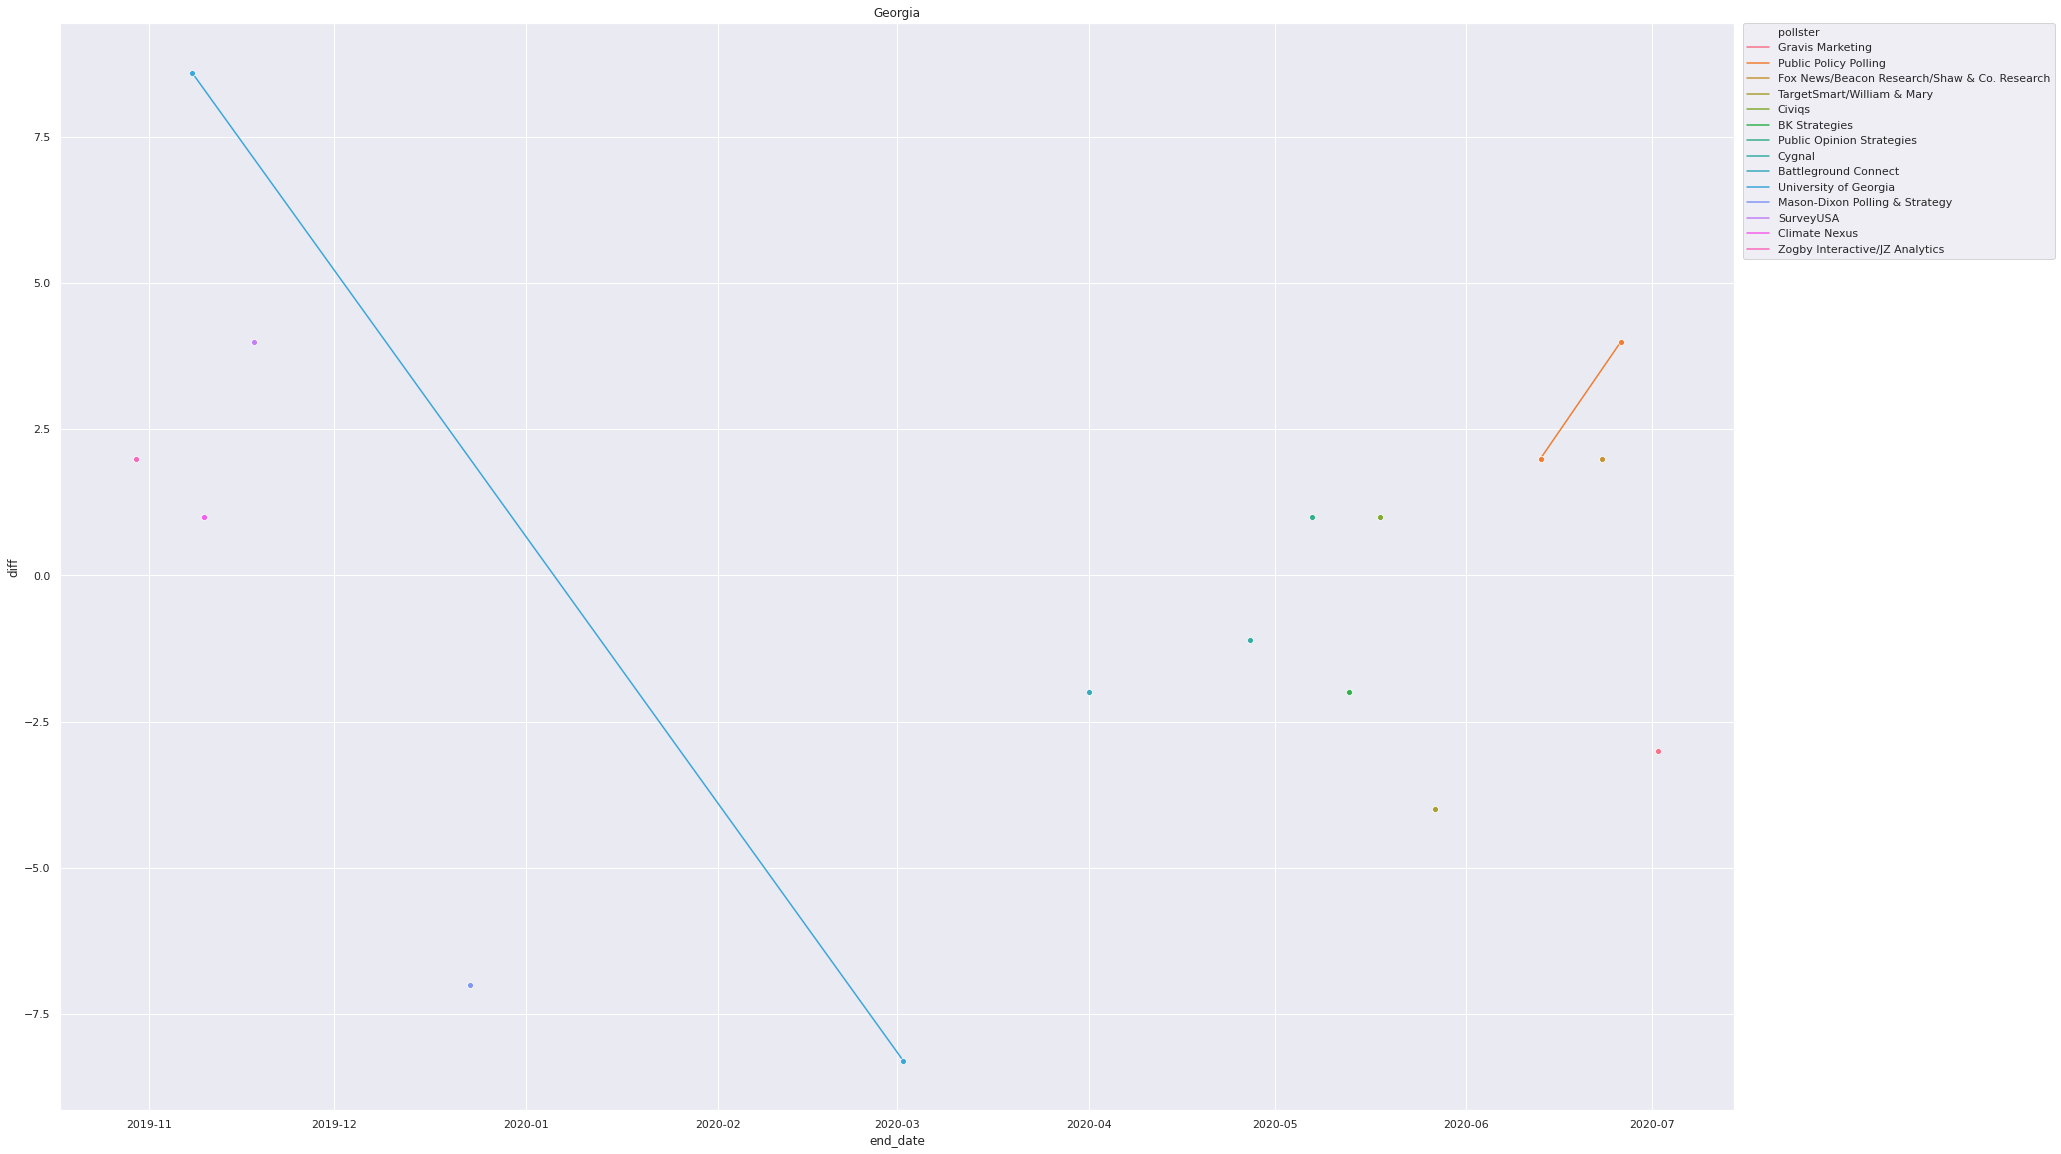

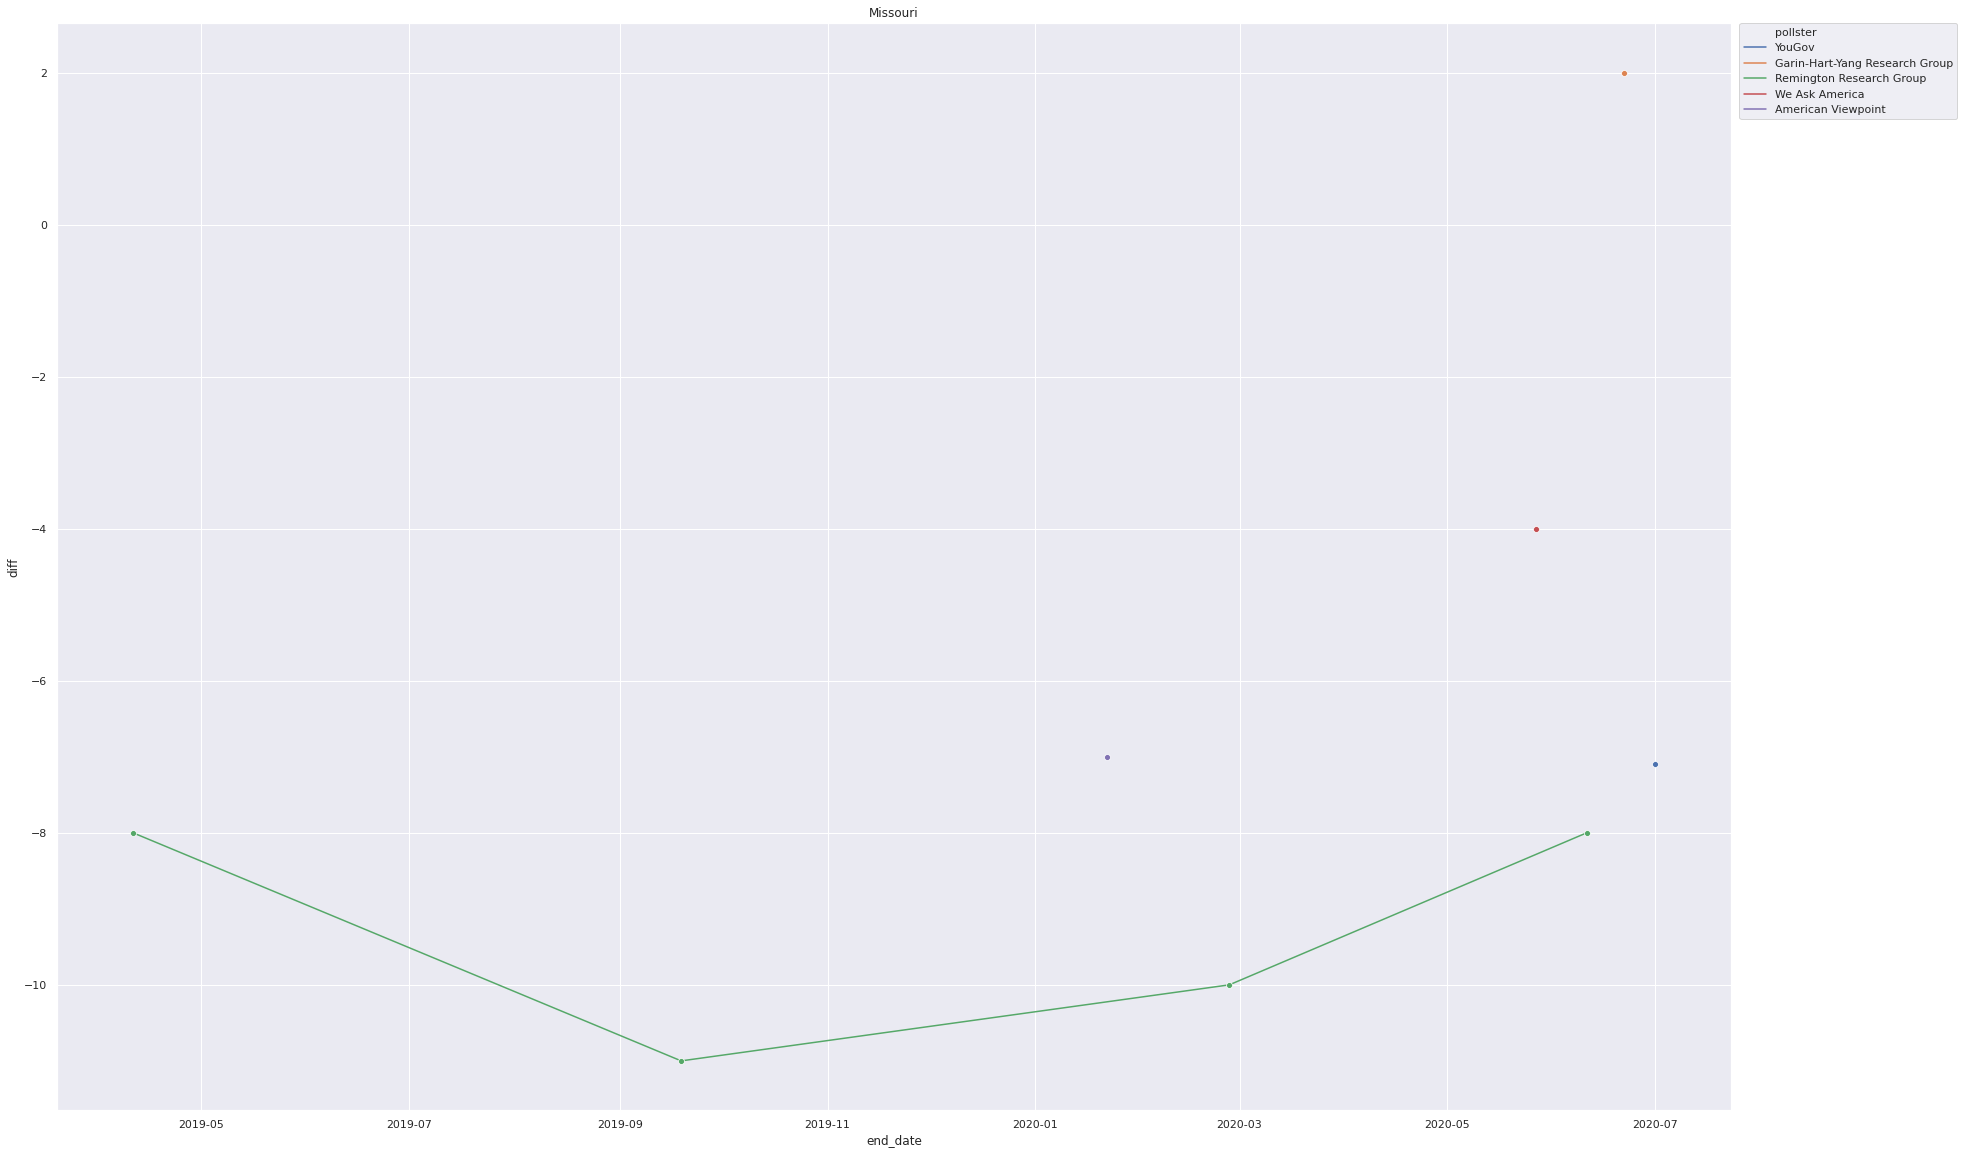

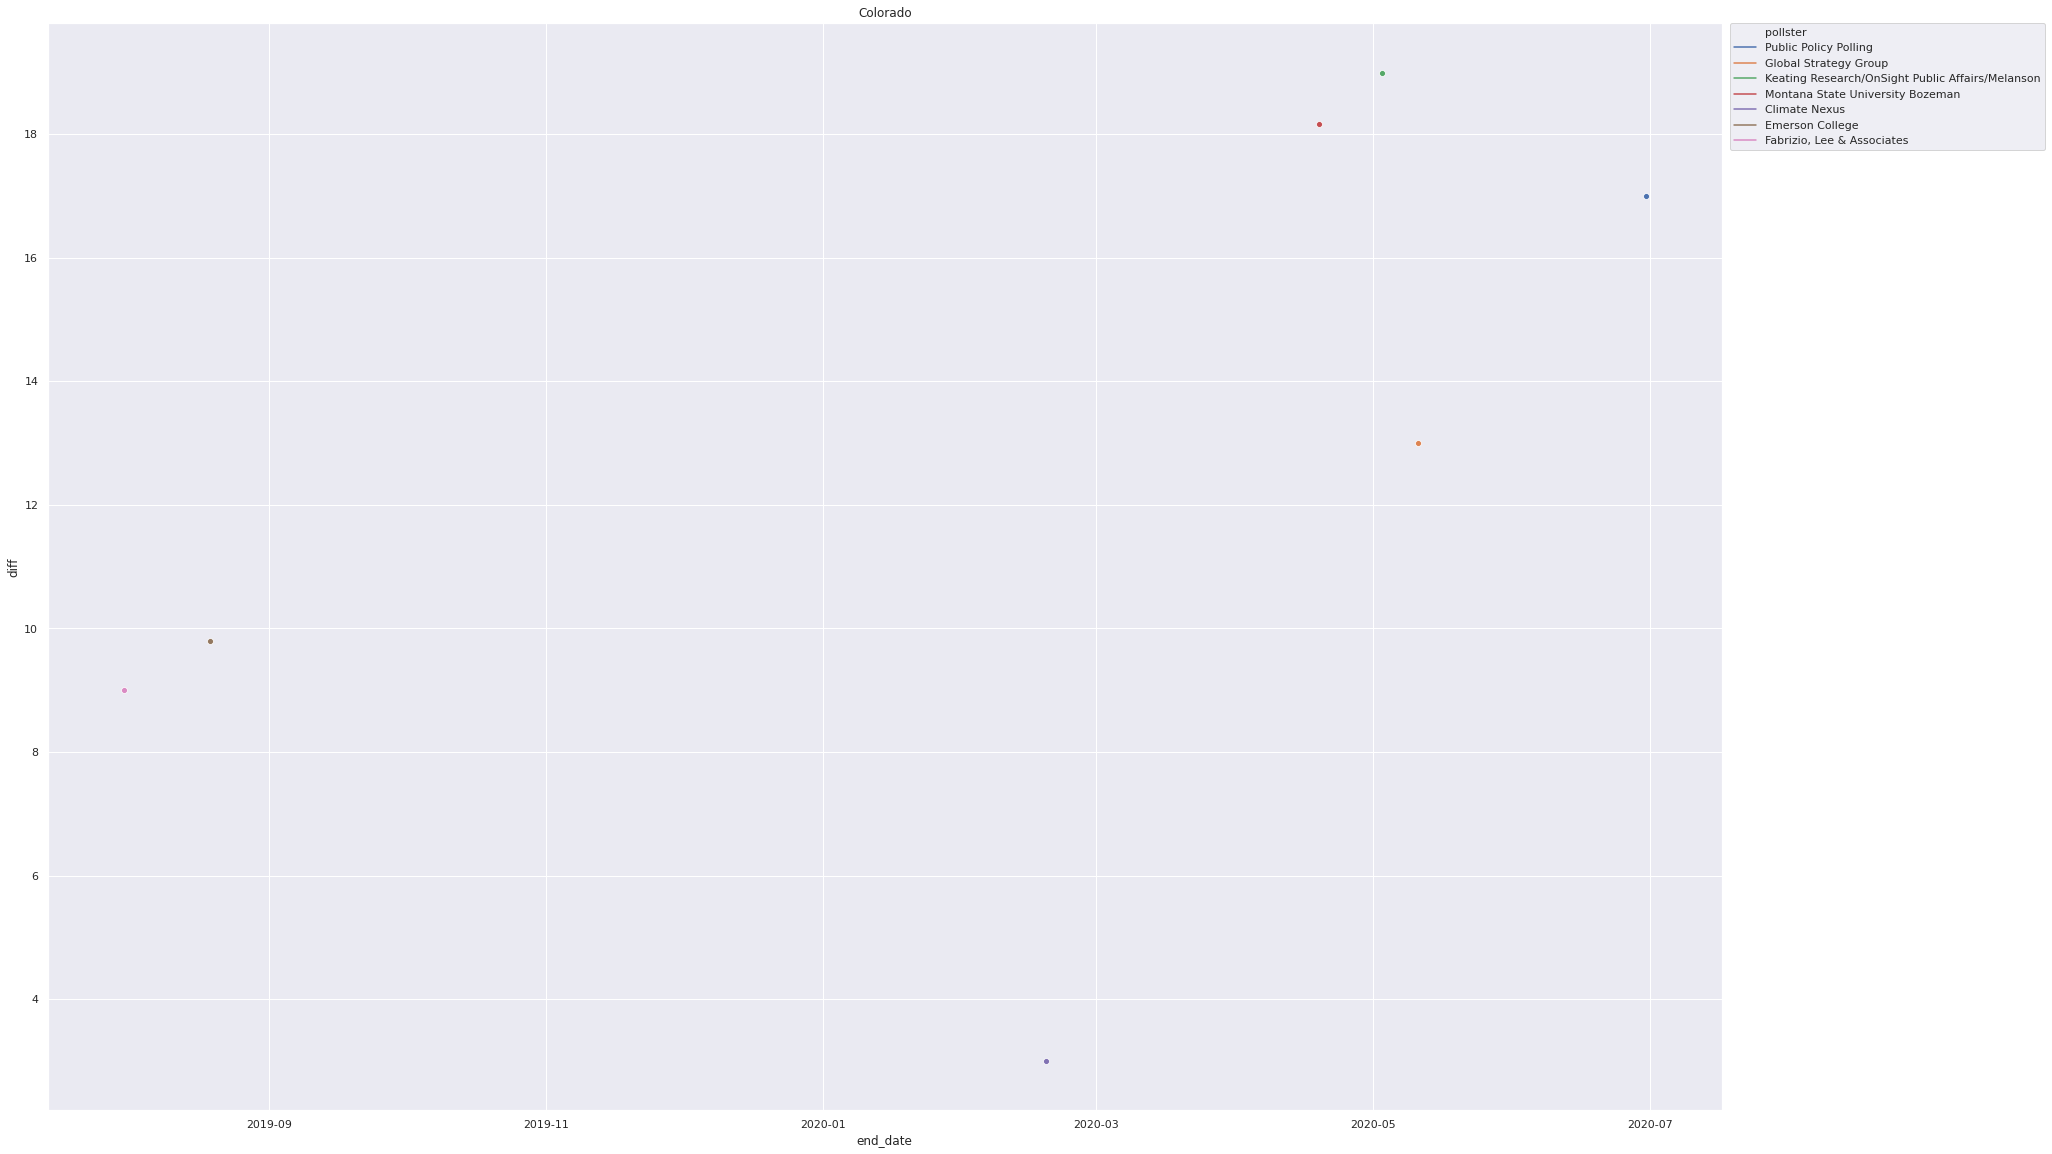

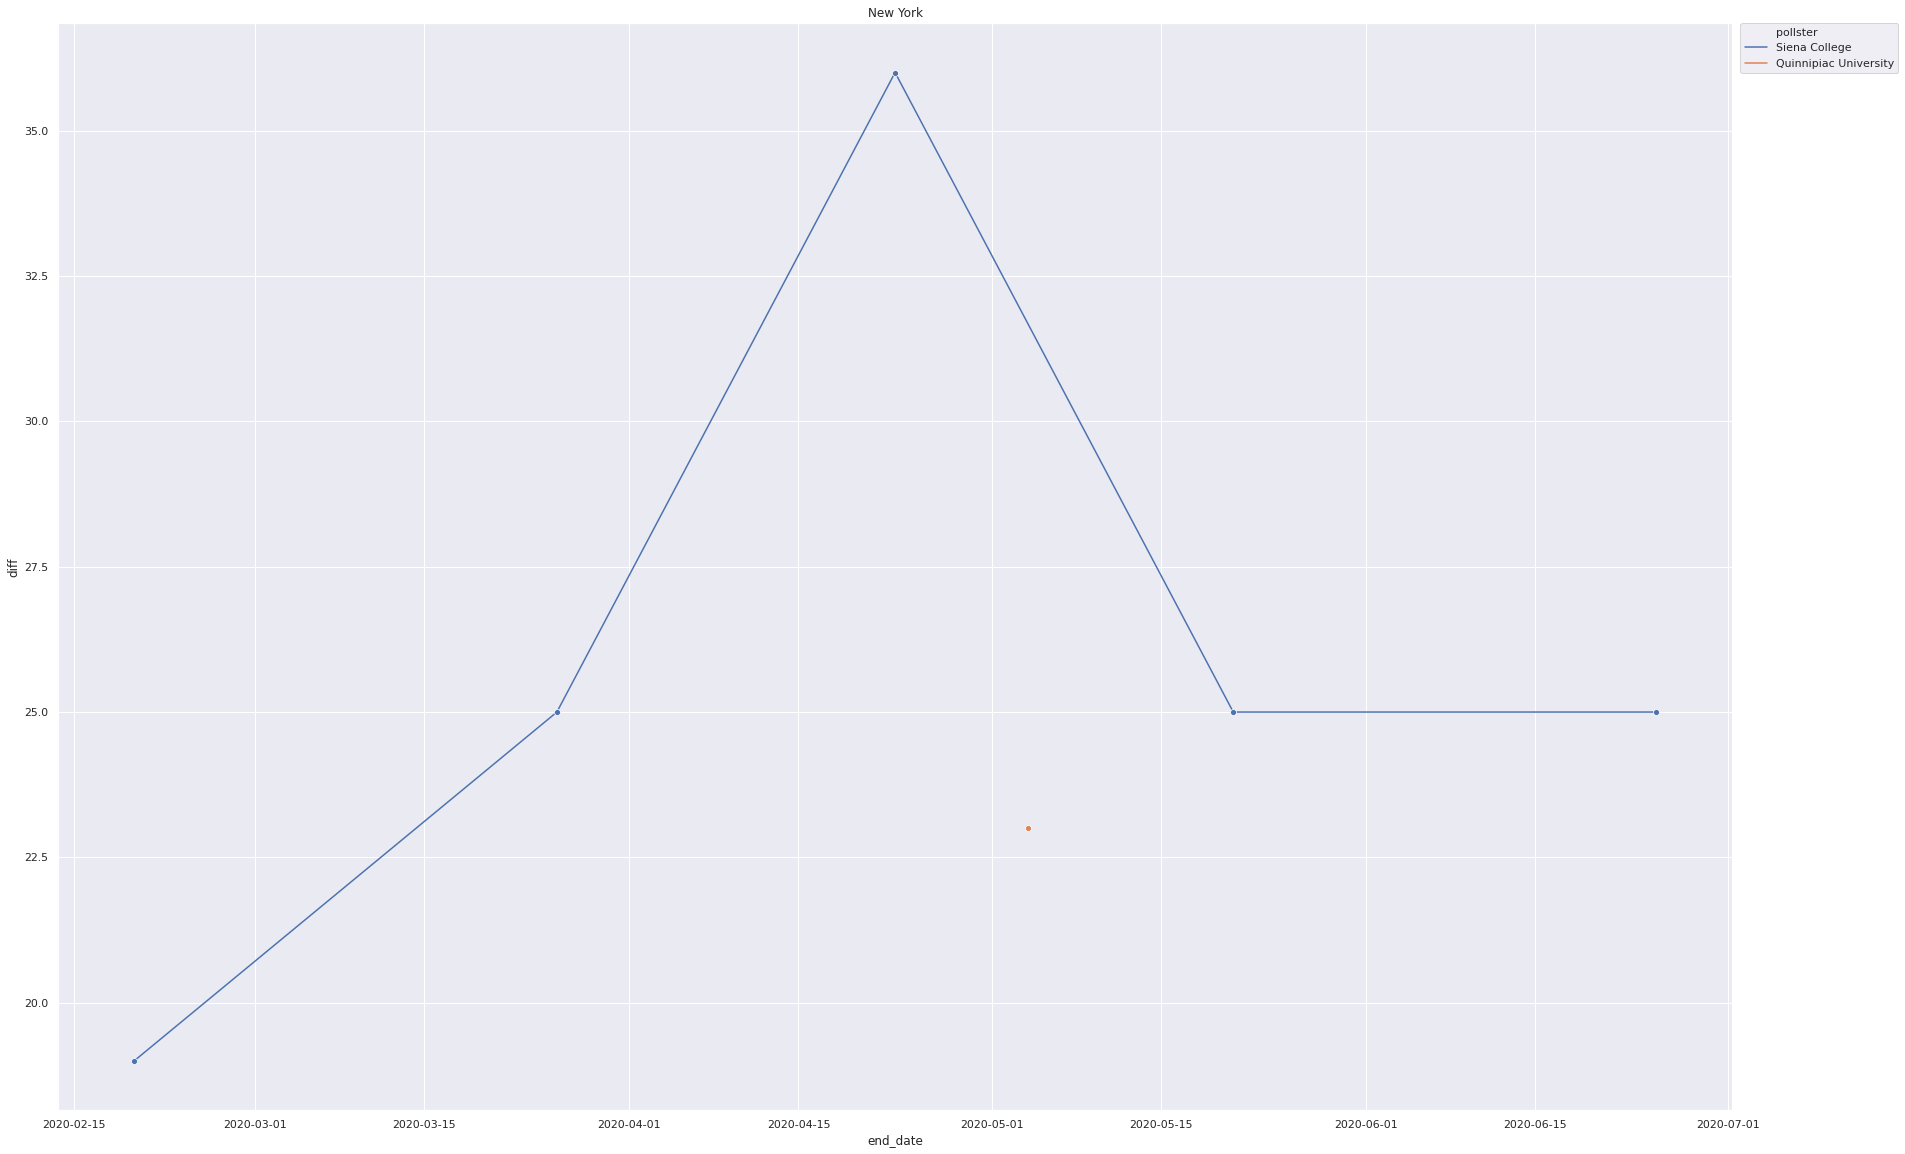

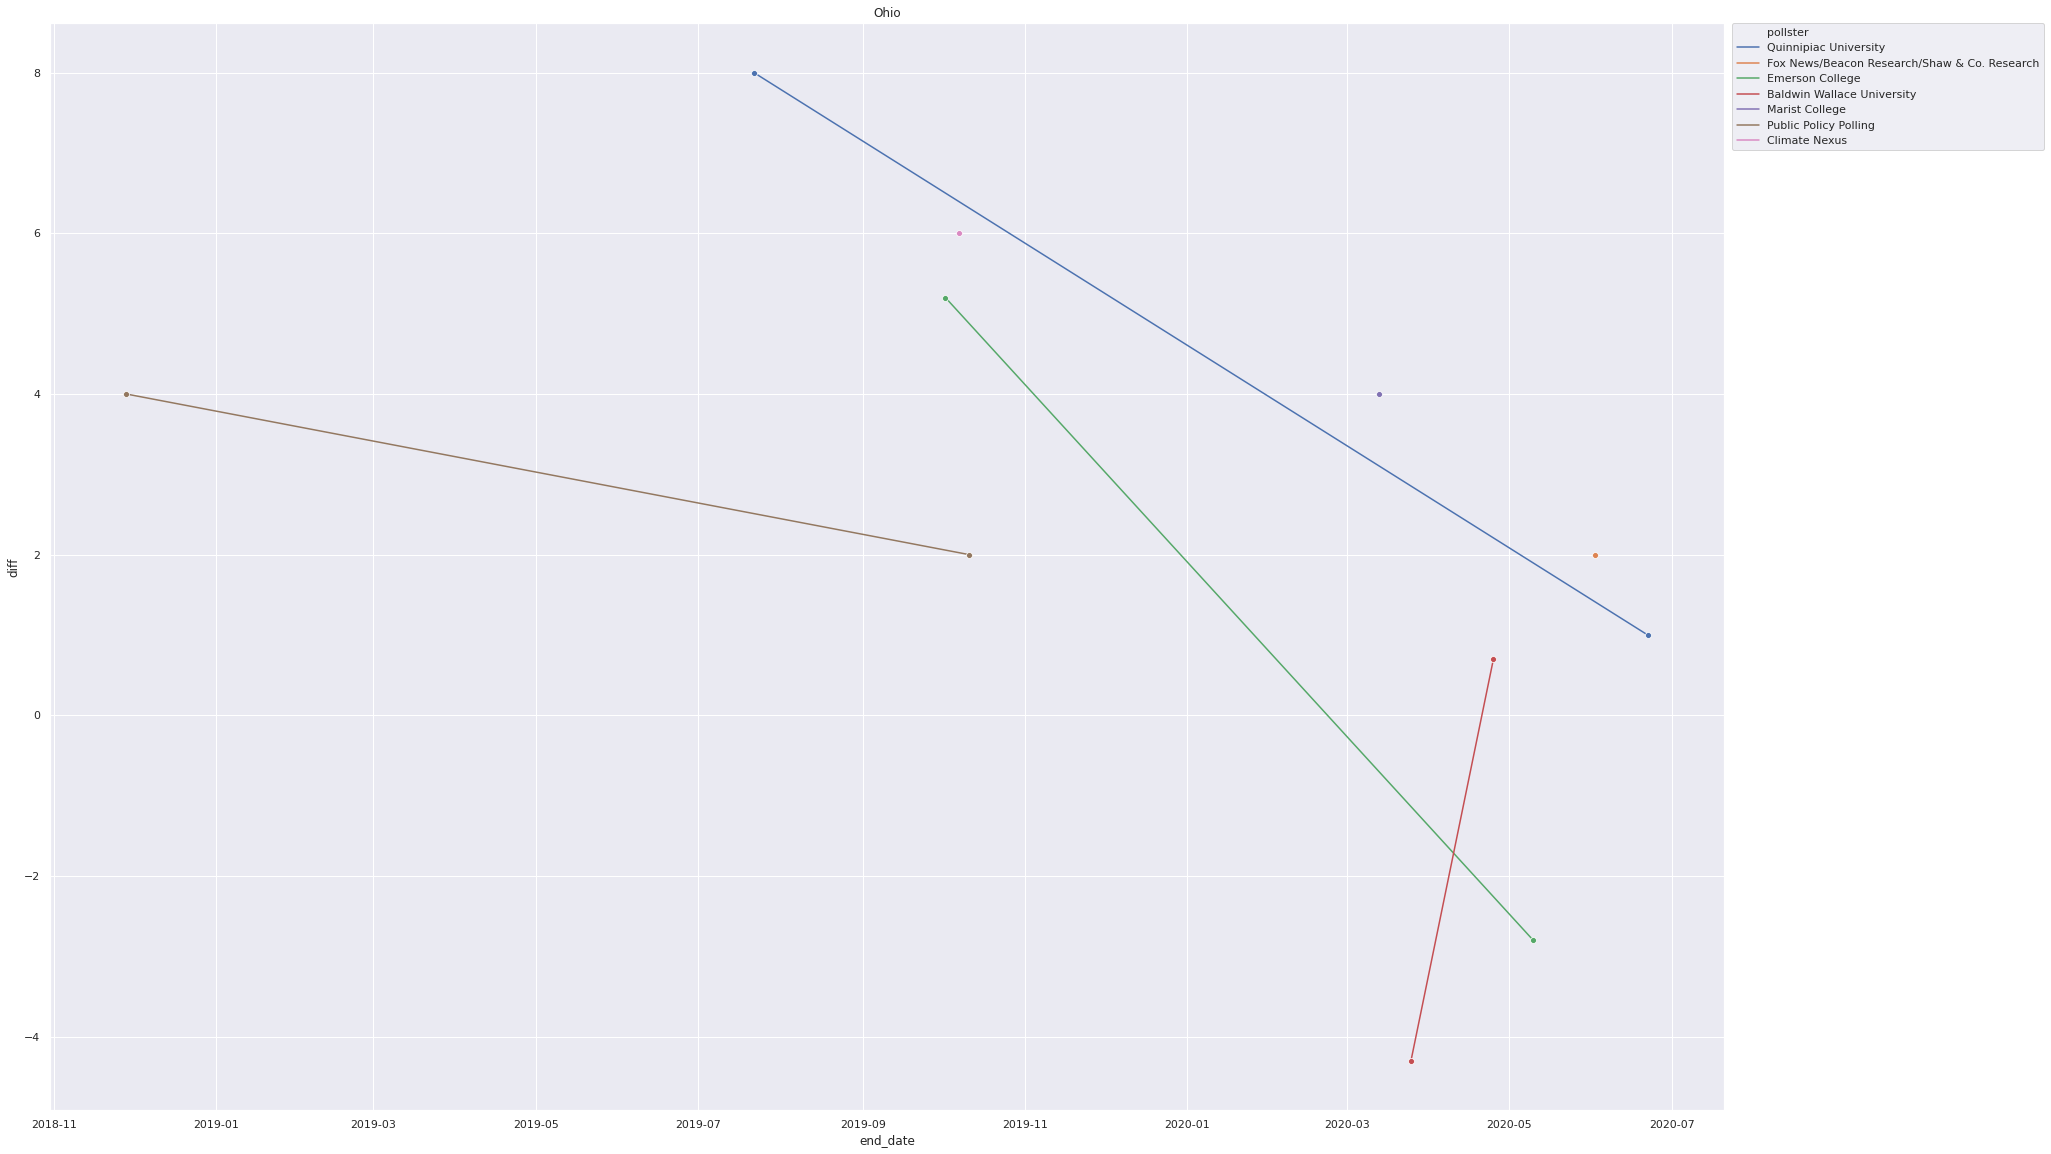

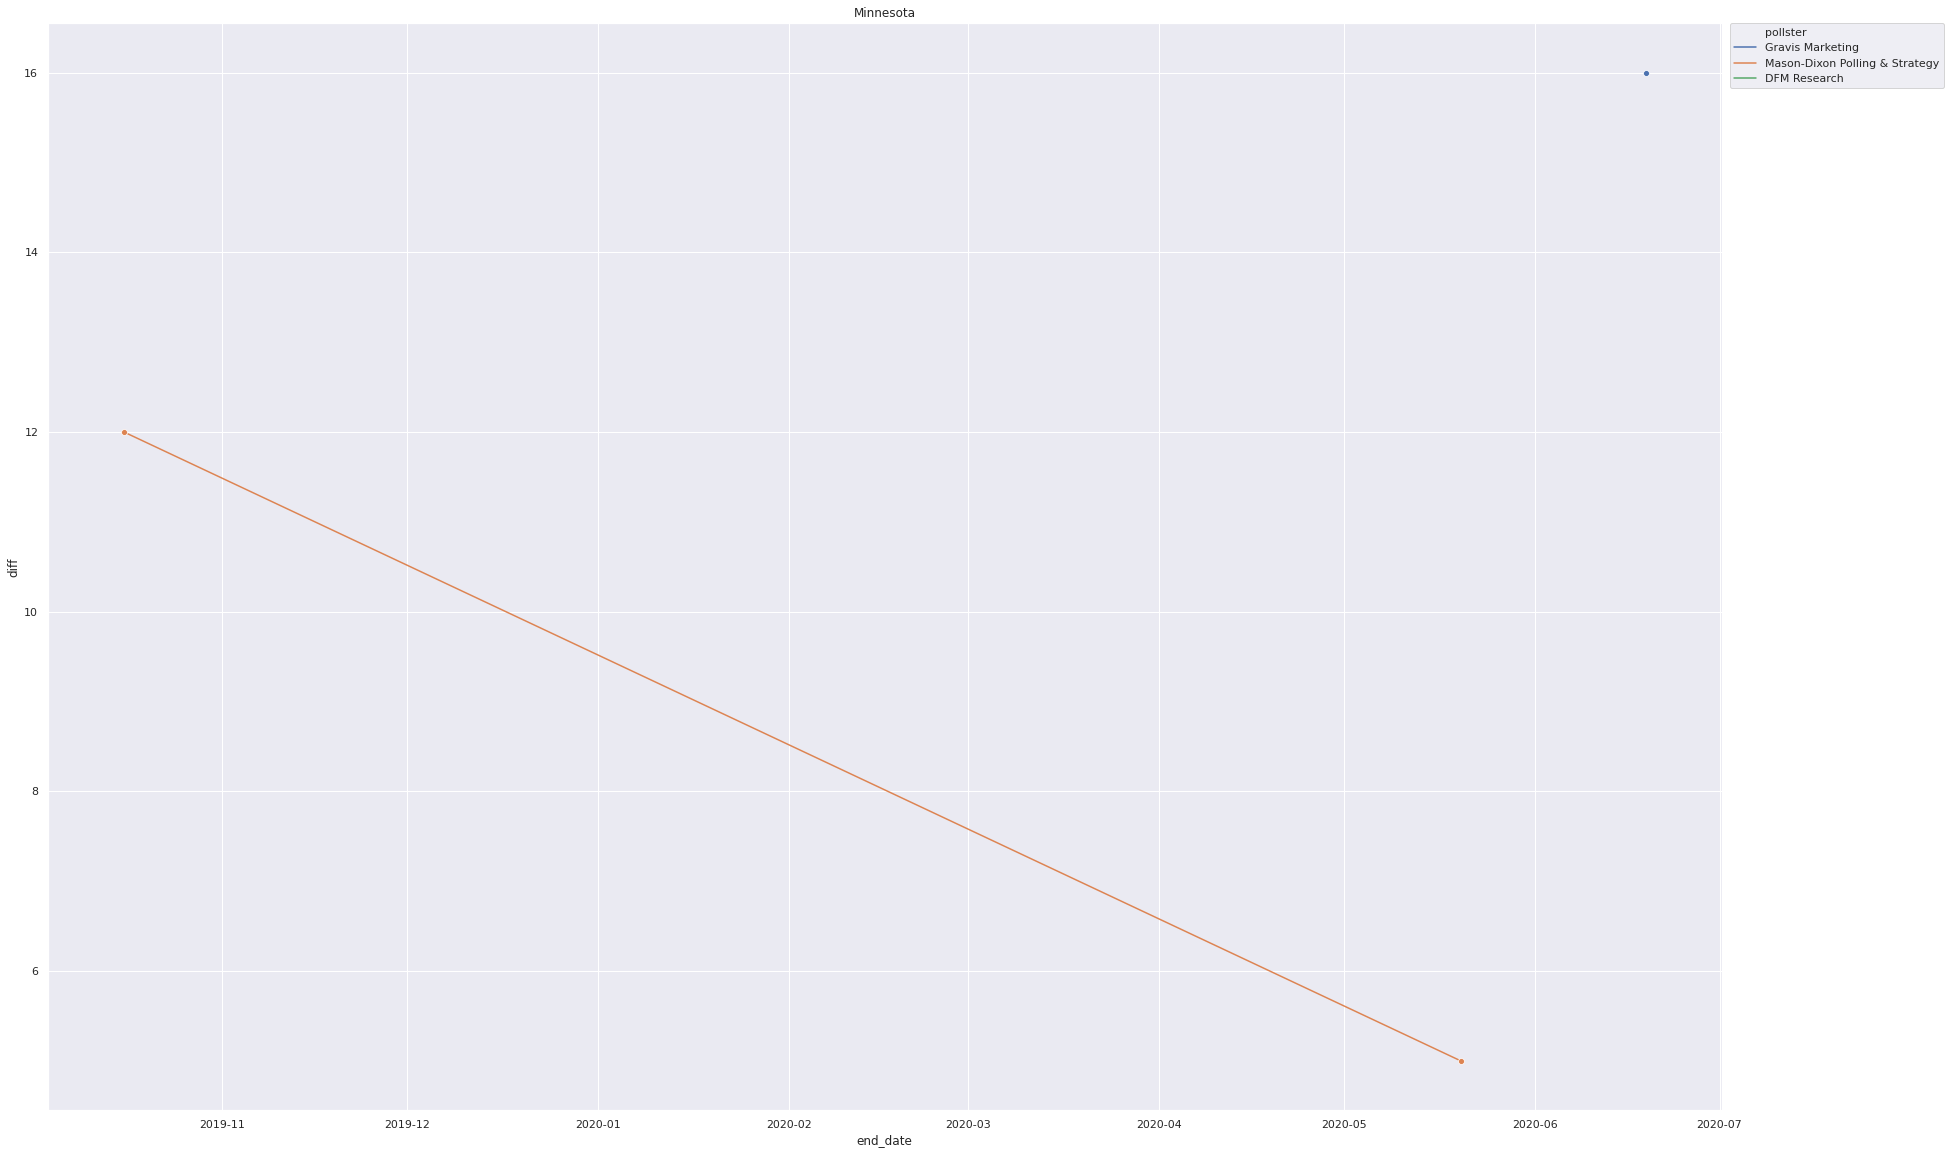

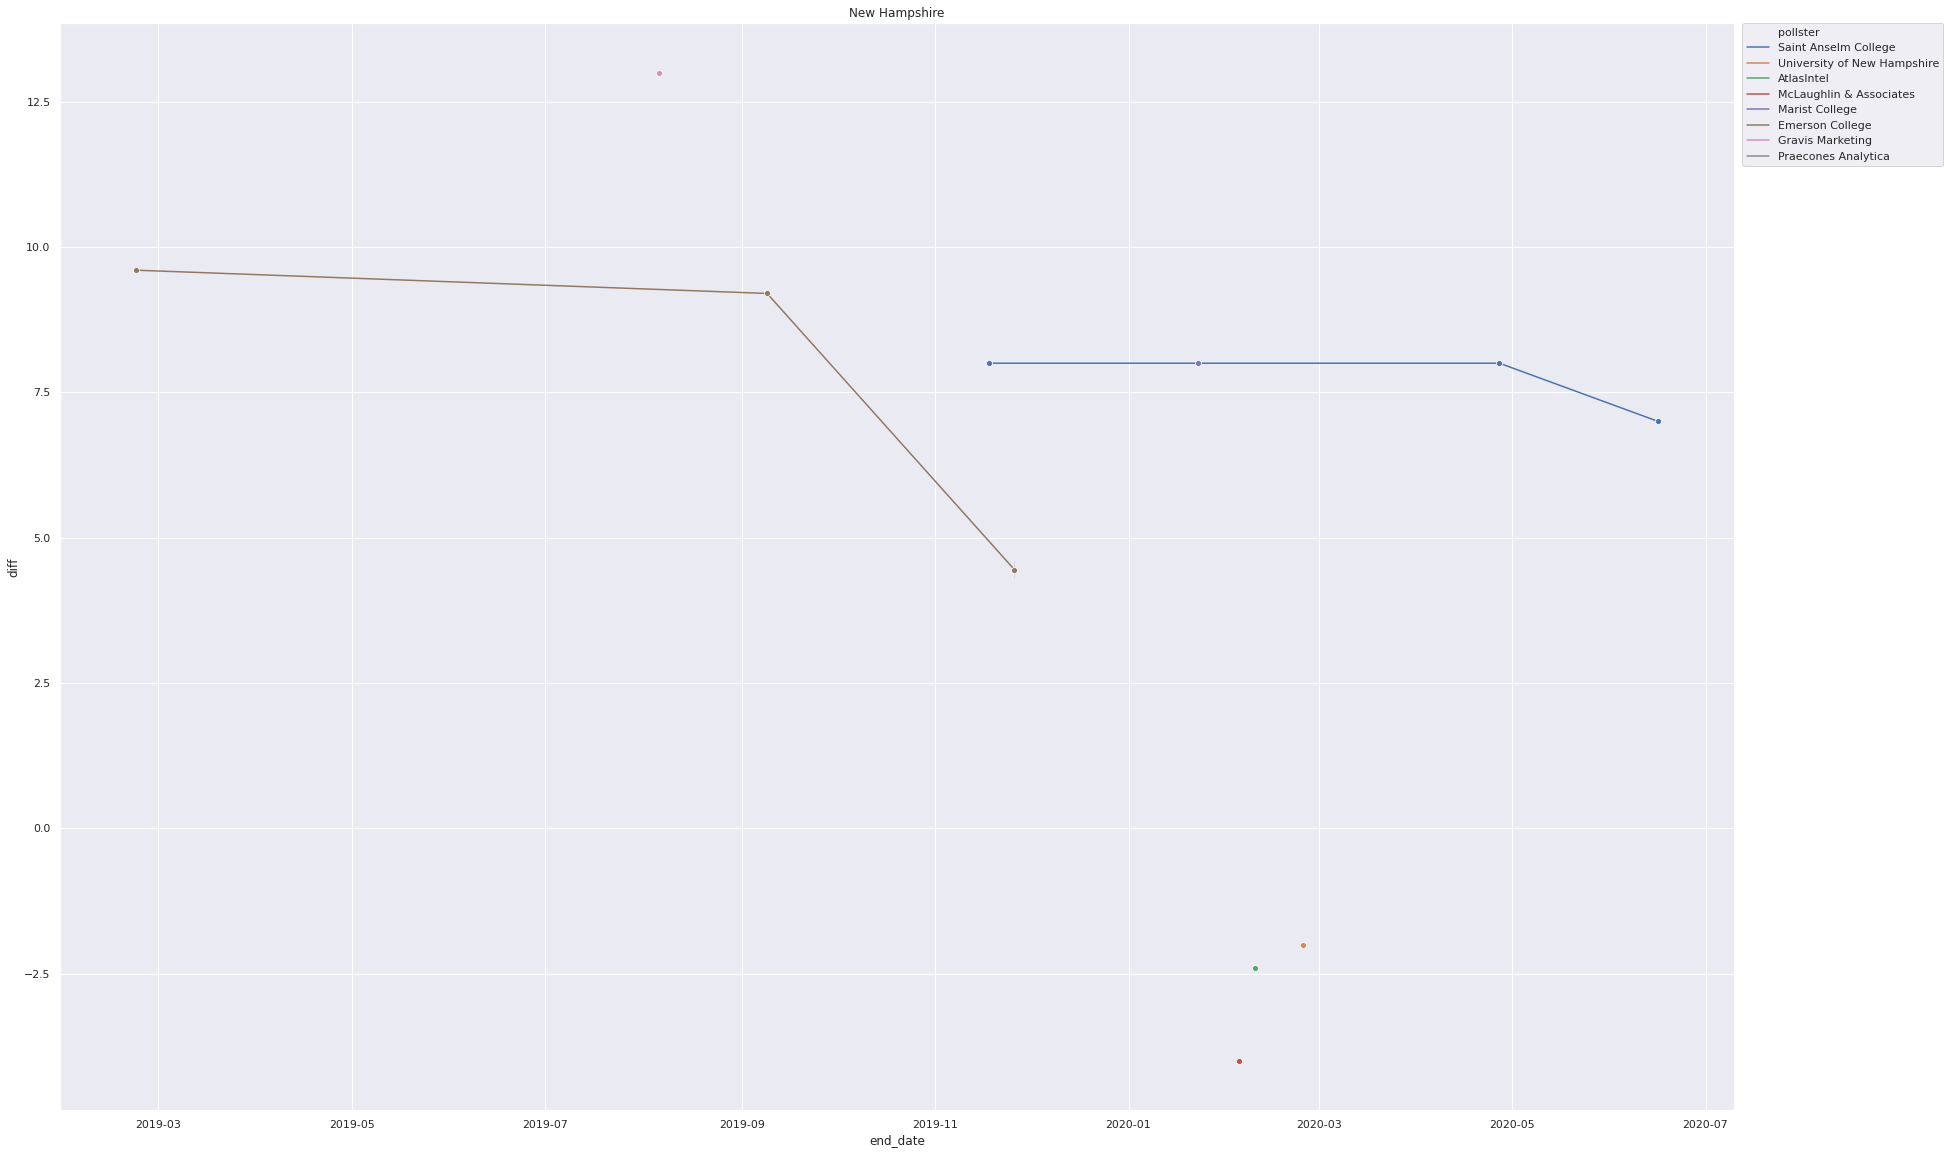

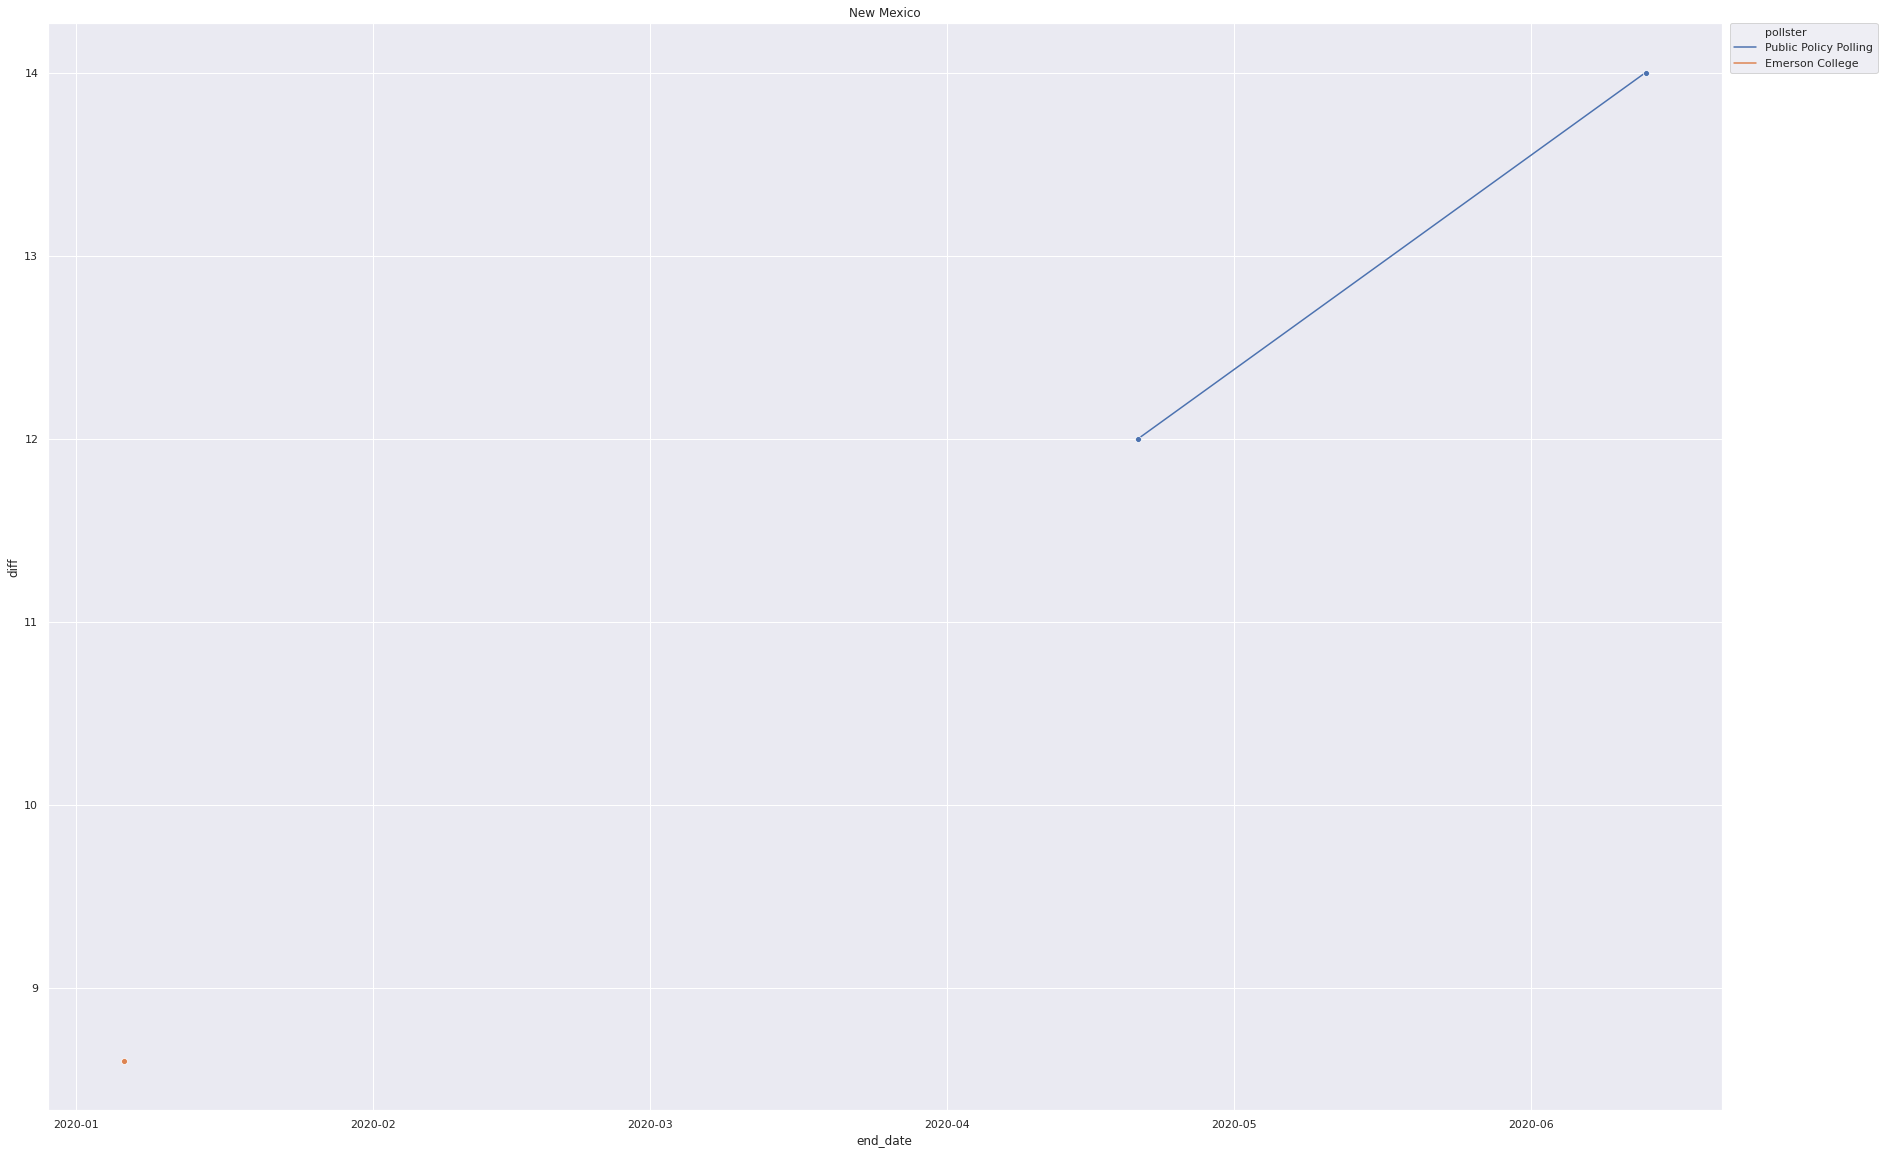

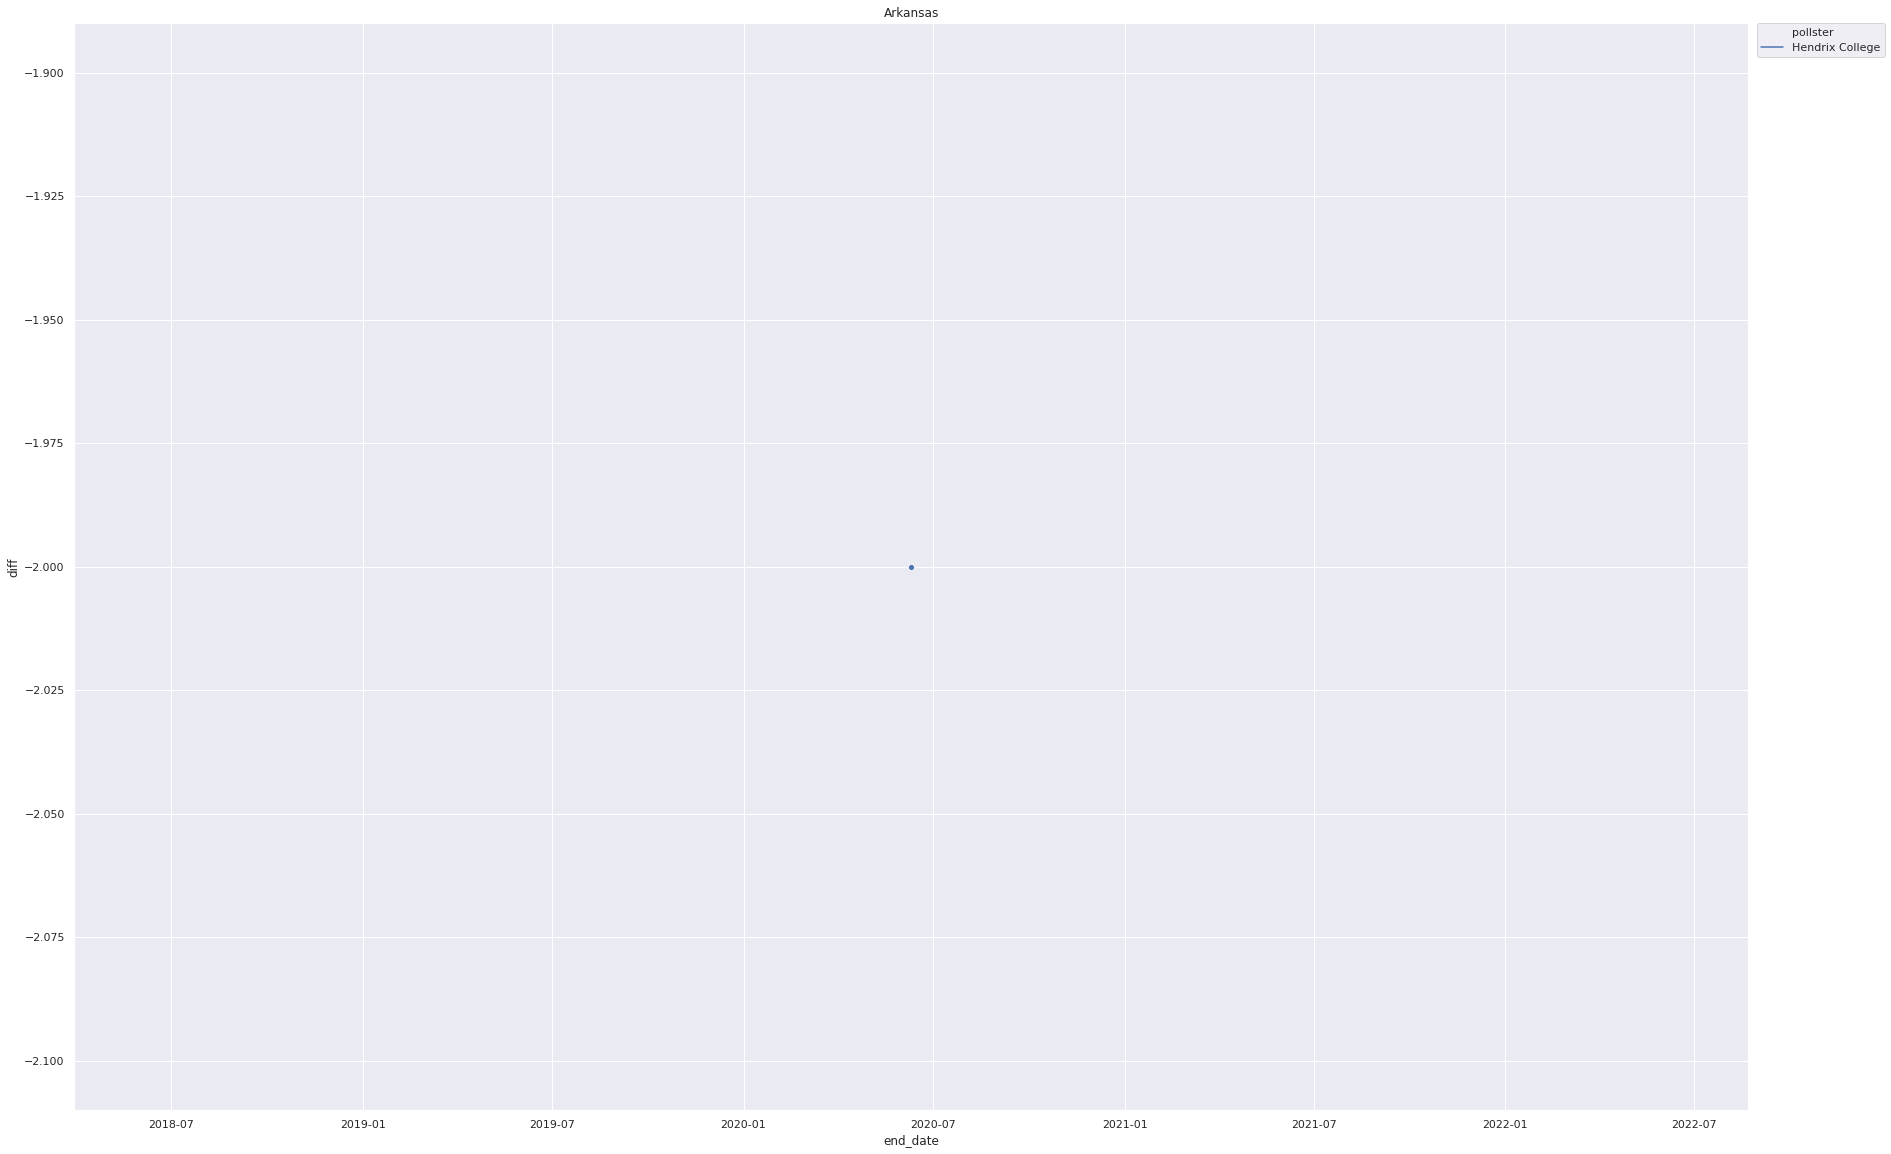

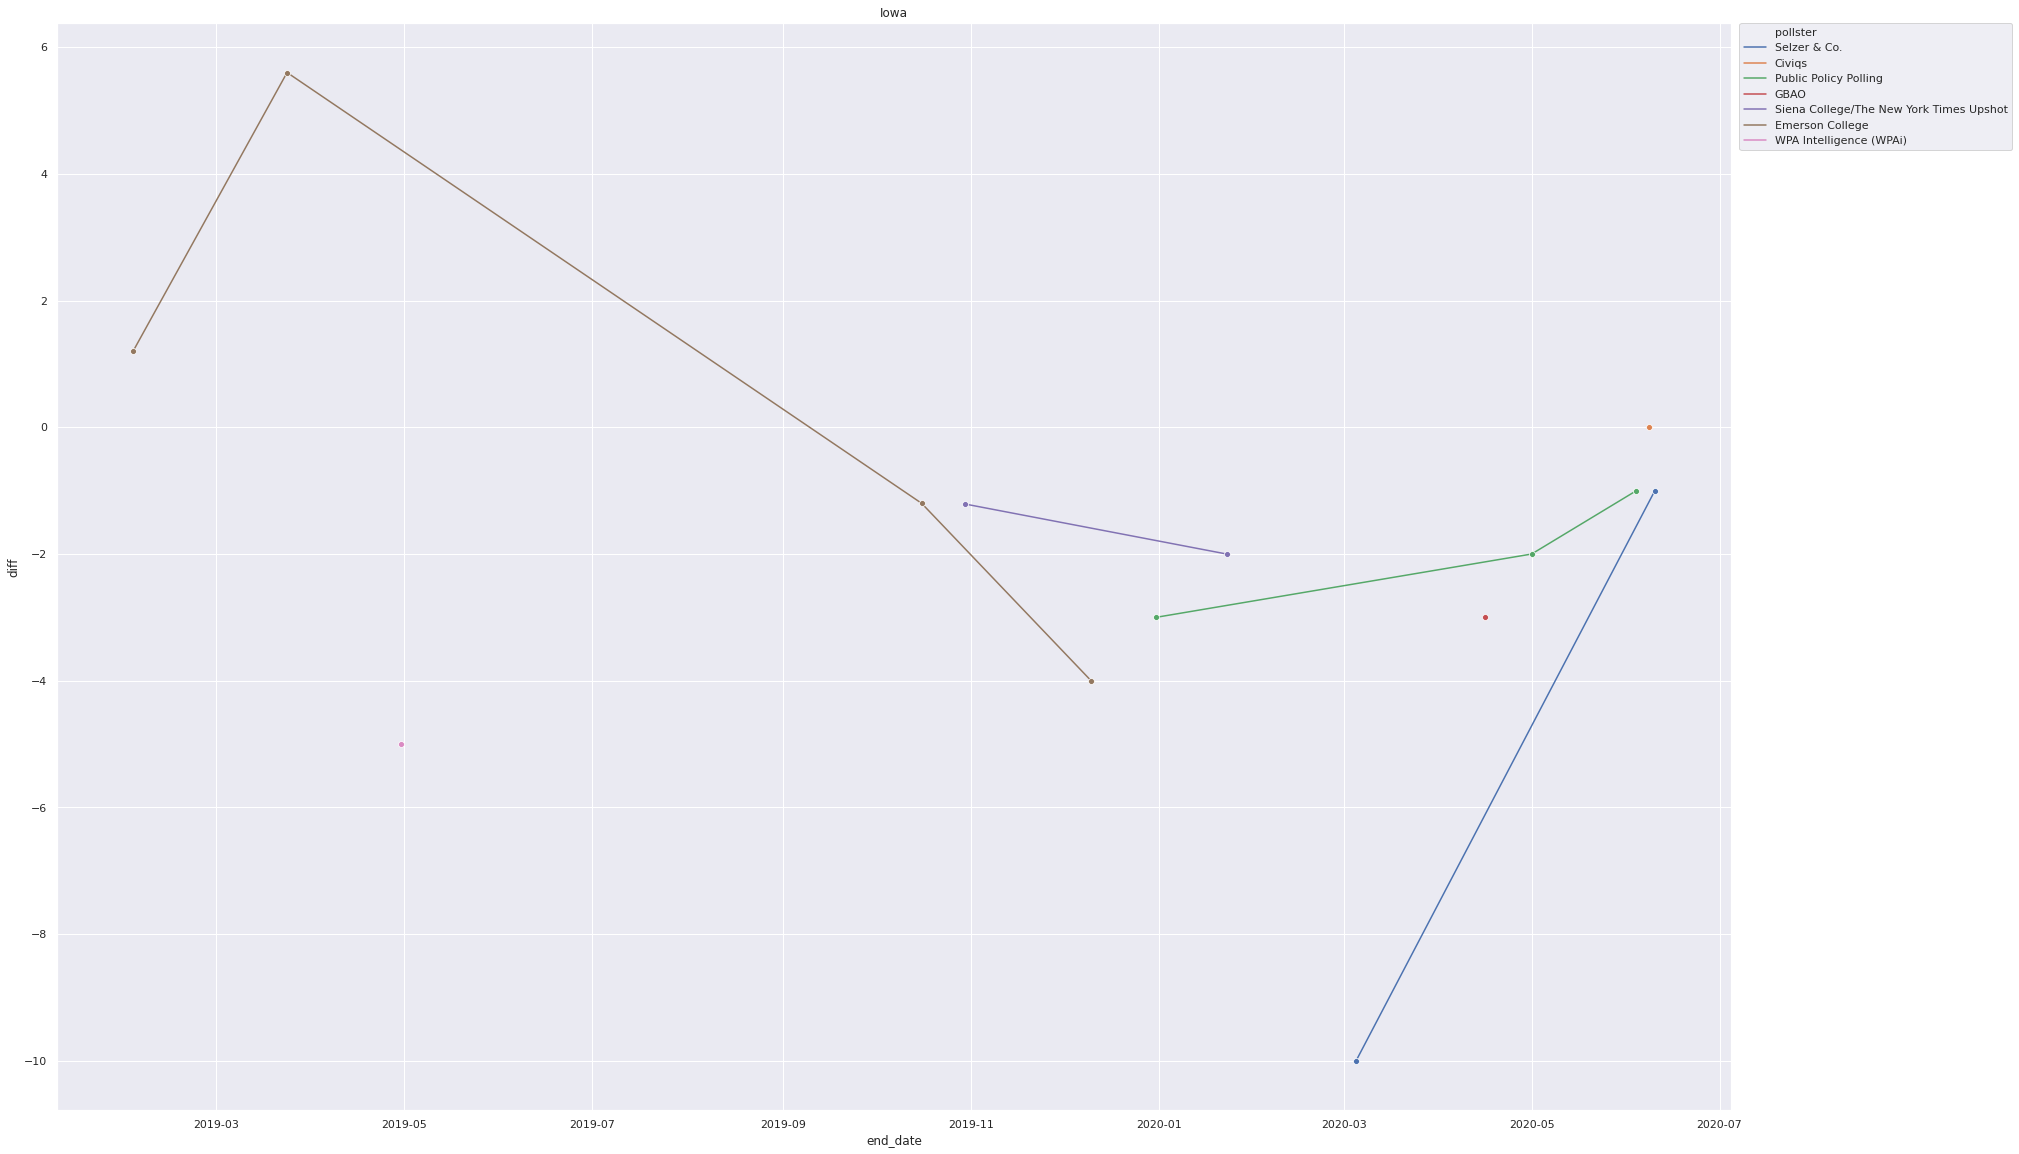

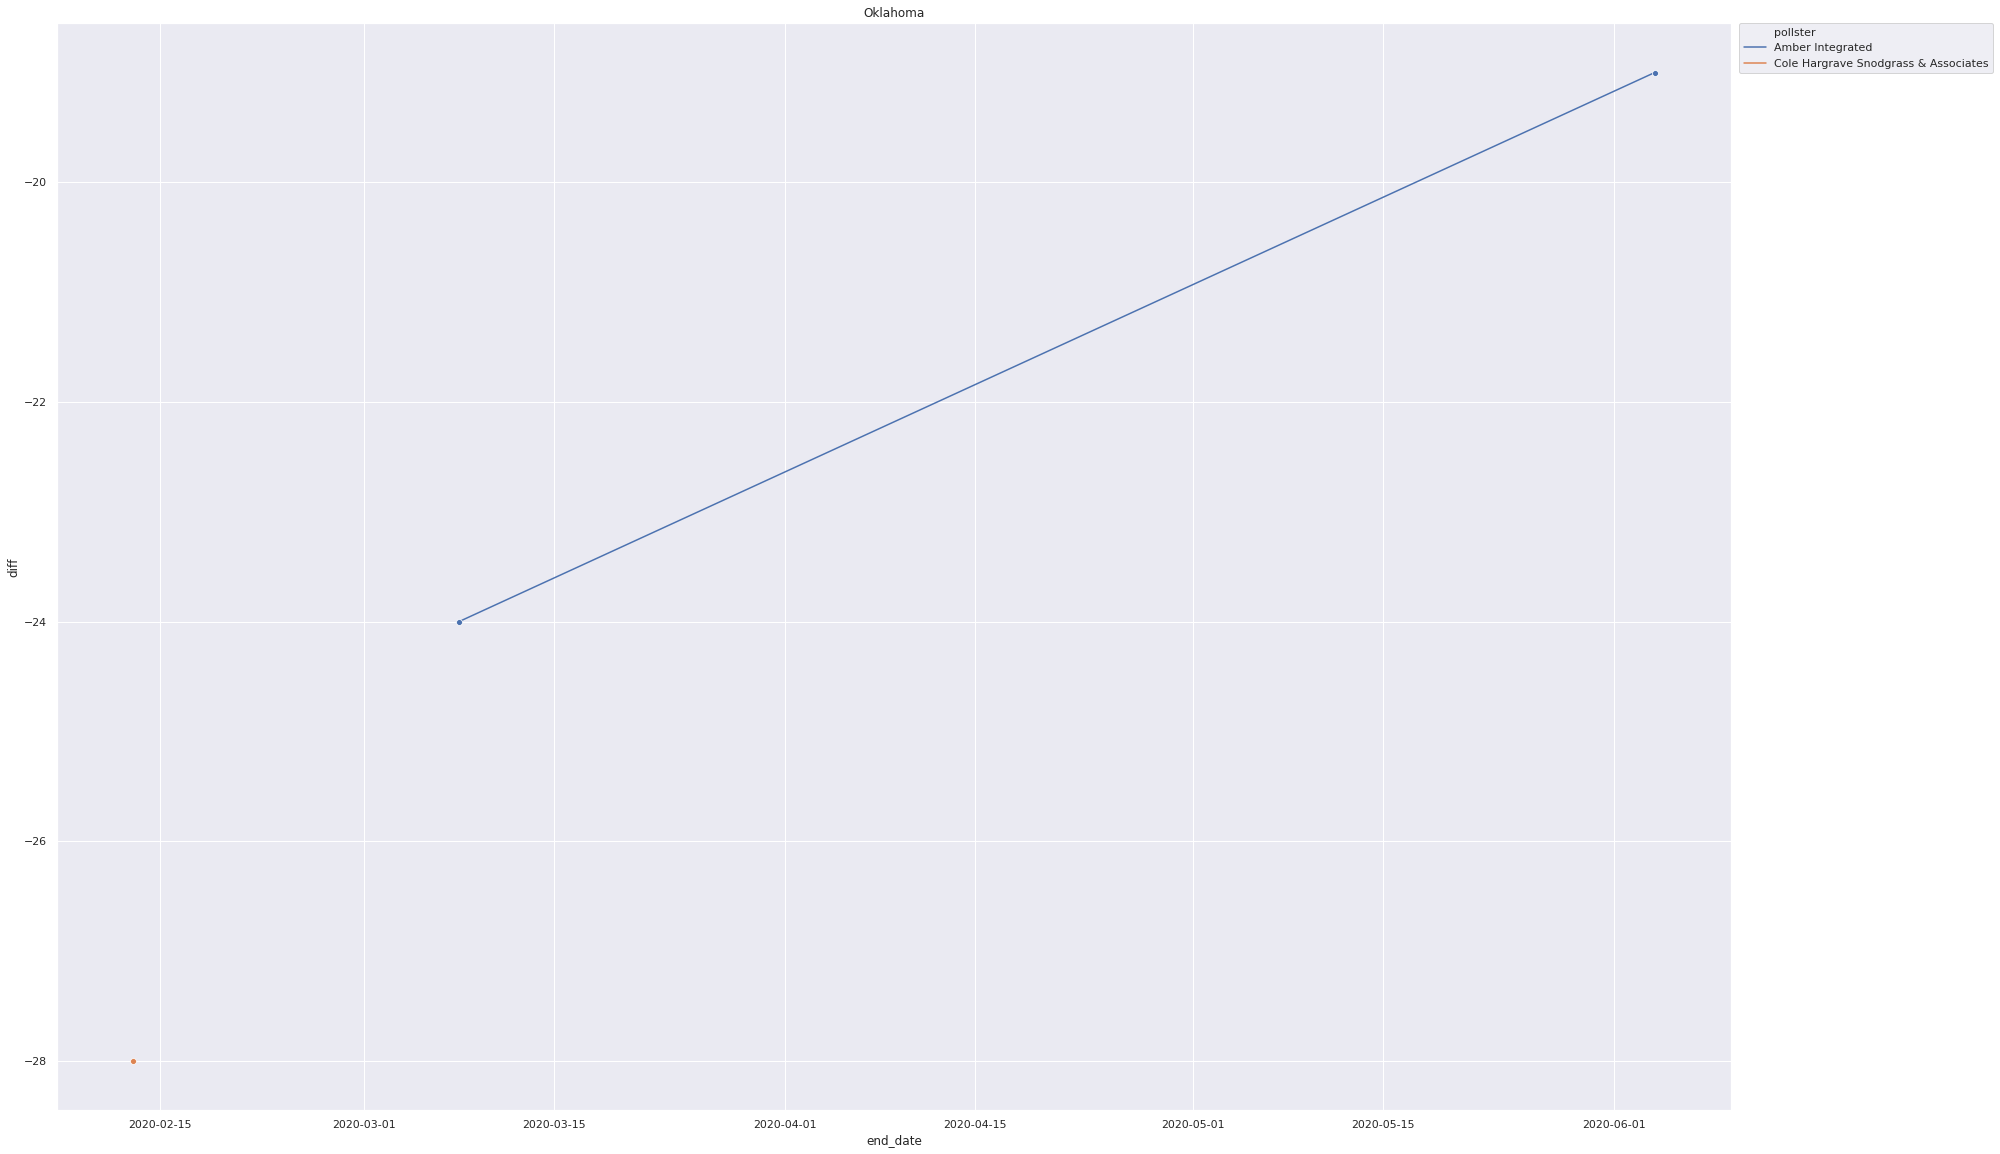

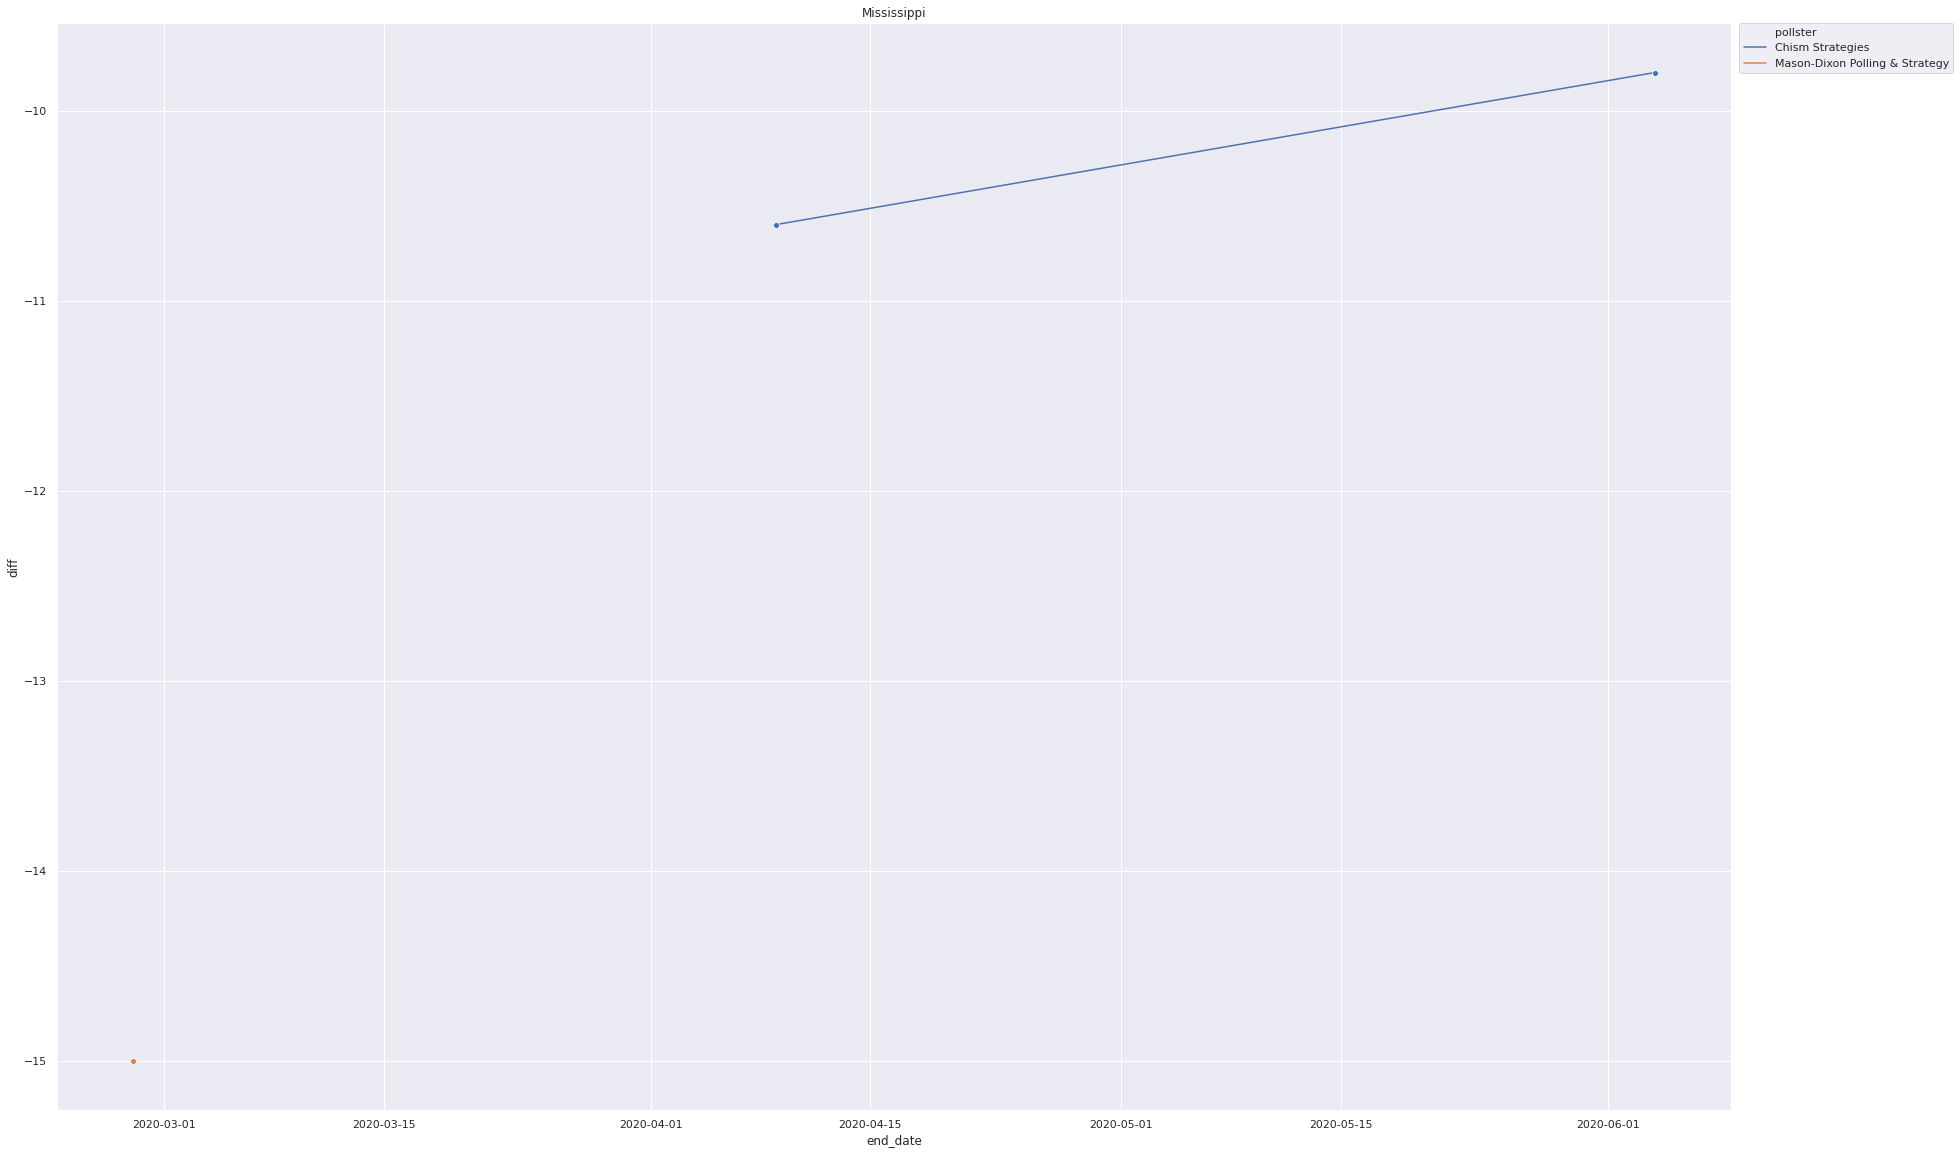

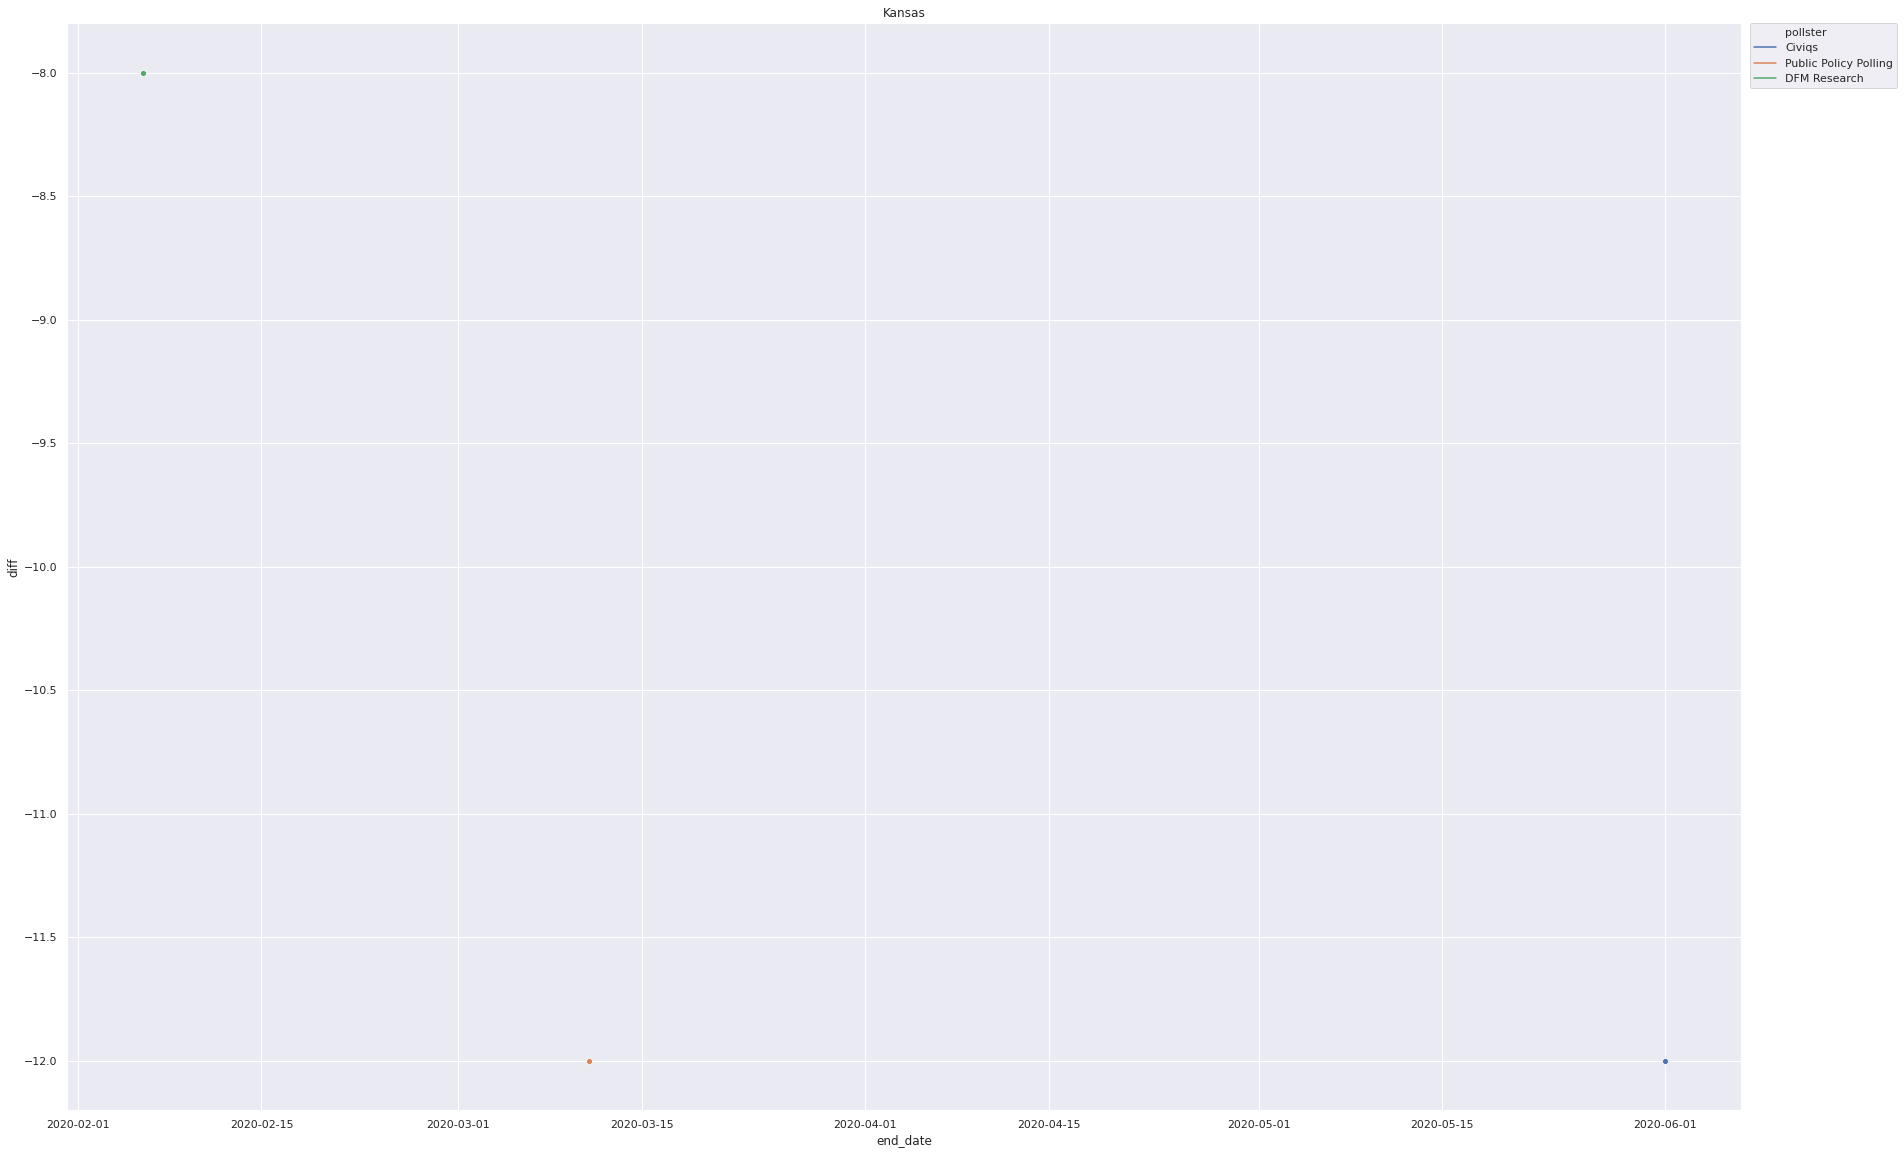

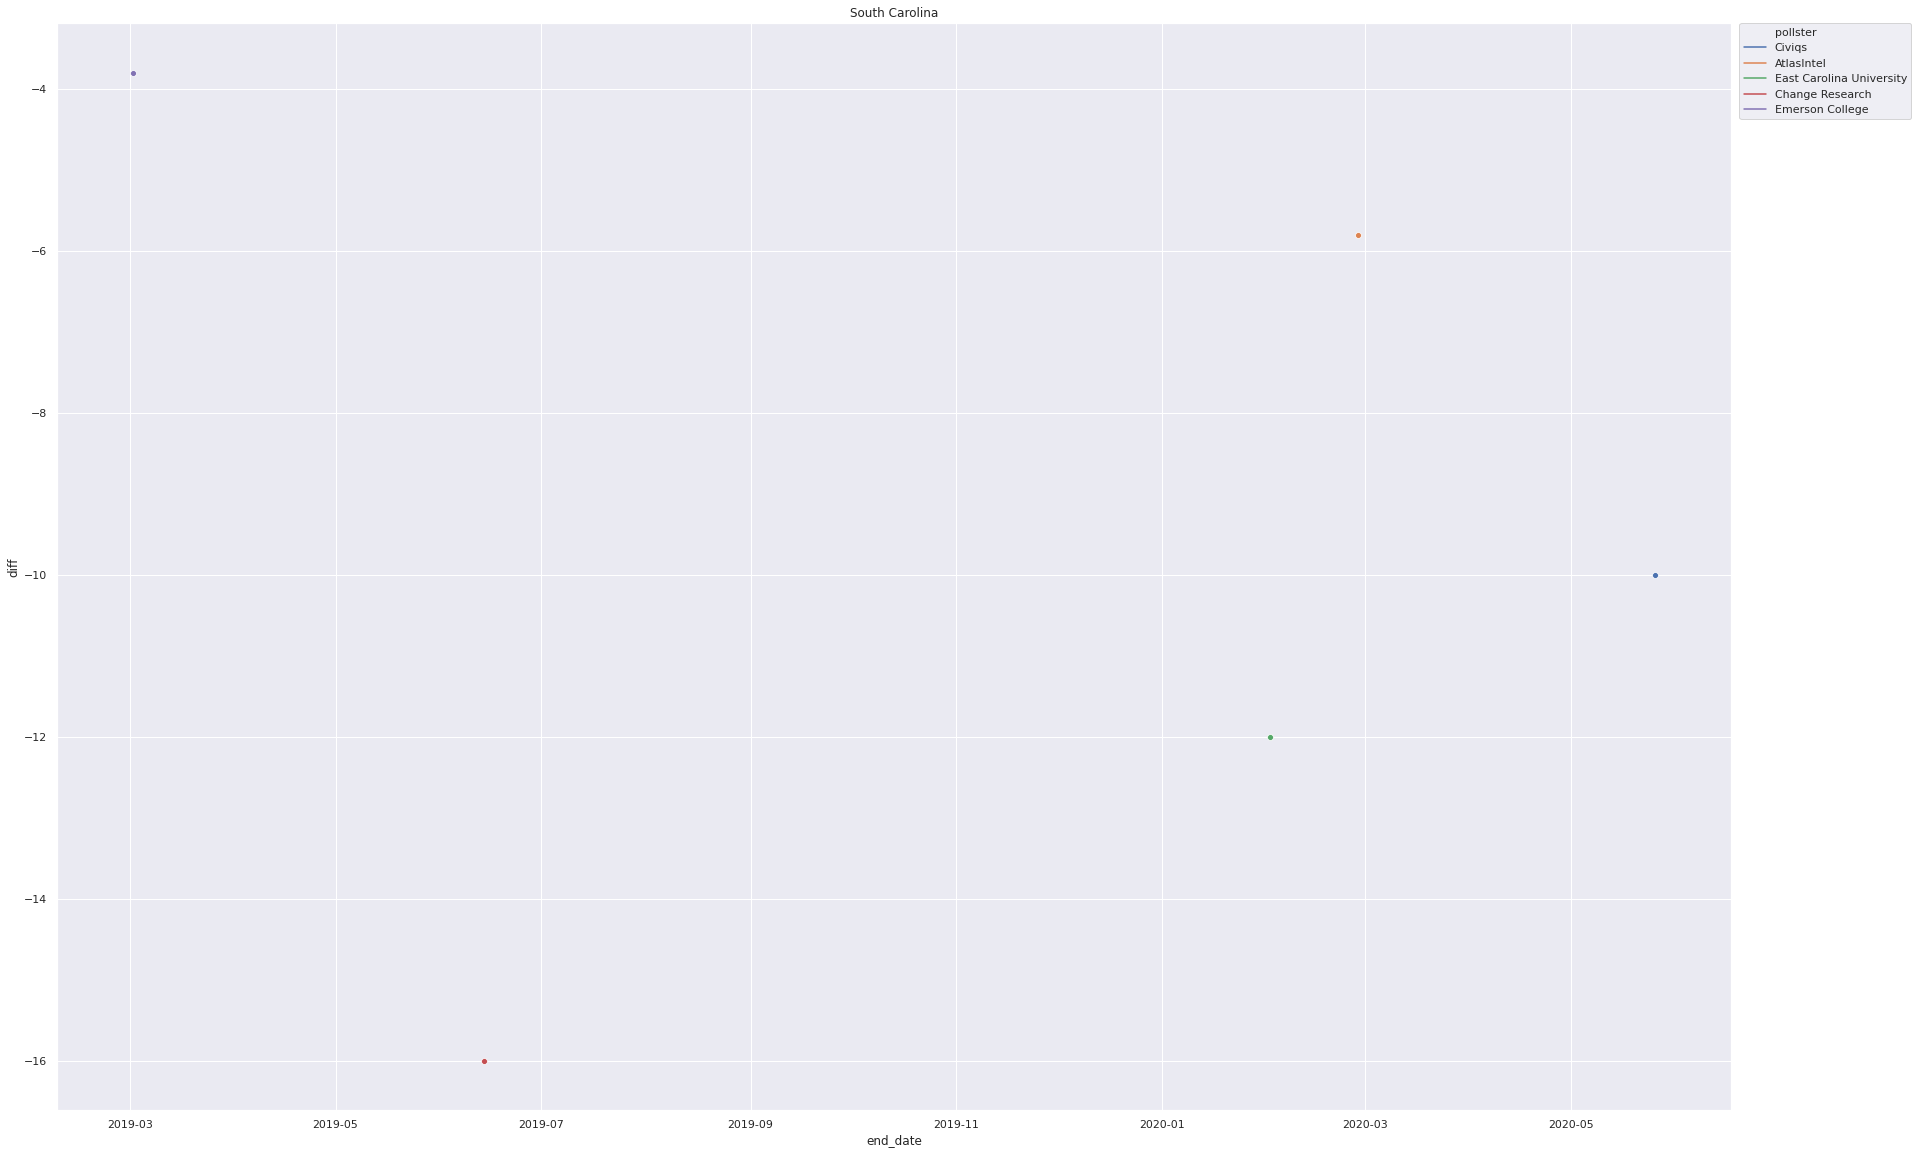

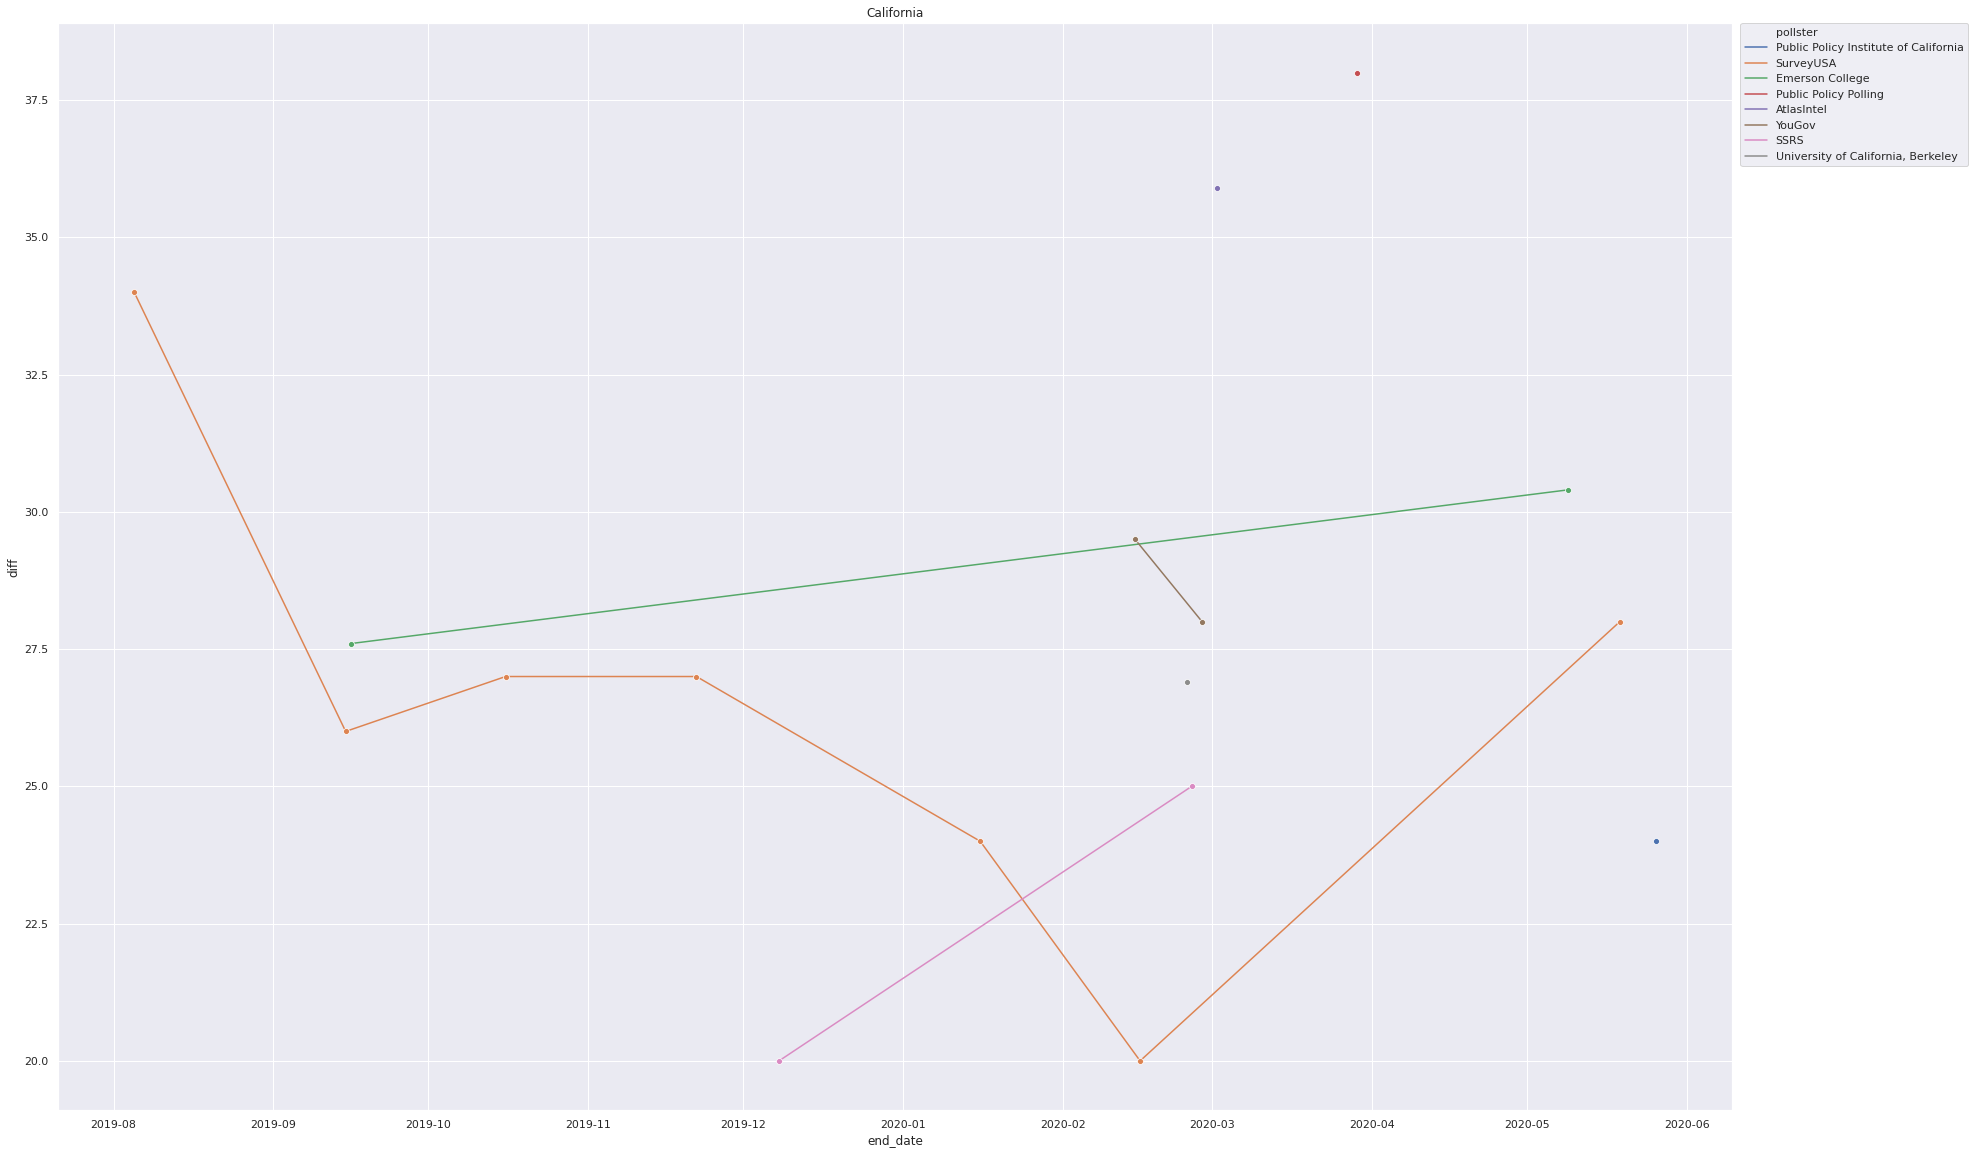

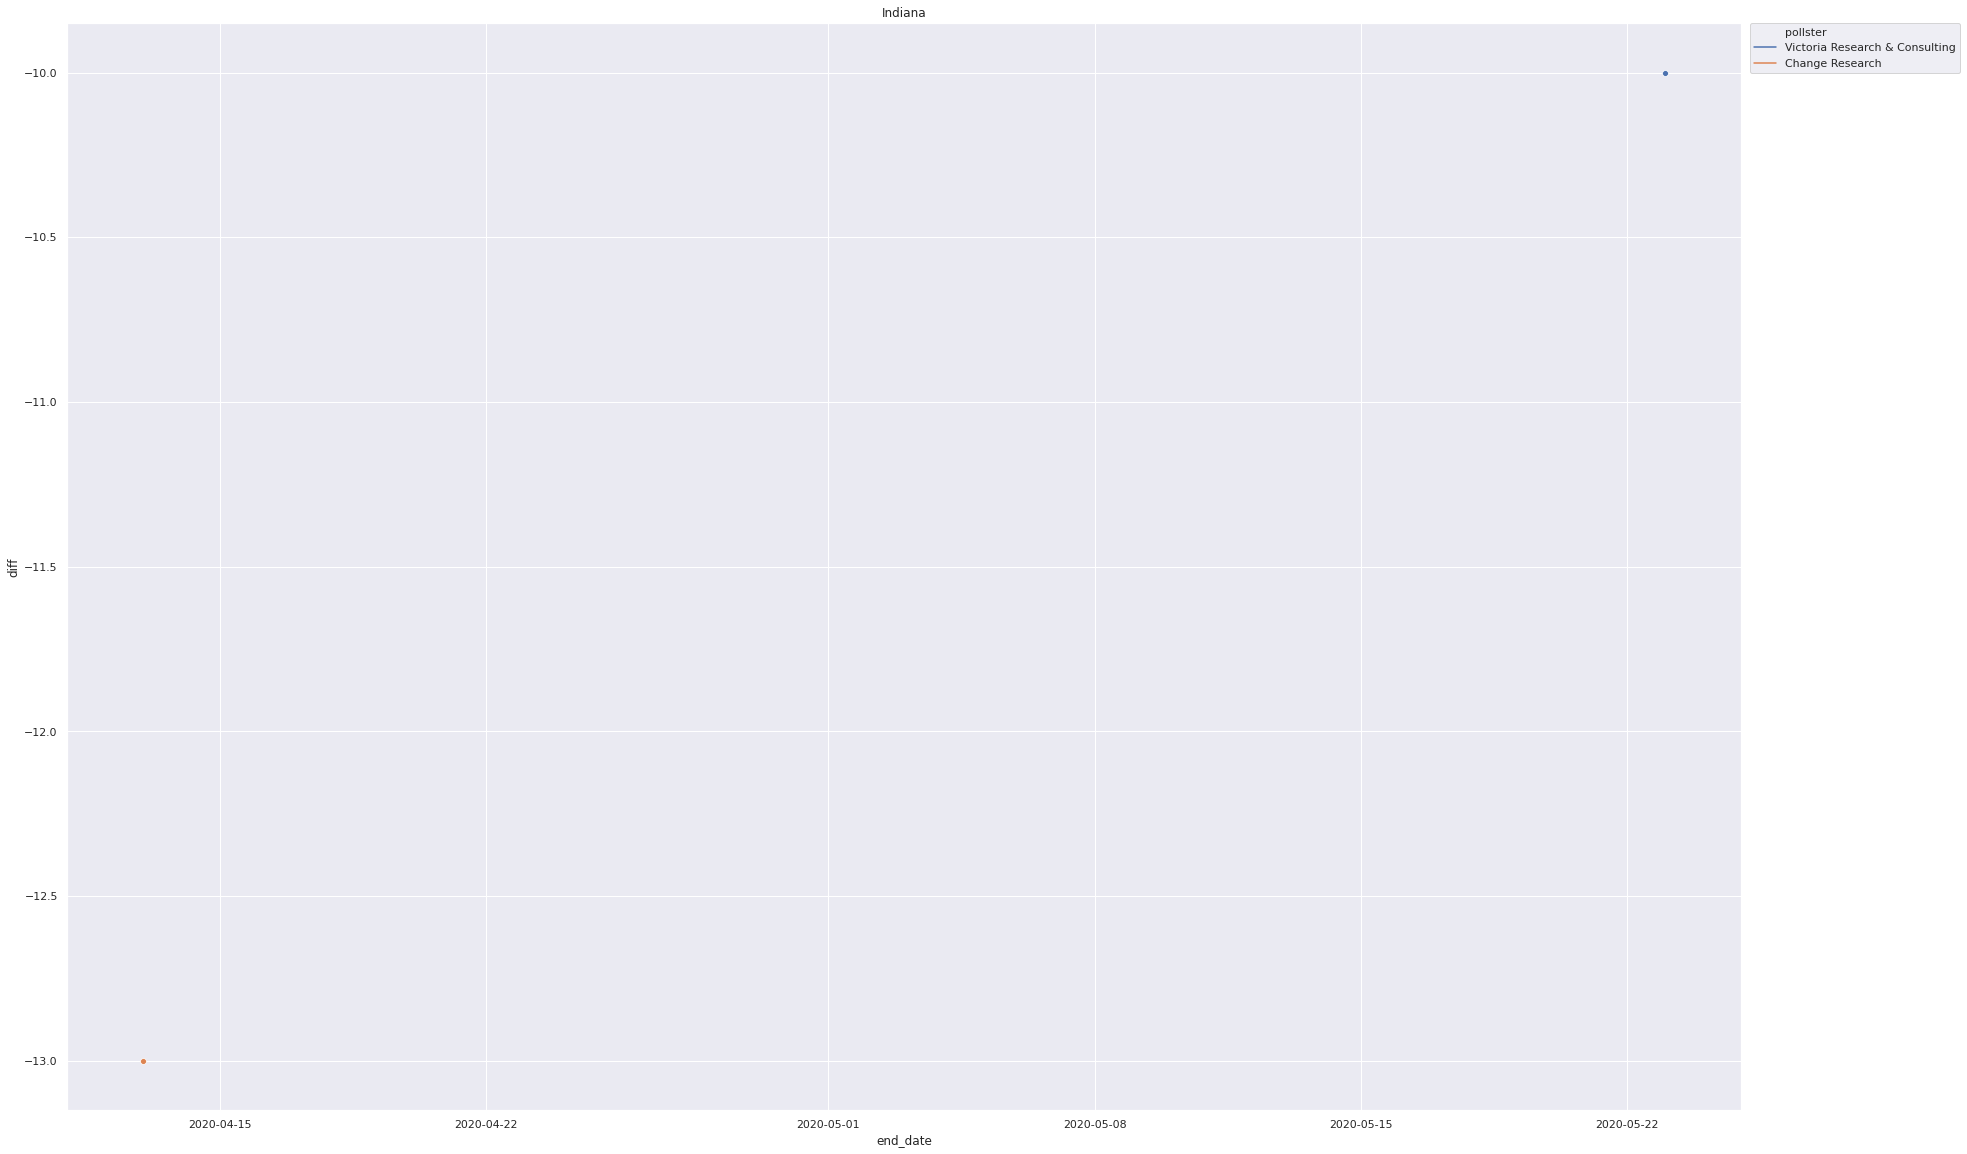

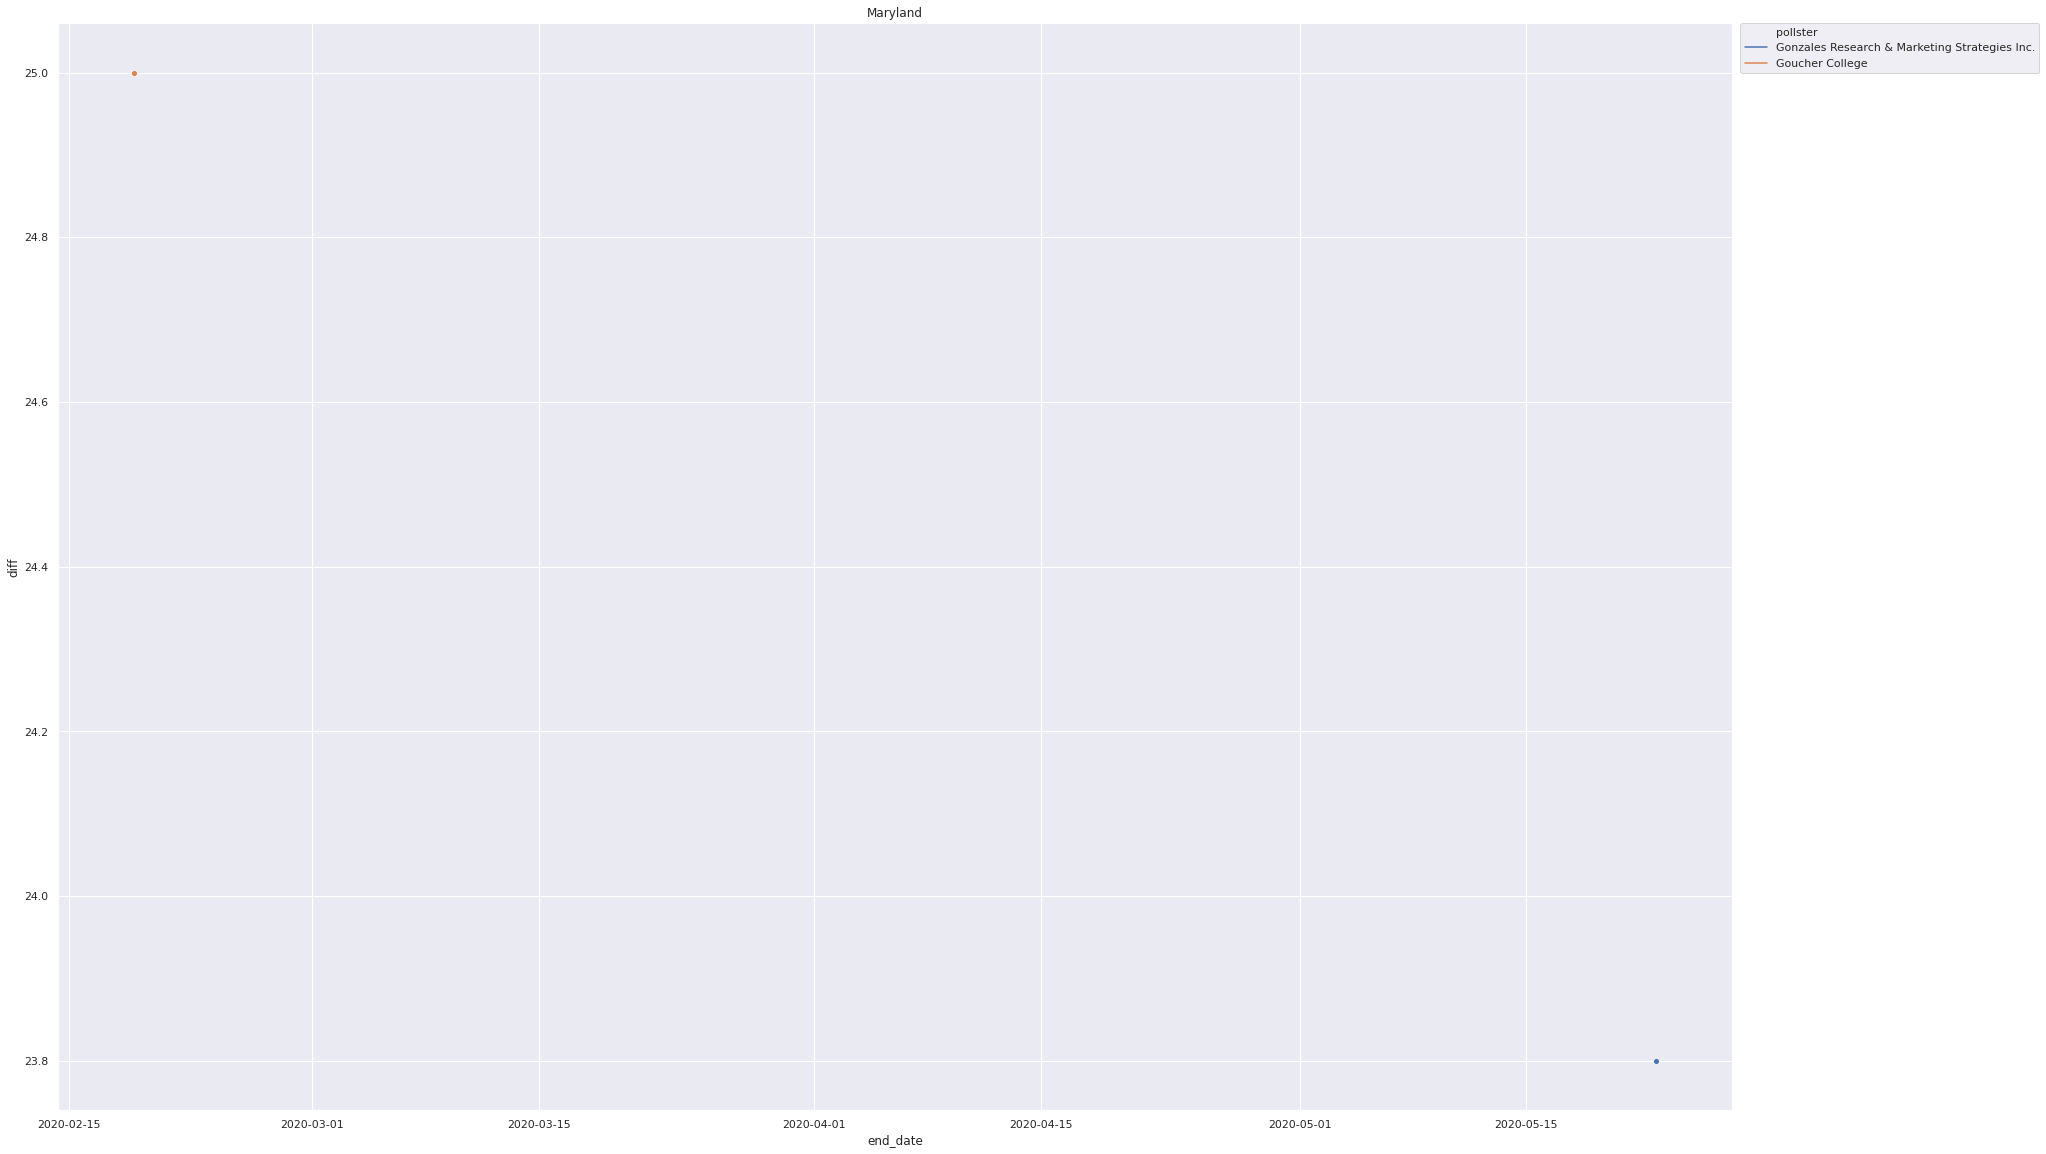

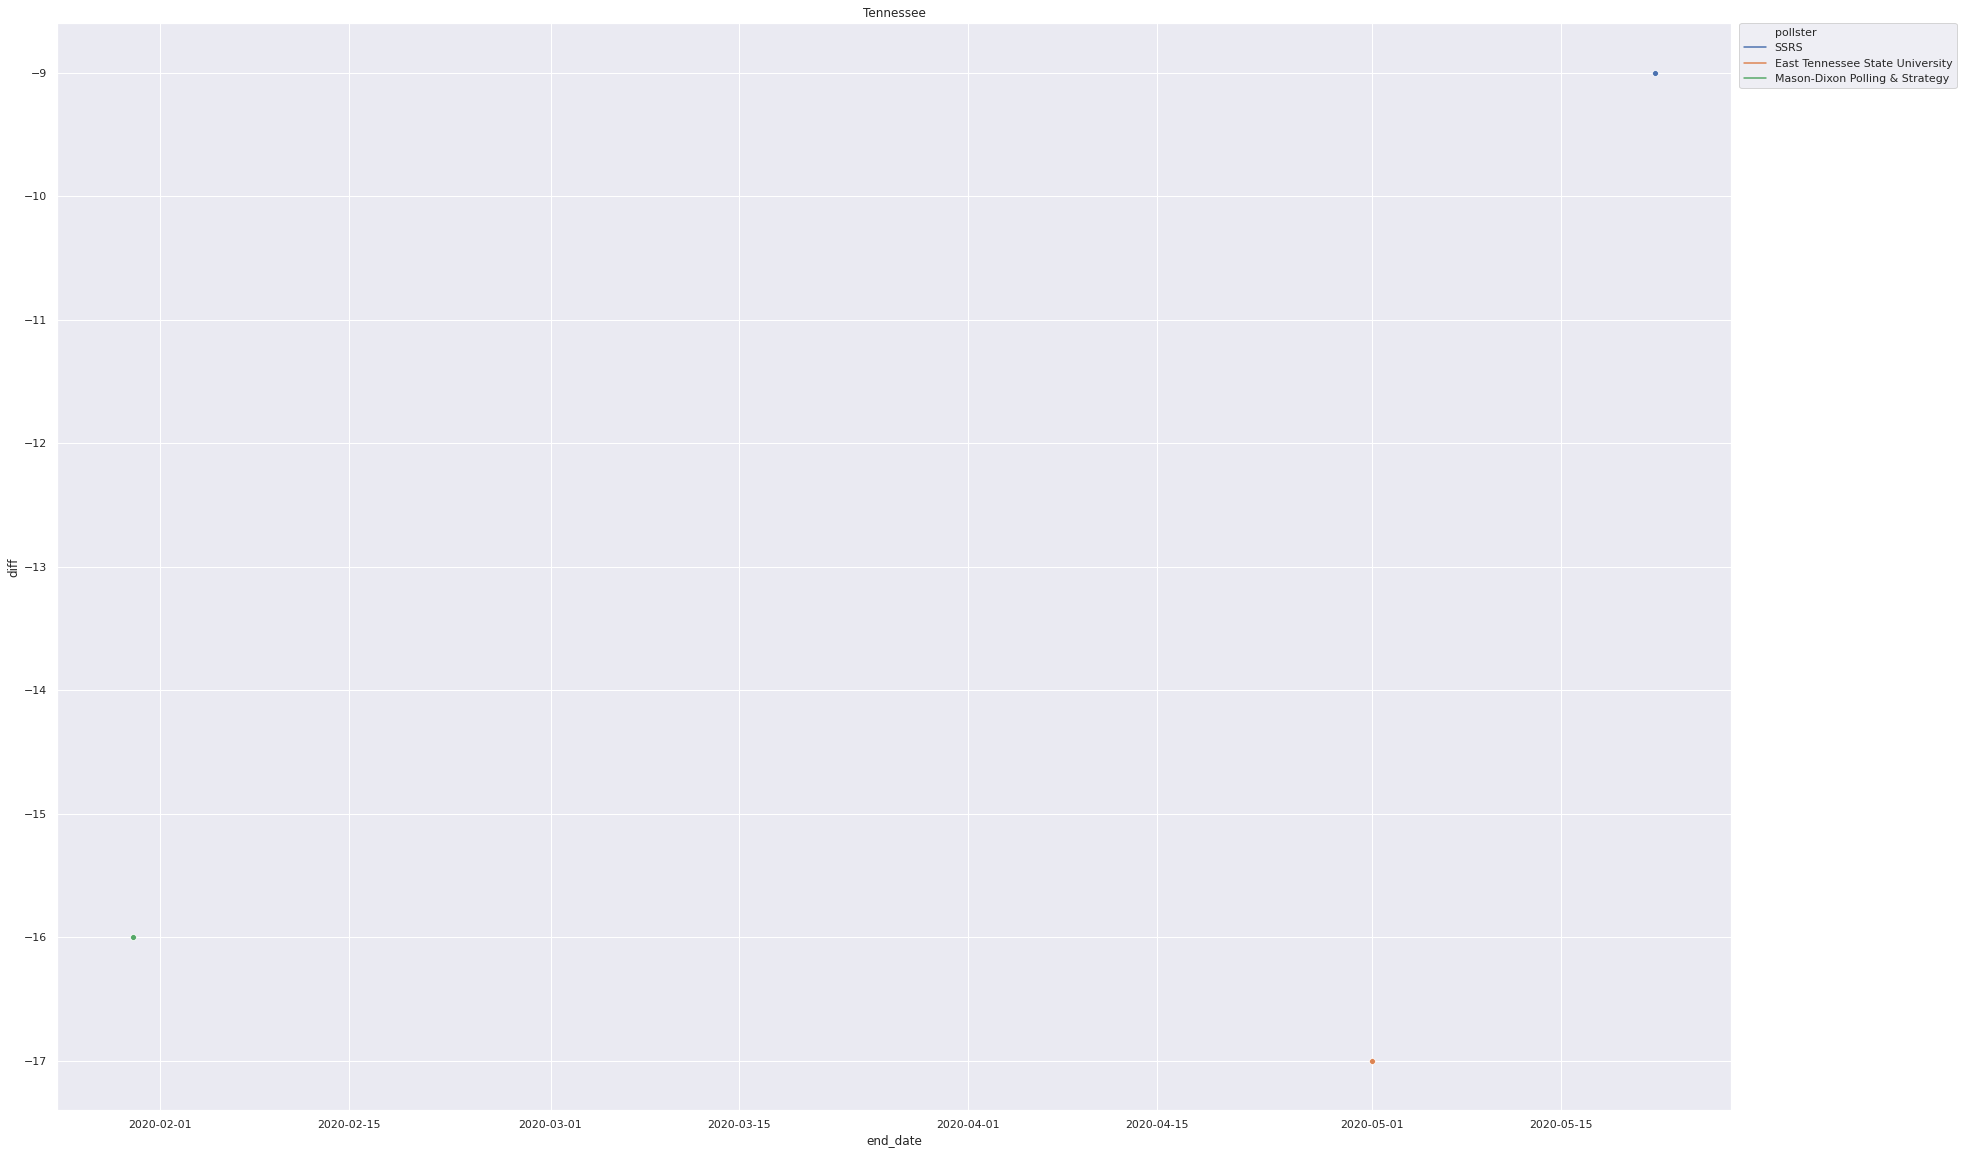

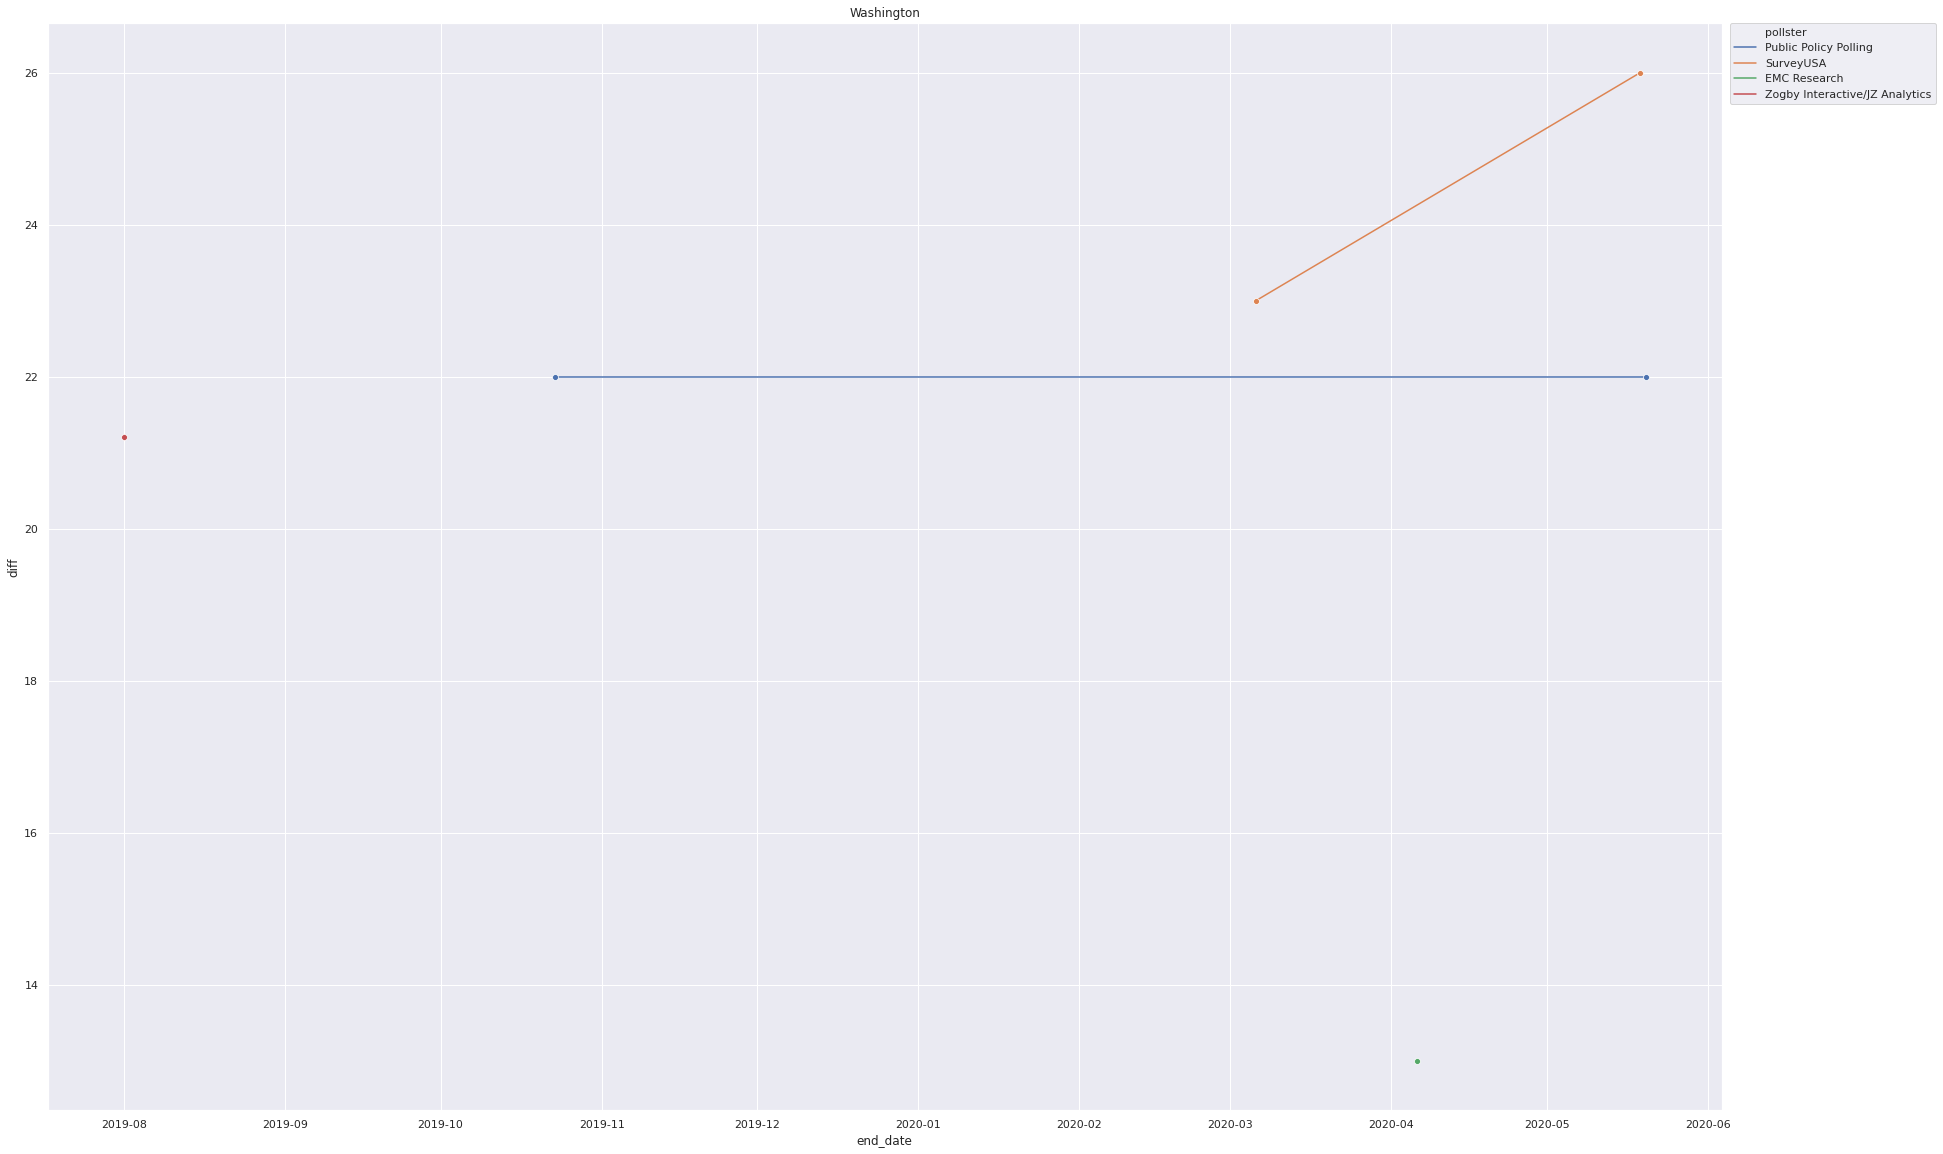

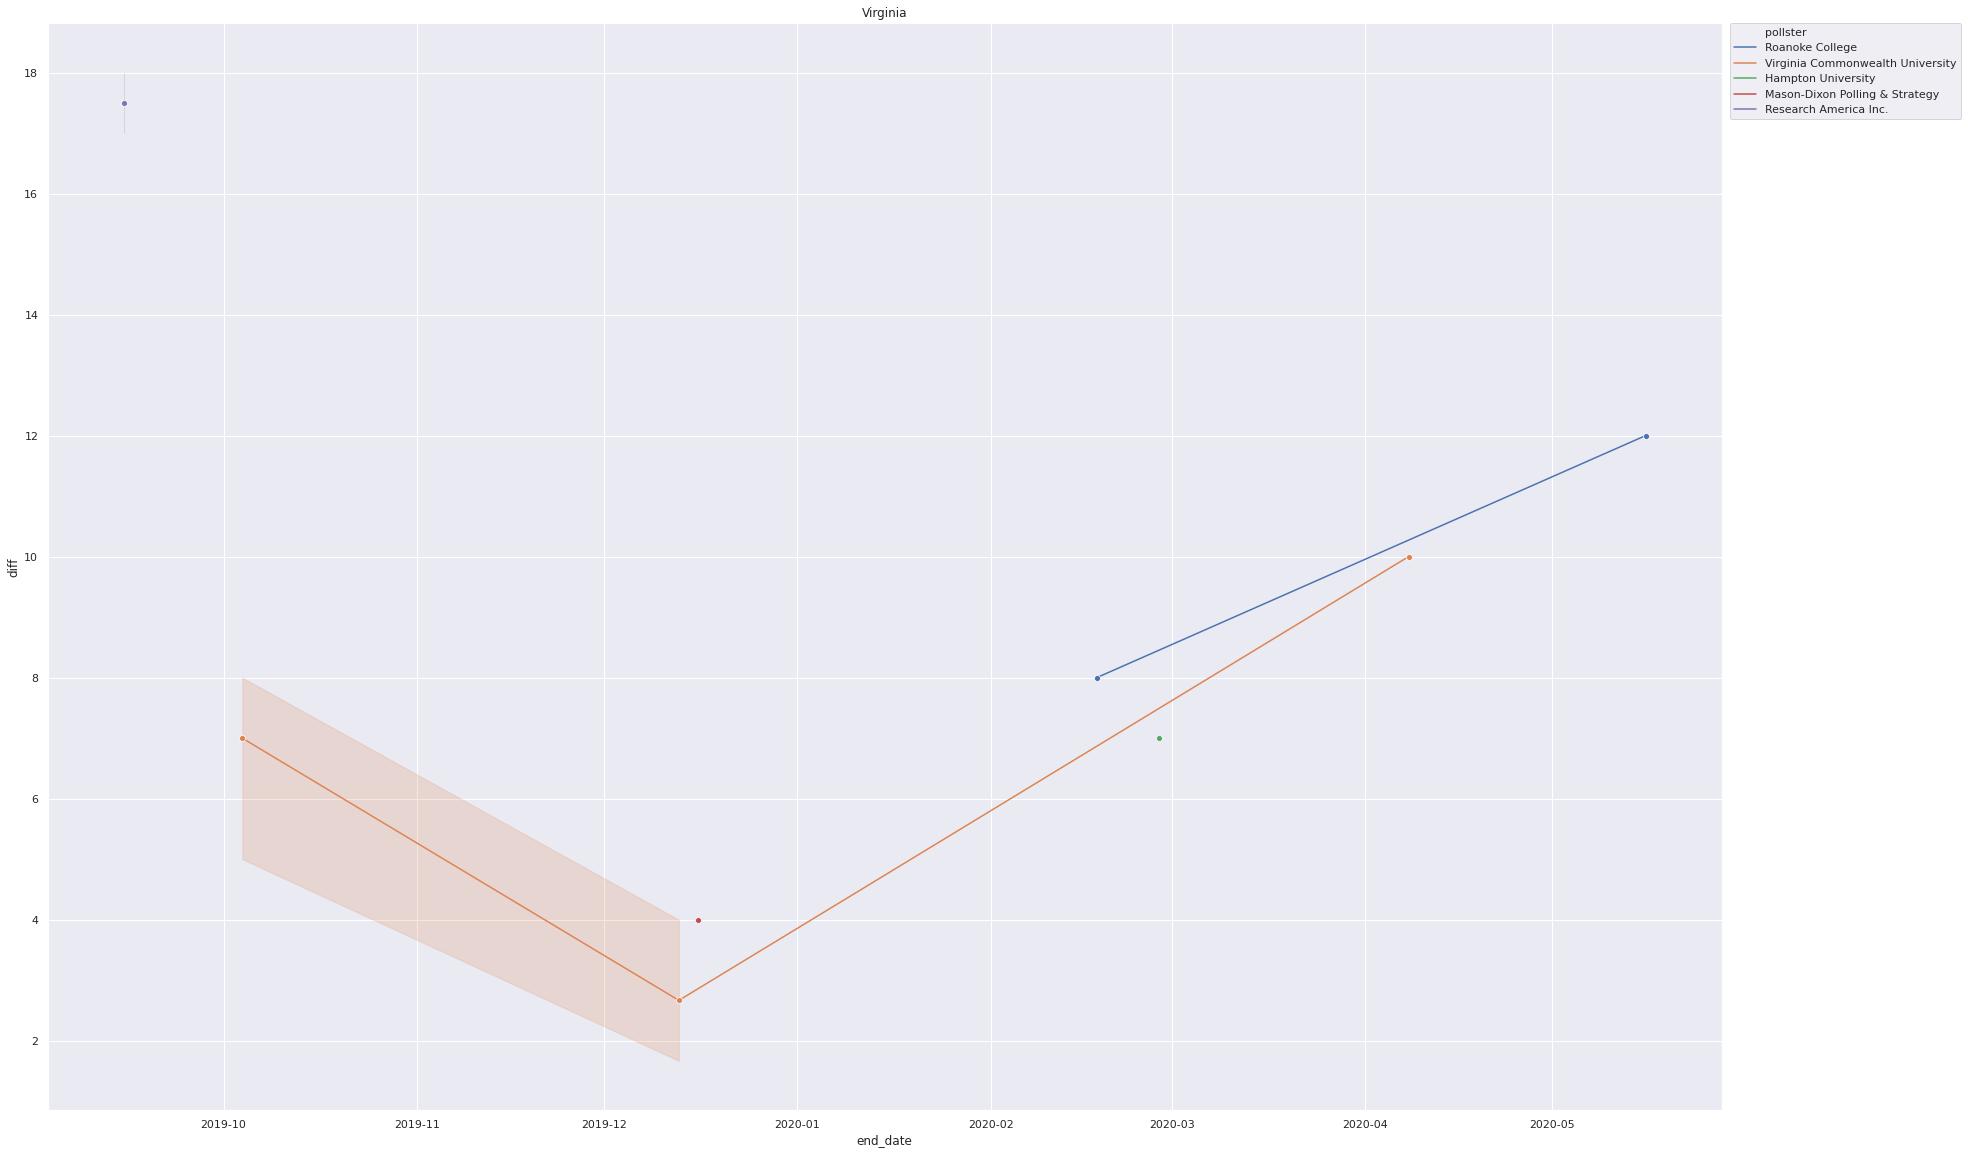

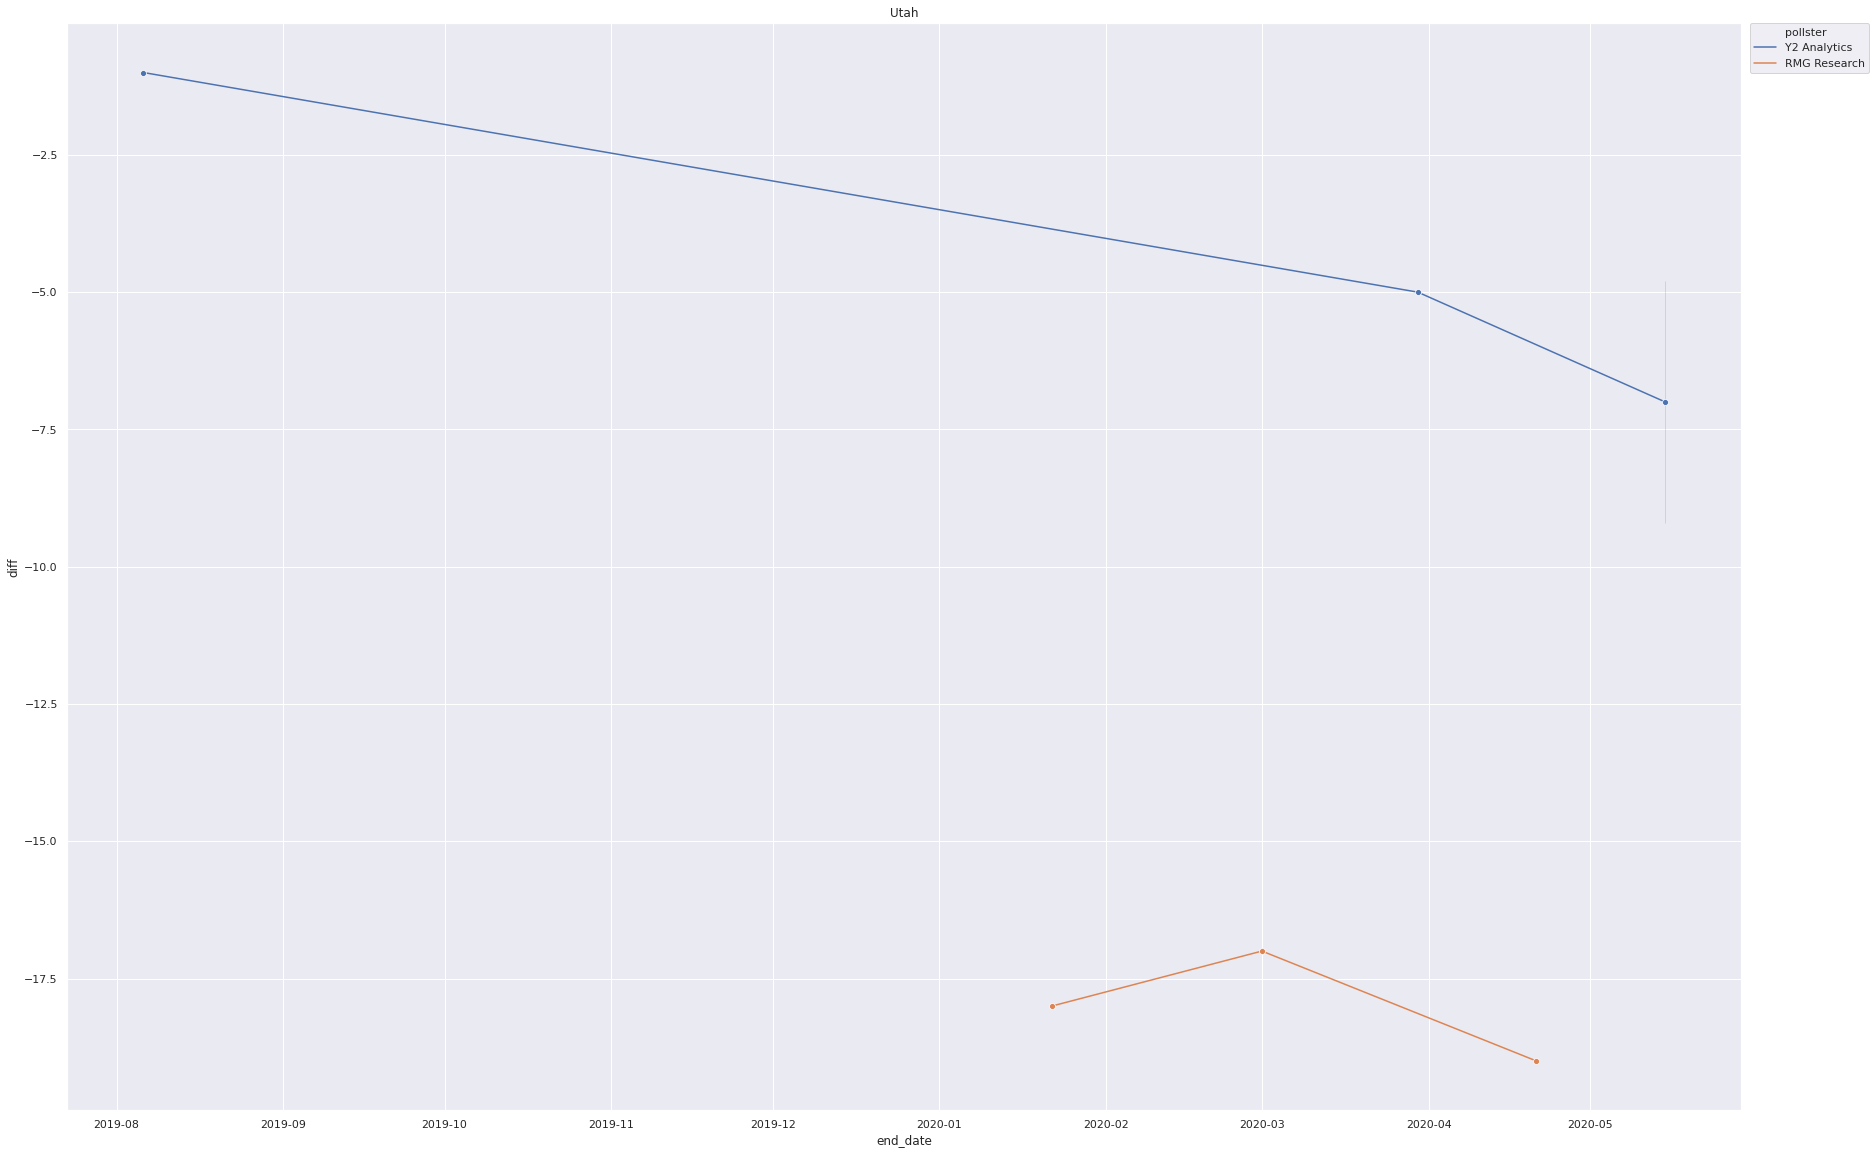

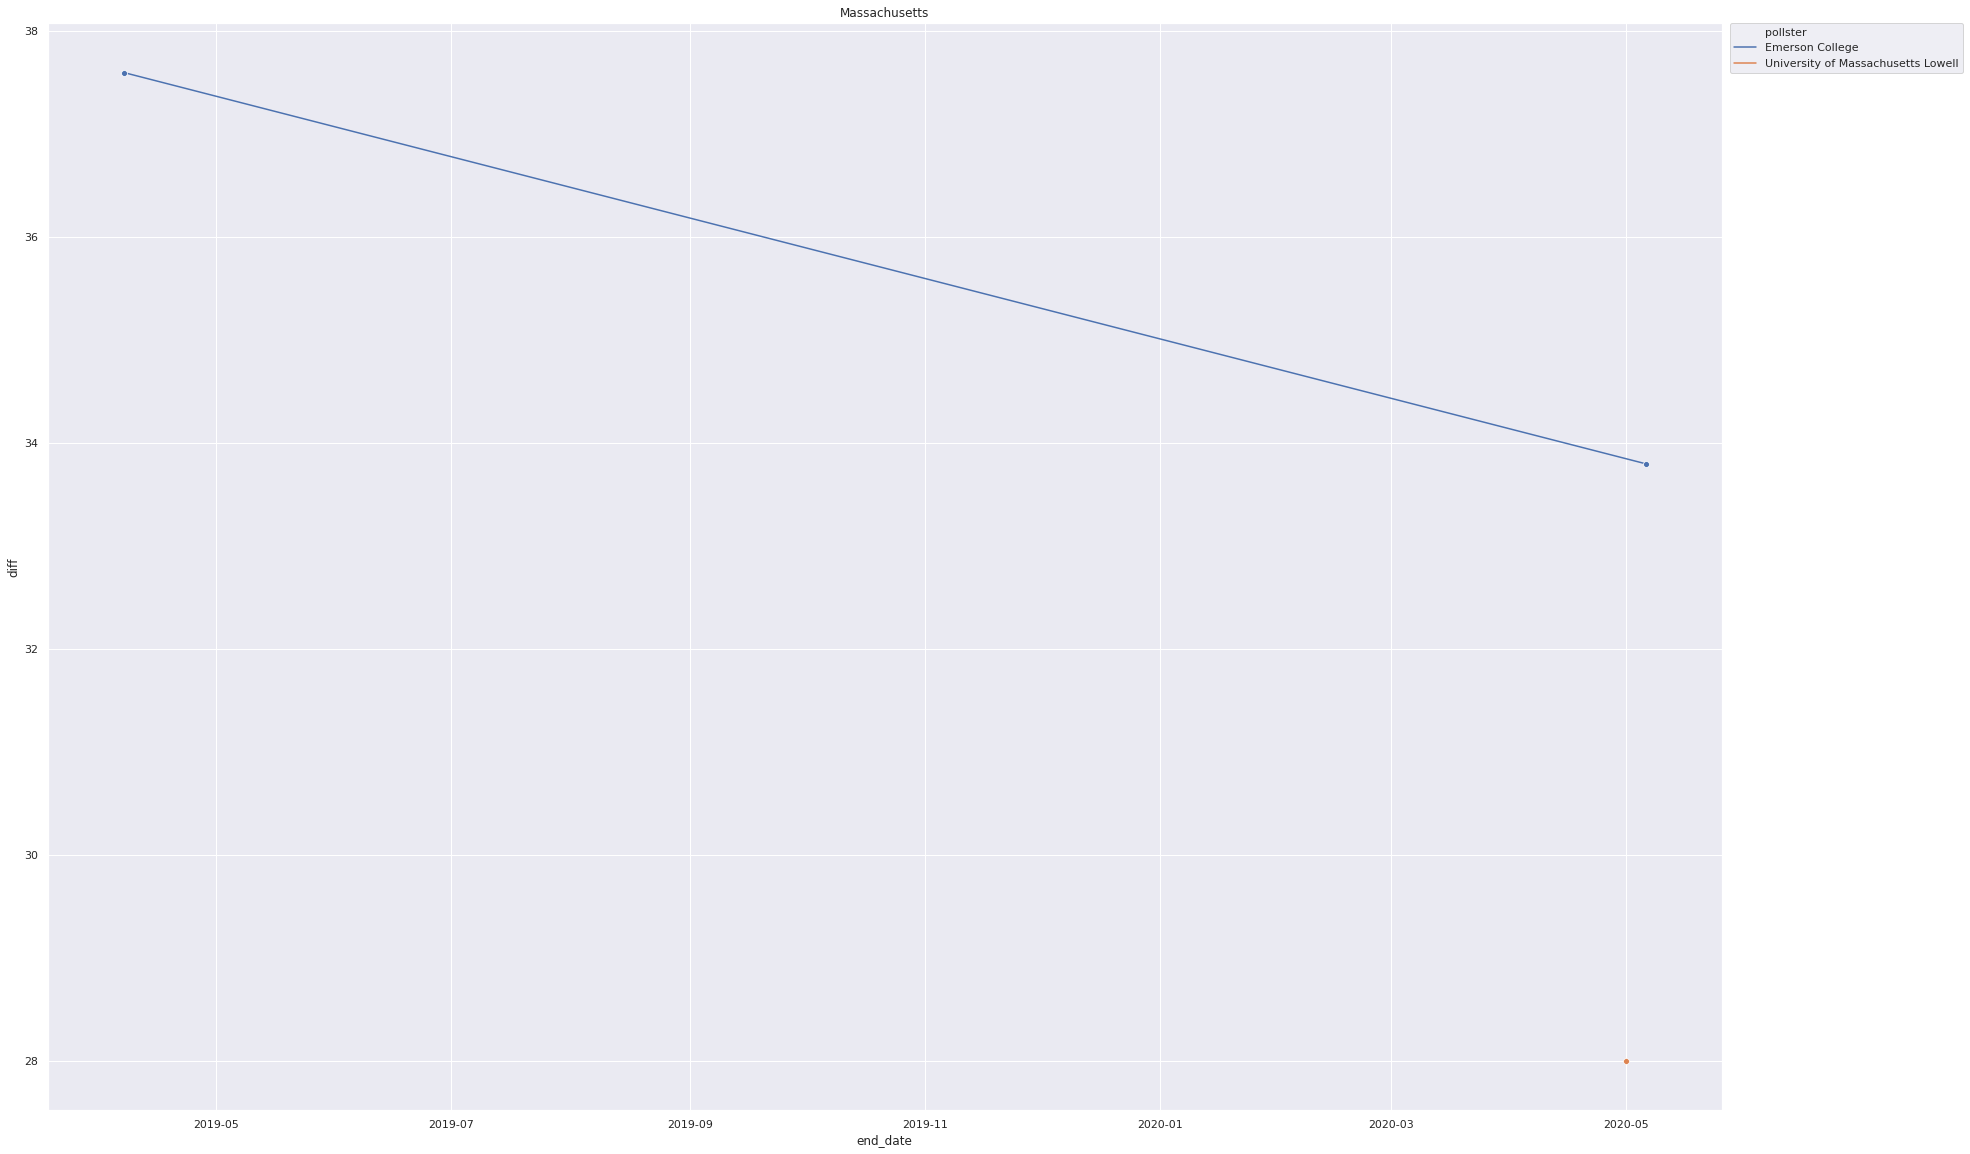

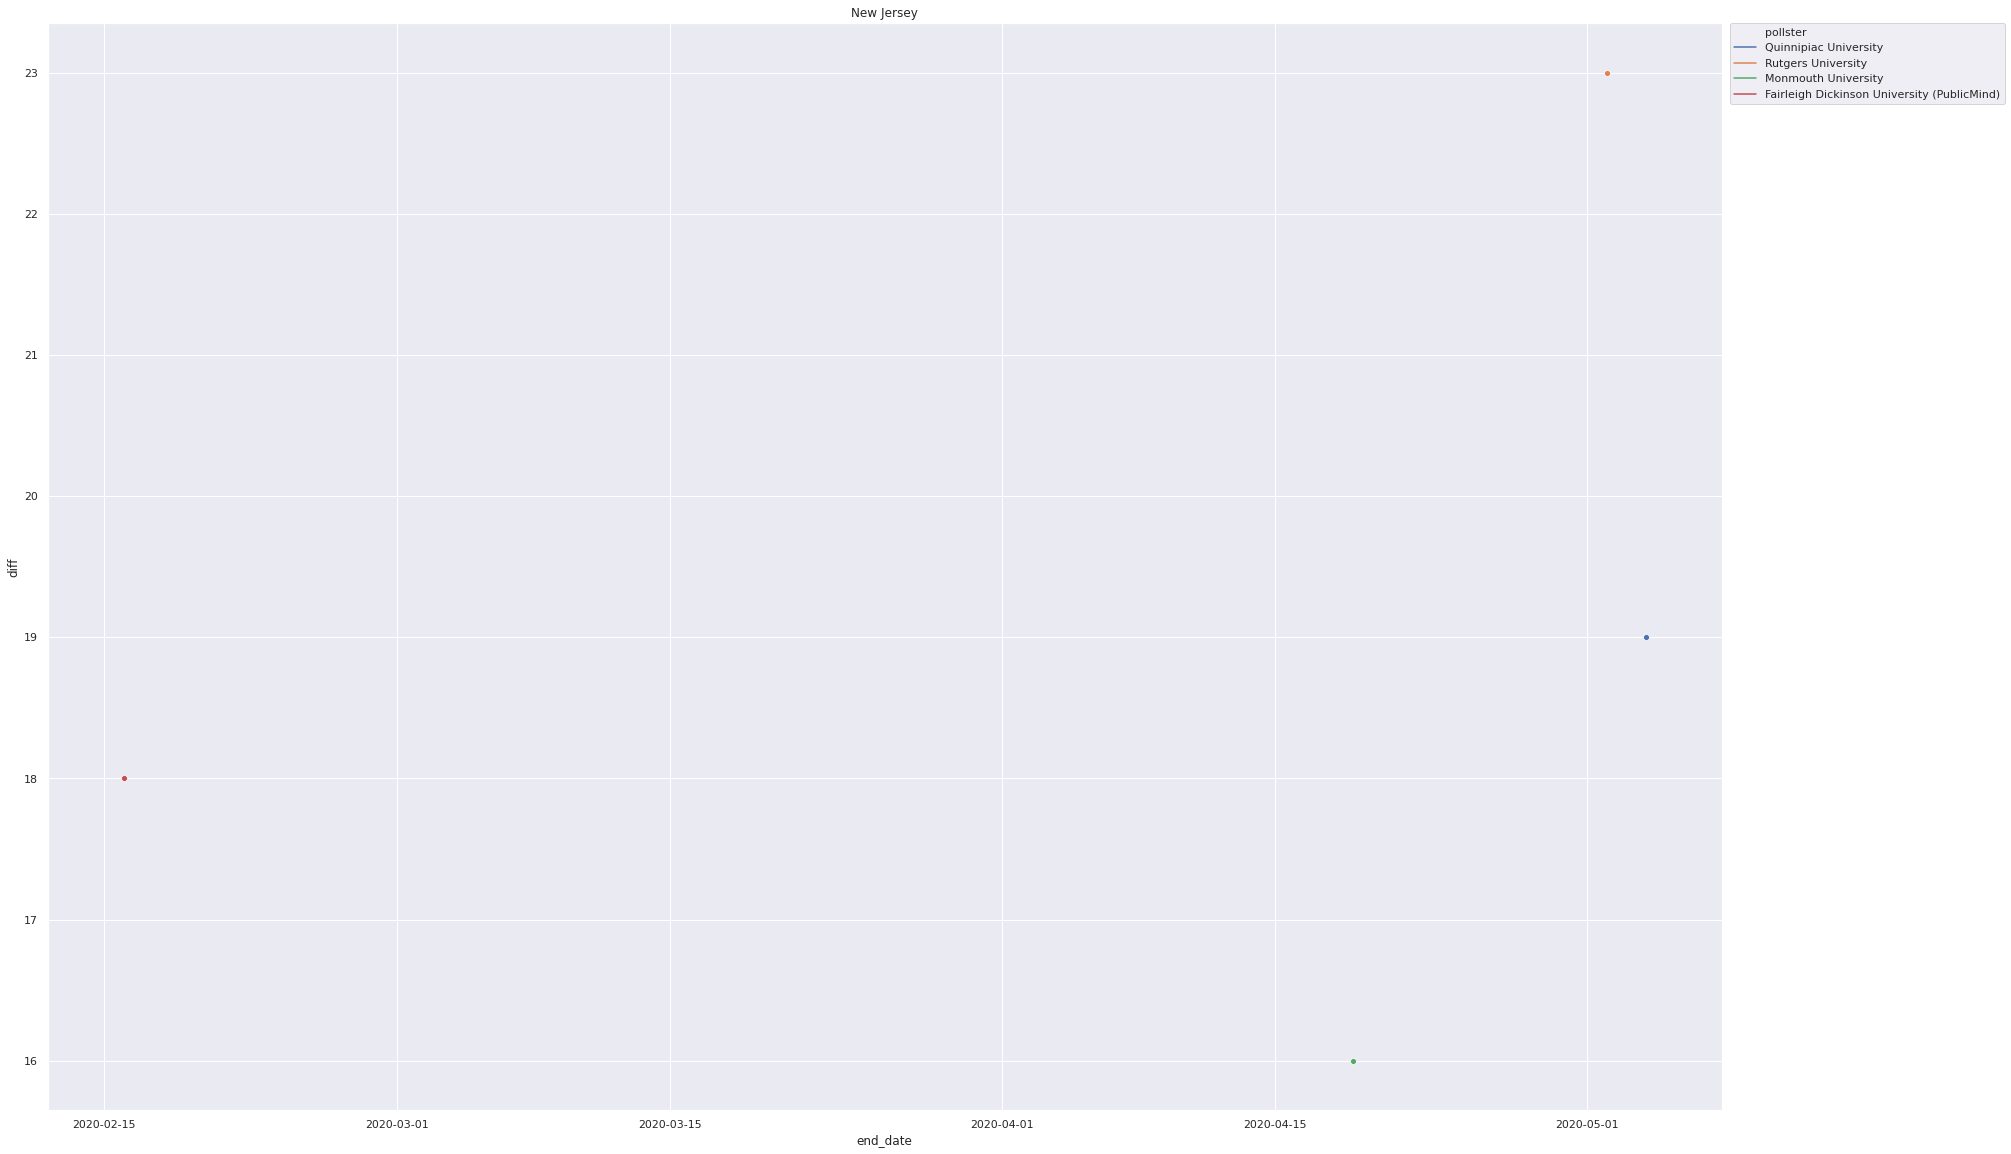

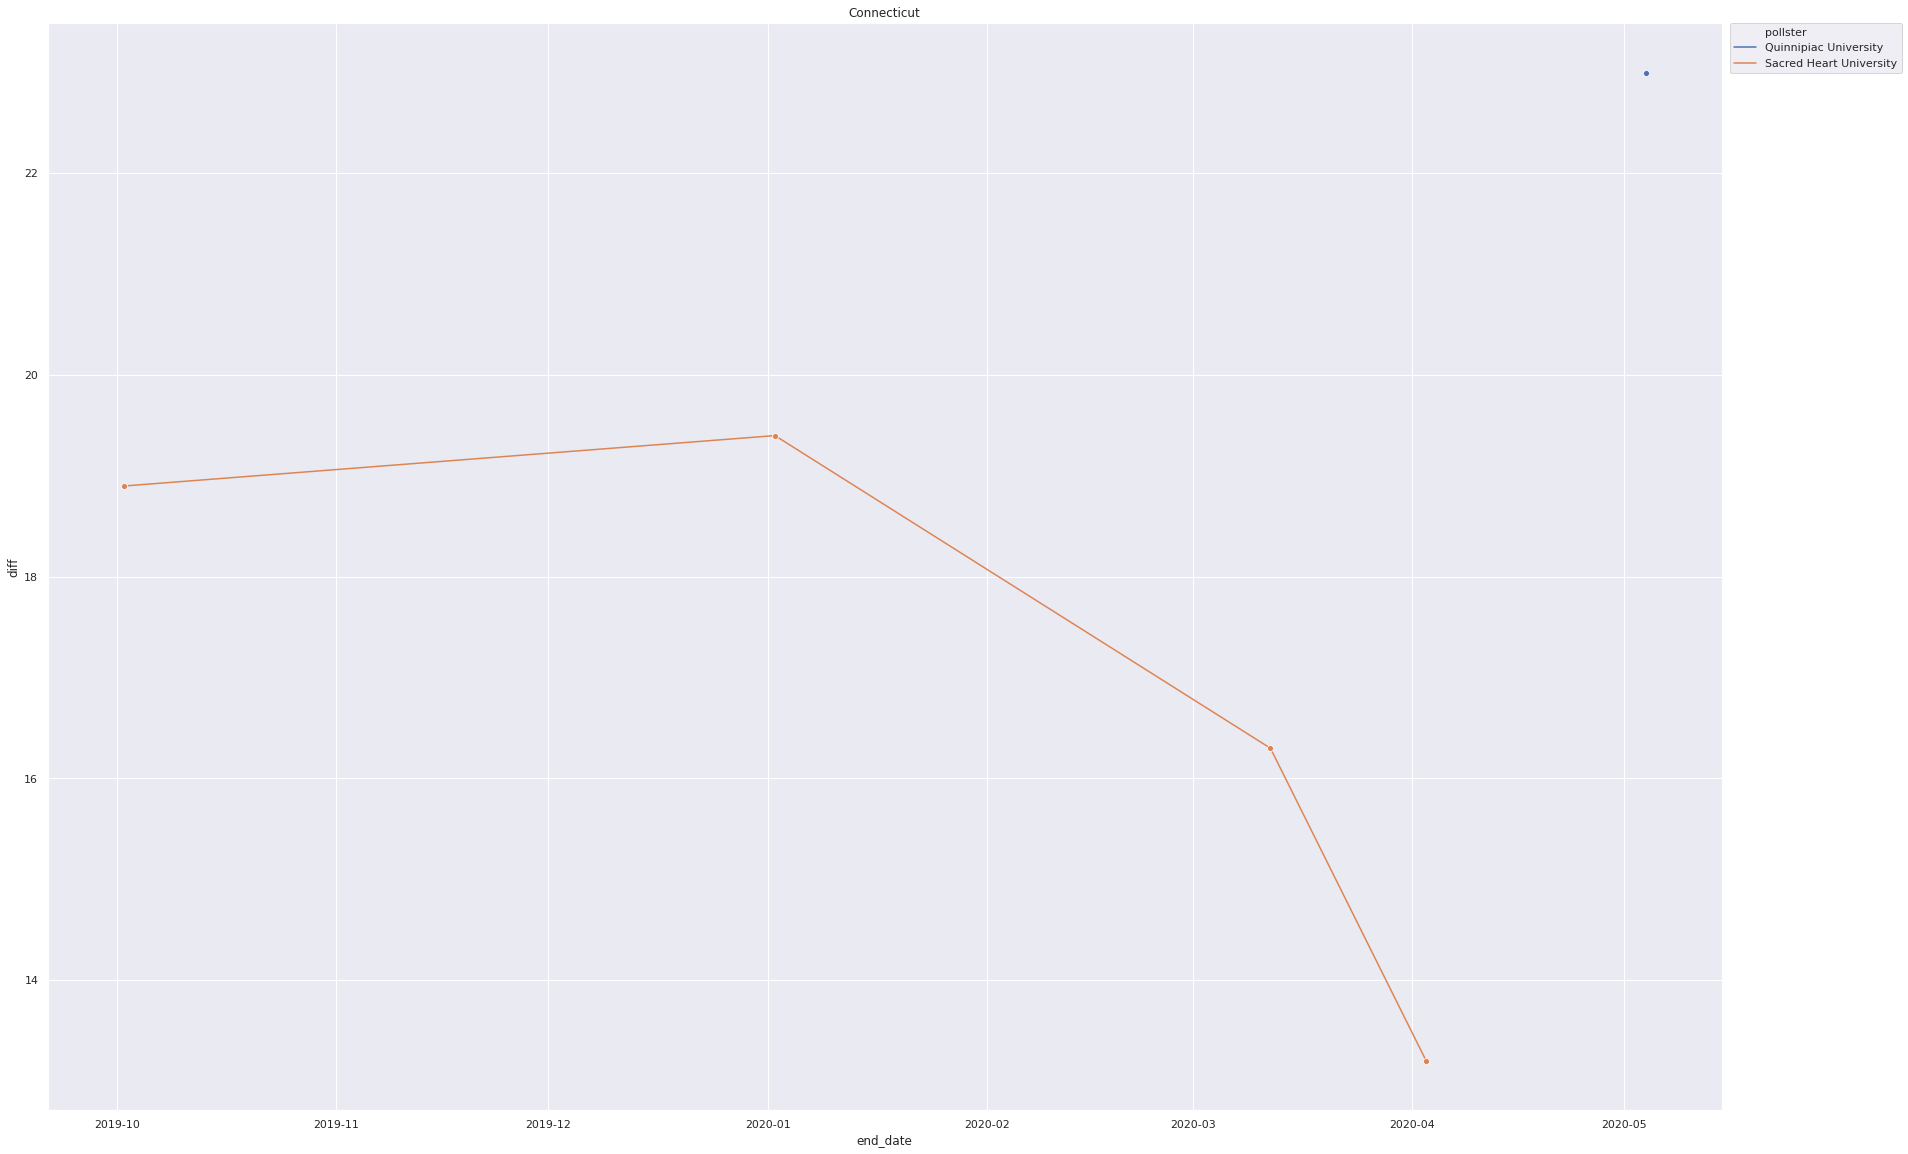

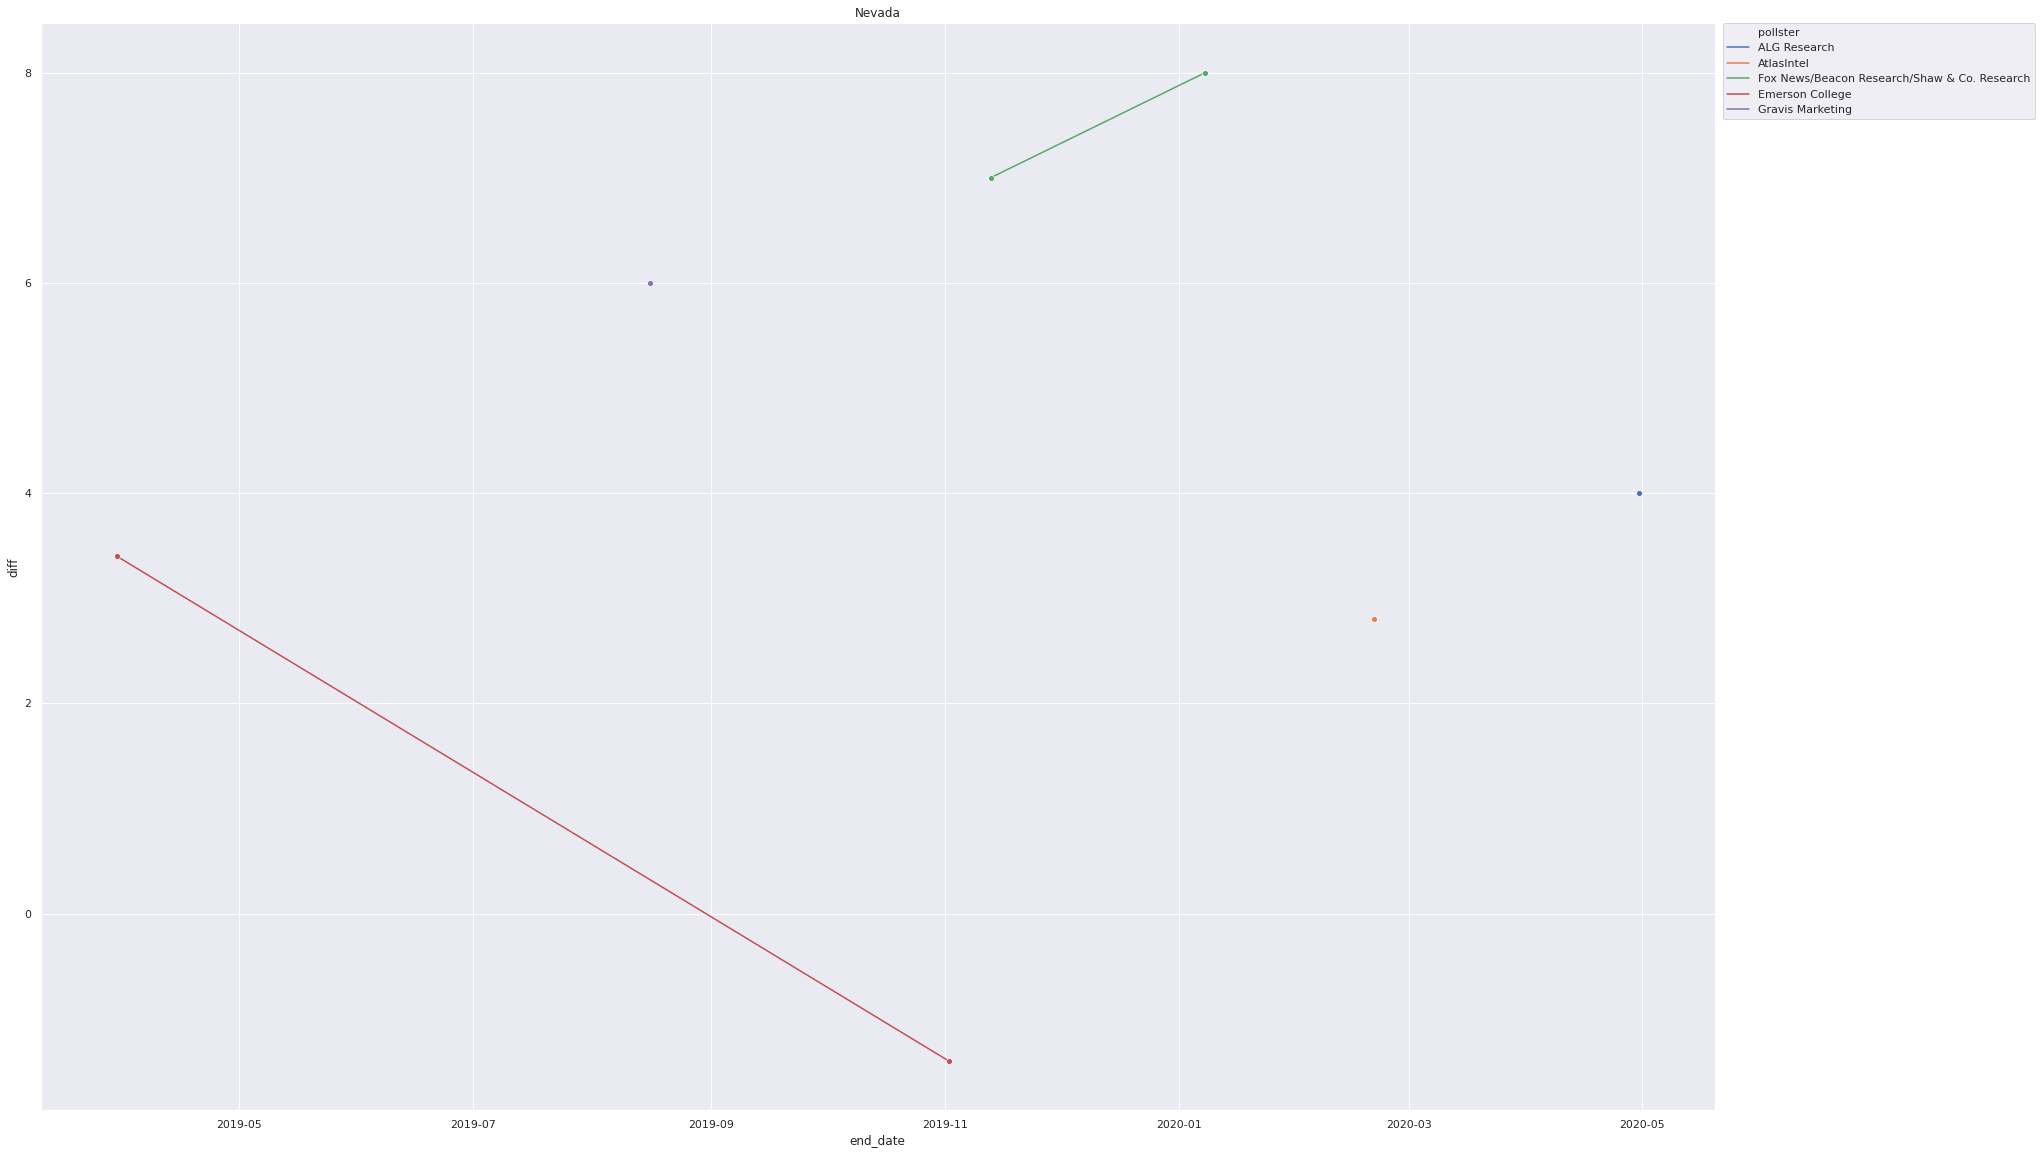

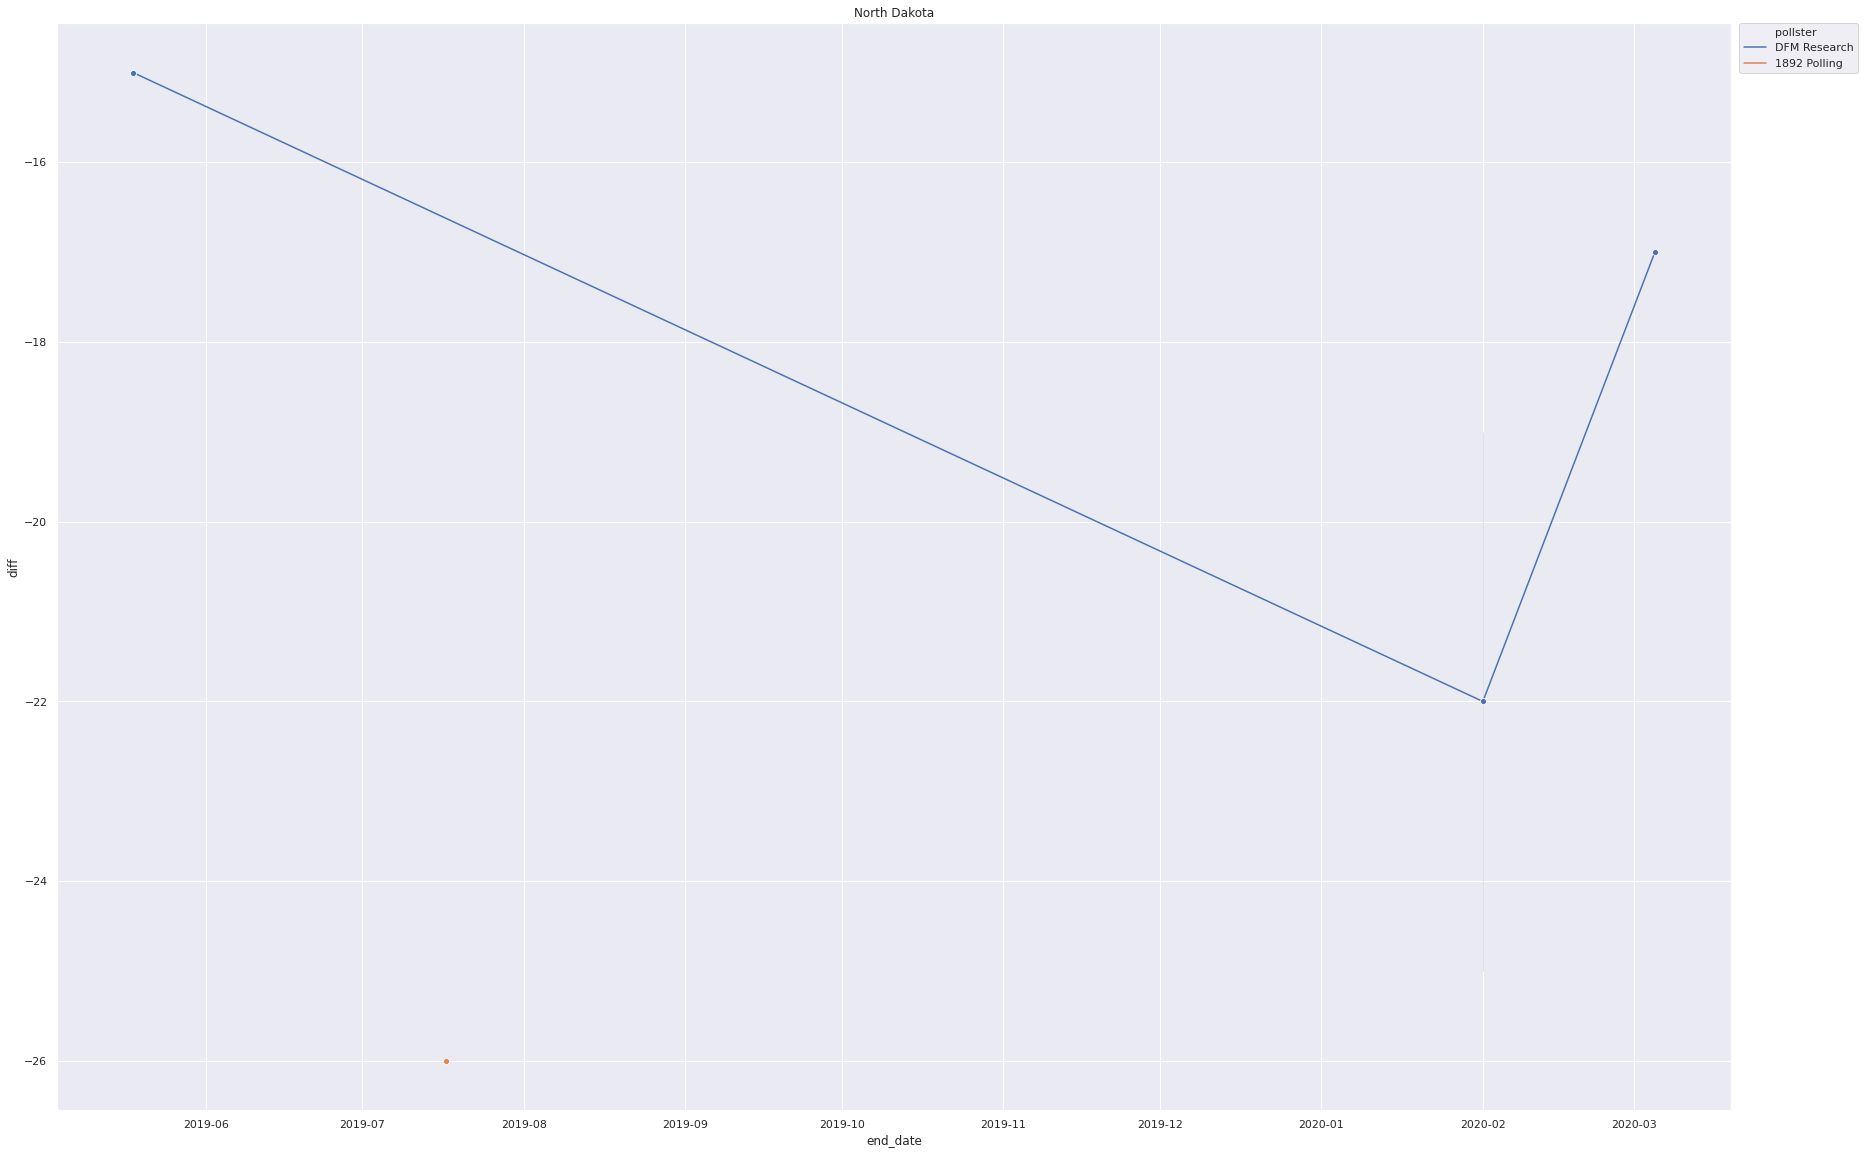

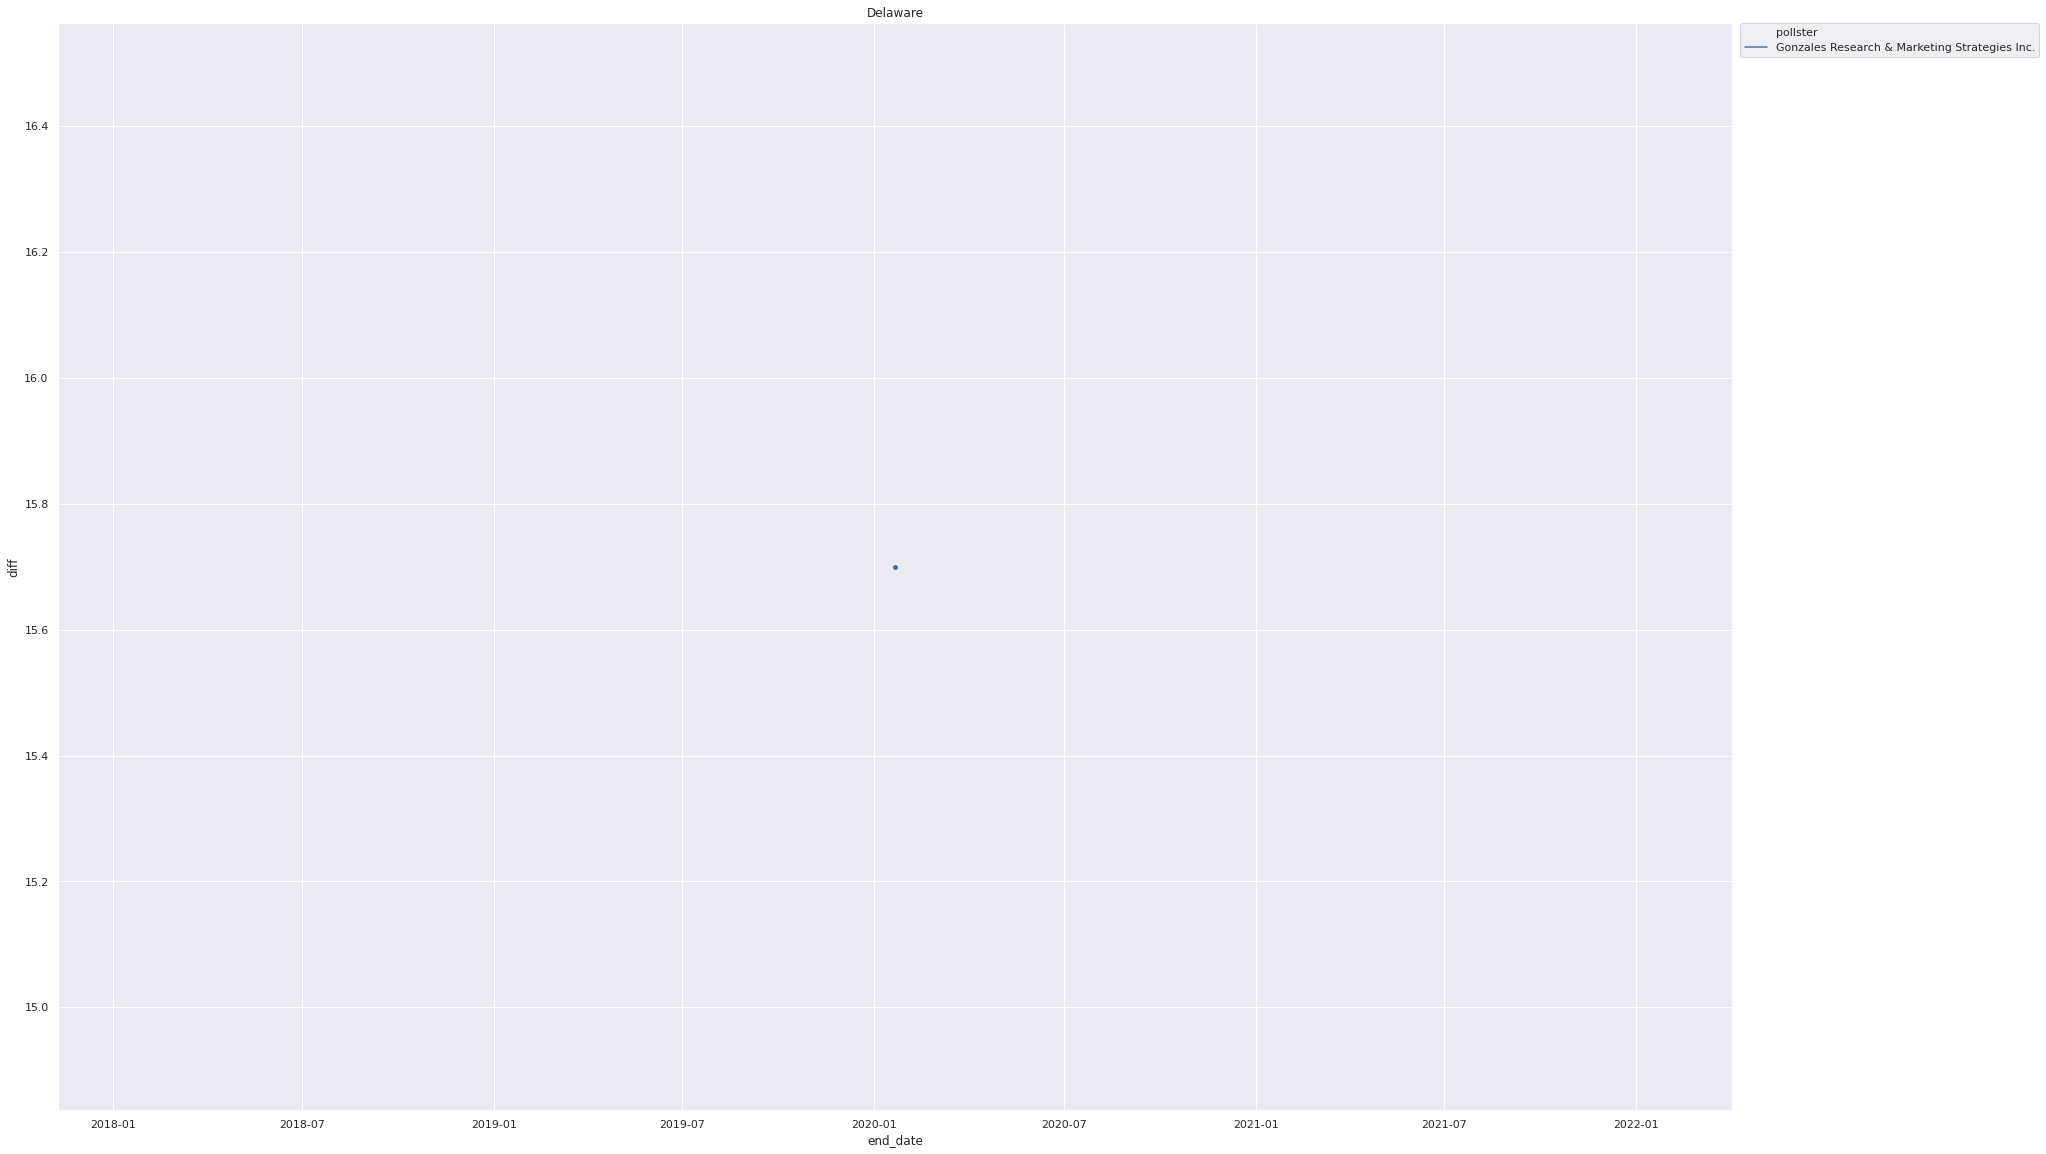

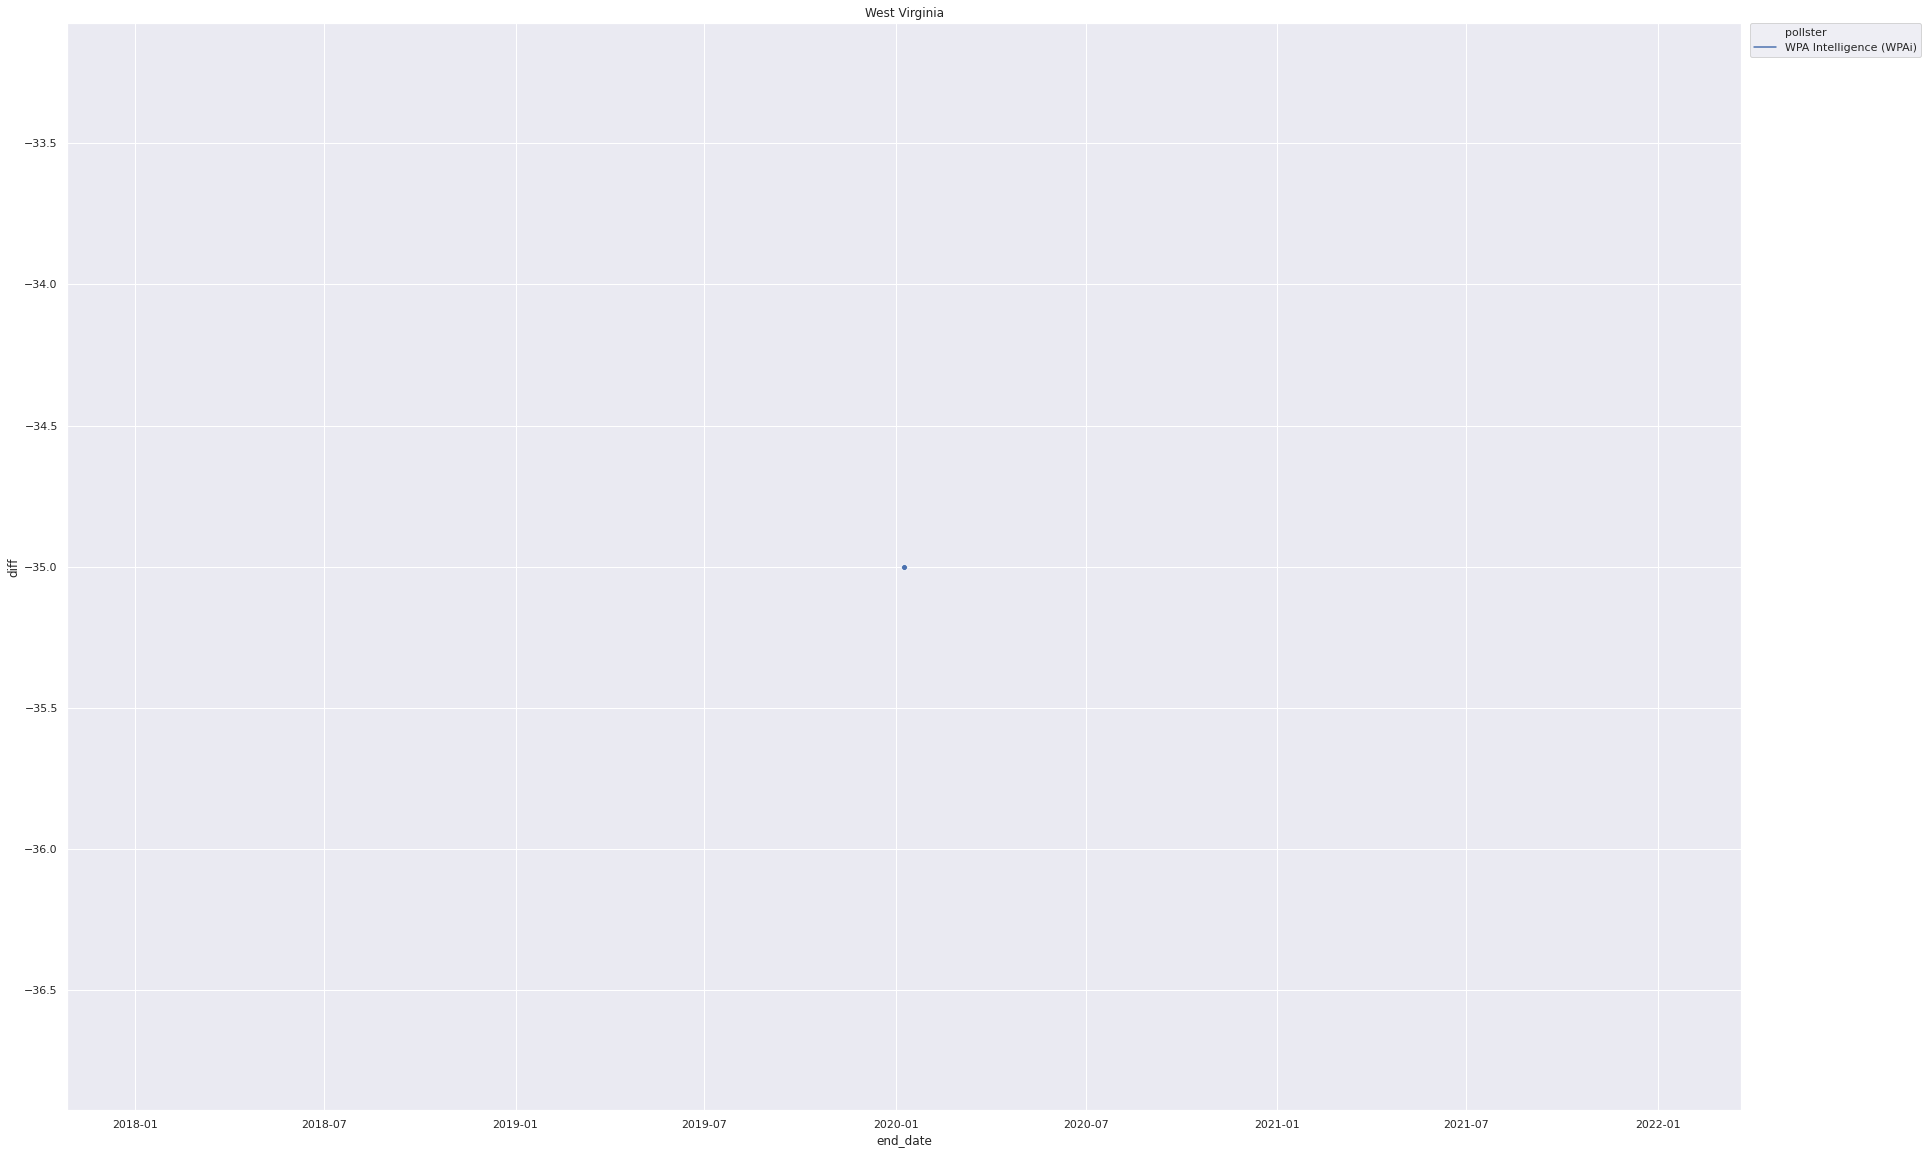

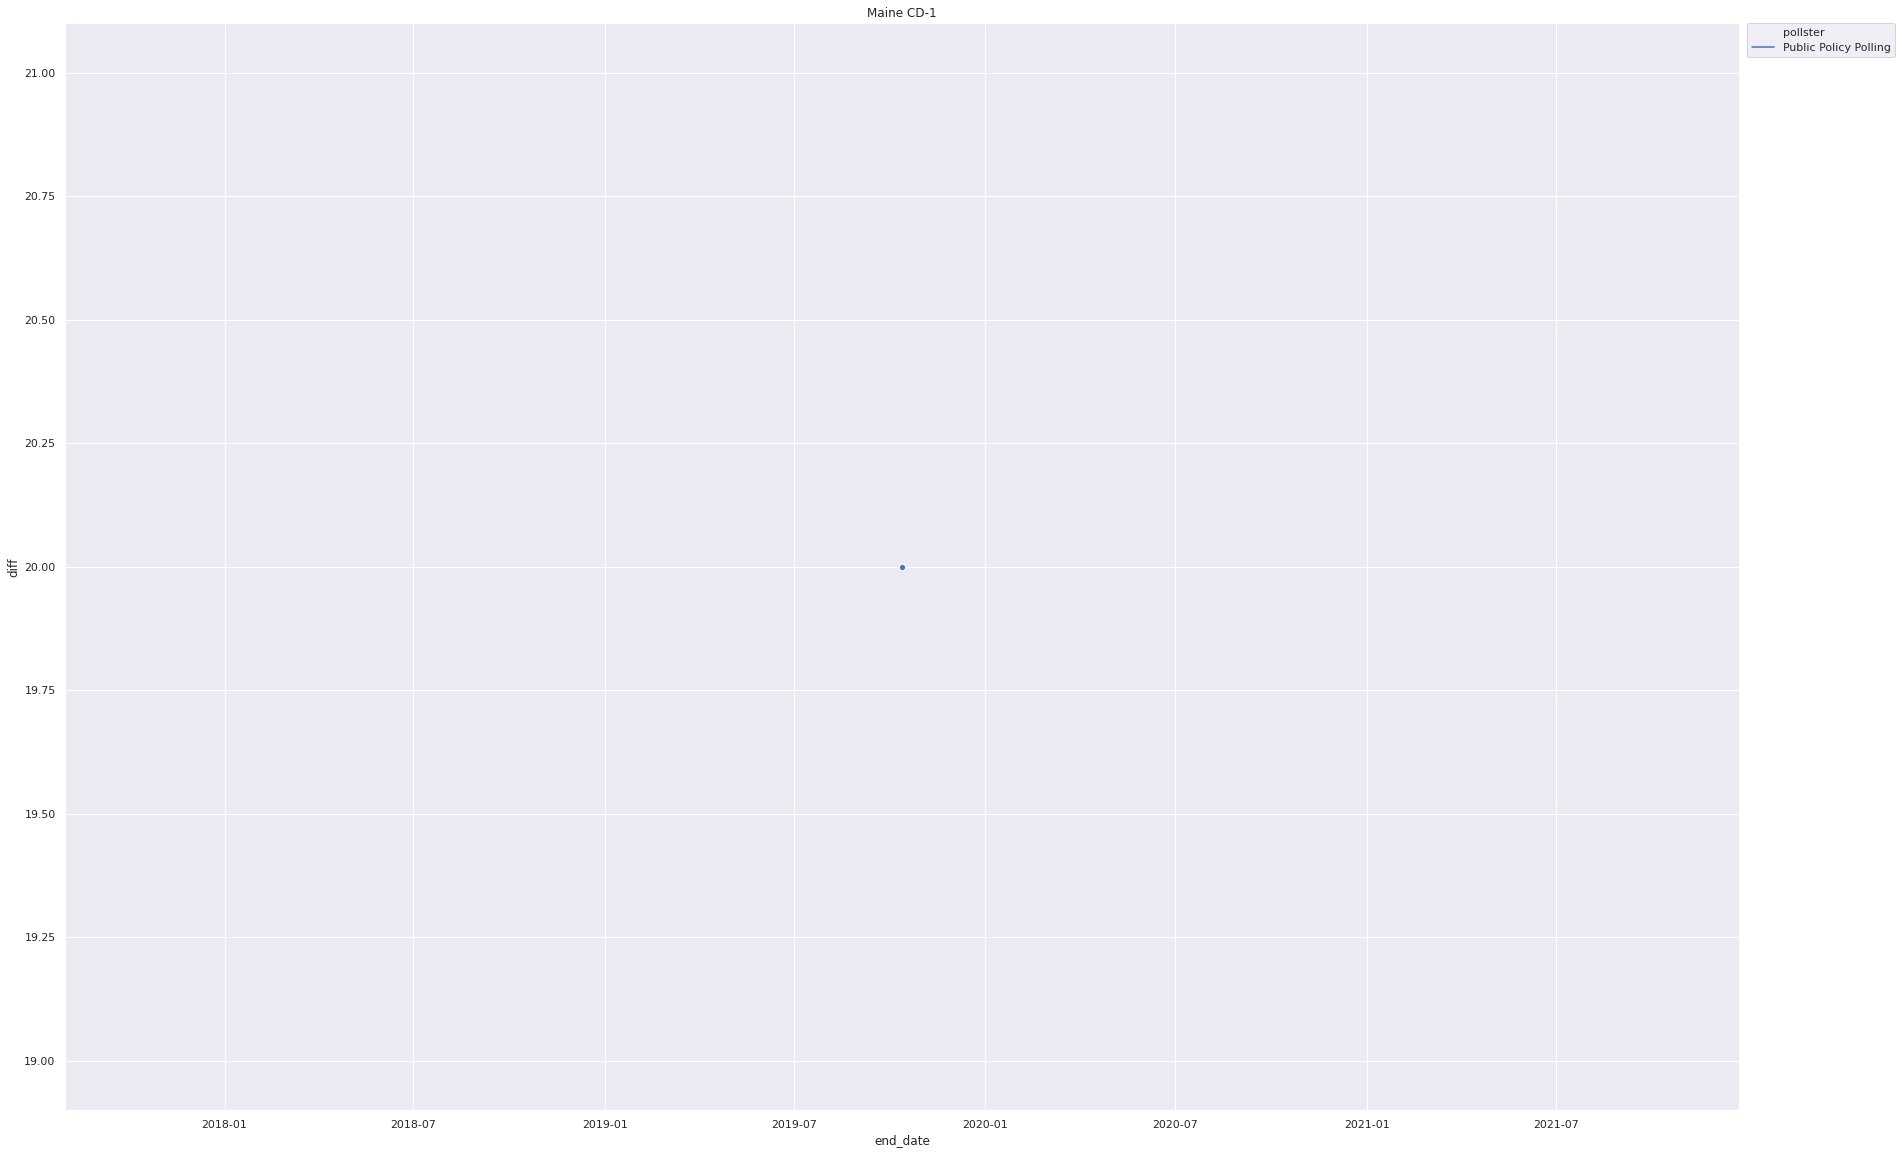

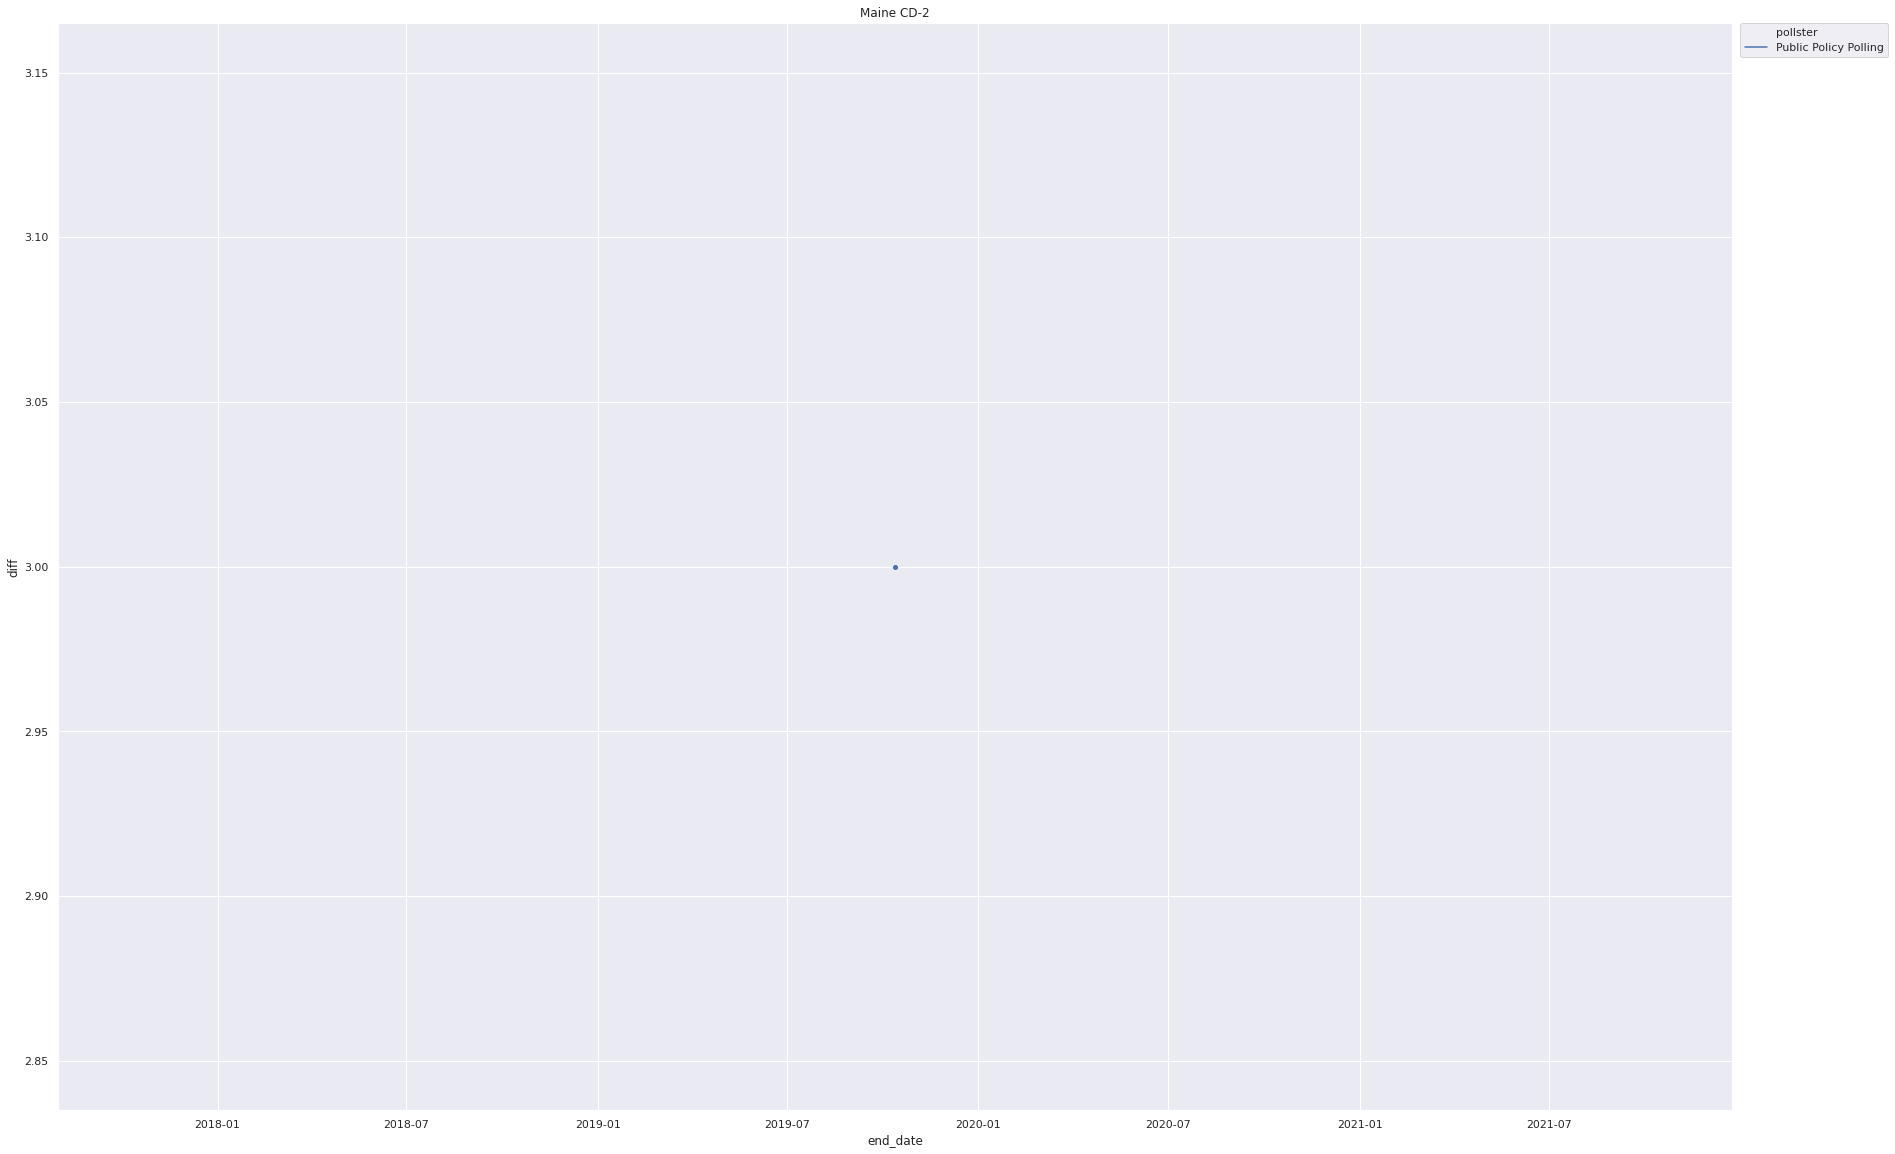

In [11]:
state_data = {}
for i, state in enumerate(states):
    polls = statepolls[statepolls['state'] == state]
    plt.figure(i, figsize=(30,20))
    plot = sns.lineplot(x='end_date', y='diff', hue='pollster', marker='o', data=polls).set_title(state)
    plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
    fig = plot.get_figure()
    filename = state.replace(' ', '_').lower()
    state_data[filename] = state
    fig.savefig(f'src/images/states/{filename}.png')
with open('src/images/states/states.json', 'wt') as fout:
    json.dump(state_data, fout)